**Collaboration:**
1. Ricardo Valentino 
2. Thamith Weerasuriya 
3. LOW GUO WEI

#Problem

The following research aims to predict if a client will subscribe to a term deposit based on the data obtained from a direct marketing campaign, through the use of phone calls, of a Portuguese bank. The following examination considers 15 variables and adopts the use of various classification models, namely the logistic regression model, the Naïve Bayes model, Decision tree and the K nearest neighbour model, in order to predict whether a client will subscribe to a term deposit. Furthermore, the use of resampling methods such as the Validation Set approach and the cross-validation approach ensures increased accuracy and reliability as well as quantifies uncertainty in the results.  Thus, a highly accurate prediction can be obtained from the results.

###Data Import

In [ ]:
## Dataset
marketing = read.csv("https://www.dropbox.com/s/qel7a4rgrj3ldix/Marketing.csv?dl=1")

In [ ]:
#Install Packages
install.packages("Amelia")  #for Missingness Map
install.packages("ISLR") #Data for an Introduction to Statistical Learning with Applications
install.packages("dummies") #to create dummy variables
install.packages("corrplot")  #plot the graph of the correlation matrix
install.packages("ROCR") #evaluating and visualizing the performance of classifiers / fitted models
install.packages("pROC") #ROC AUC Curves
install.packages("ROSE") #for data balancing
install.packages("mlbench")   # Machine Learning benchmark problems
install.packages("caret")     # Classification and Regression training
install.packages("dplyr")  #package for fast data manipulation
install.packages('caTools') #DataSplitting
install.packages('e1071') #required by Confusion Matrix
install.packages("naivebayes")  #Naive Bayes
install.packages("ggplot2") #For plotting graphs
install.packages("rpart.plot") #visualization on decision tree
install.packages("boot") #Bootstrap resampling

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘

In [ ]:
#Load Library 
library(Amelia)
library(ISLR)
library(ROSE) 
library(dummies)
library(corrplot)
library(ROCR)
library(class) #KNN Classifier
library(pROC) 
library(ggplot2)
library(caret)
library(dplyr)
library(caTools)
library(e1071)
library(naivebayes)
library(boot)

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 

Loaded ROSE 0.0-3


dummies-1.5.6 provided by Decision Patterns


corrplot 0.84 loaded

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


naivebayes 0.9.7 loaded


Attaching package: ‘boot’


The following object is masked from ‘package:lattice’:

    melanoma




###Overview of Data

In [ ]:
#Converting Categorical Characters into Factors
for (i in c("Job","Marital","Education","Default","Housing","Loan","Month","Poutcome","Class")){
  marketing[,i]=as.factor(marketing[,i])
}

In [ ]:
#Converting Integers into Numeric Characters
for (i in c("Age","Balance","Day","Duration","Campaign","Pdays")){
  marketing[,i]=as.numeric(marketing[,i])
}

In [ ]:
# To view first 5 rows of dataset
head(marketing, 5)

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Day,Month,Duration,Campaign,Pdays,Poutcome,Class
,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,unknown,no
2,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,unknown,no
5,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,unknown,no


In [ ]:
#The dimension of dataset
dim(marketing)

[1] 45211    15

In [ ]:
#The types of each variable
sapply(marketing, class)

Age       Job   Marital Education   Default   Balance   Housing      Loan 
"numeric"  "factor"  "factor"  "factor"  "factor" "numeric"  "factor"  "factor" 
      Day     Month  Duration  Campaign     Pdays  Poutcome     Class 
"numeric"  "factor" "numeric" "numeric" "numeric"  "factor"  "factor"

In [ ]:
#Descriptive statistics on each variable
summary(marketing)

      Age                 Job           Marital          Education    
 Min.   :18.00   blue-collar:9732   divorced: 5207   primary  : 6851  
 1st Qu.:33.00   management :9458   married :27214   secondary:23202  
 Median :39.00   technician :7597   single  :12790   tertiary :13301  
 Mean   :40.94   admin.     :5171                    unknown  : 1857  
 3rd Qu.:48.00   services   :4154                                     
 Max.   :95.00   retired    :2264                                     
                 (Other)    :6835                                     
 Default        Balance       Housing      Loan            Day       
 no :44396   Min.   : -8019   no :20081   no :37967   Min.   : 1.00  
 yes:  815   1st Qu.:    72   yes:25130   yes: 7244   1st Qu.: 8.00  
             Median :   448                           Median :16.00  
             Mean   :  1362                           Mean   :15.81  
             3rd Qu.:  1428                           3rd Qu.:21.00  
            

There appears to be 45211 observations  and 15 attributes 14 of which is predicting variables and 1 outcome variable. Of the response variable there are 39922 "No" and 5289 "Yes" therefore it seems the data is unbalanced. sum of missing variables is 0 thus, we can say that the data is very clean.



In [ ]:
#Checking missing value
sum(is.na(marketing))
#Checking duplicate values
sum(duplicated(marketing))

[1] 0

[1] 0

The data is very clean.

**Numerical Variables** - Age, Balance, Day, Duration, Campaign, Pdays

**Categorical Variables** - Job, Martial, Education, Housing Loan, Month,
Putcome, Class 

In [ ]:
str(marketing)

'data.frame':	45211 obs. of  15 variables:
 $ Age      : num  58 44 33 47 33 35 28 42 58 43 ...
 $ Job      : Factor w/ 12 levels "admin.","blue-collar",..: 5 10 3 2 12 5 5 3 6 10 ...
 $ Marital  : Factor w/ 3 levels "divorced","married",..: 2 3 2 2 3 2 3 1 2 3 ...
 $ Education: Factor w/ 4 levels "primary","secondary",..: 3 2 2 4 4 3 3 3 1 2 ...
 $ Default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 2 1 1 ...
 $ Balance  : num  2143 29 2 1506 1 ...
 $ Housing  : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ Loan     : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 2 1 1 1 ...
 $ Day      : num  5 5 5 5 5 5 5 5 5 5 ...
 $ Month    : Factor w/ 12 levels "apr","aug","dec",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ Duration : num  261 151 76 92 198 139 217 380 50 55 ...
 $ Campaign : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Pdays    : num  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ Poutcome : Factor w/ 4 levels "failure","other",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Class    : Factor w/ 2 levels "no","yes": 1 

###Data Visualisation

**Numerical Variable**

We will be using Histograms,  Box Plot and Frequency Plots to visualize the data because these are the most suitable for numerical data

In [ ]:
attach(marketing)

The following object is masked from package:ISLR:

    Default




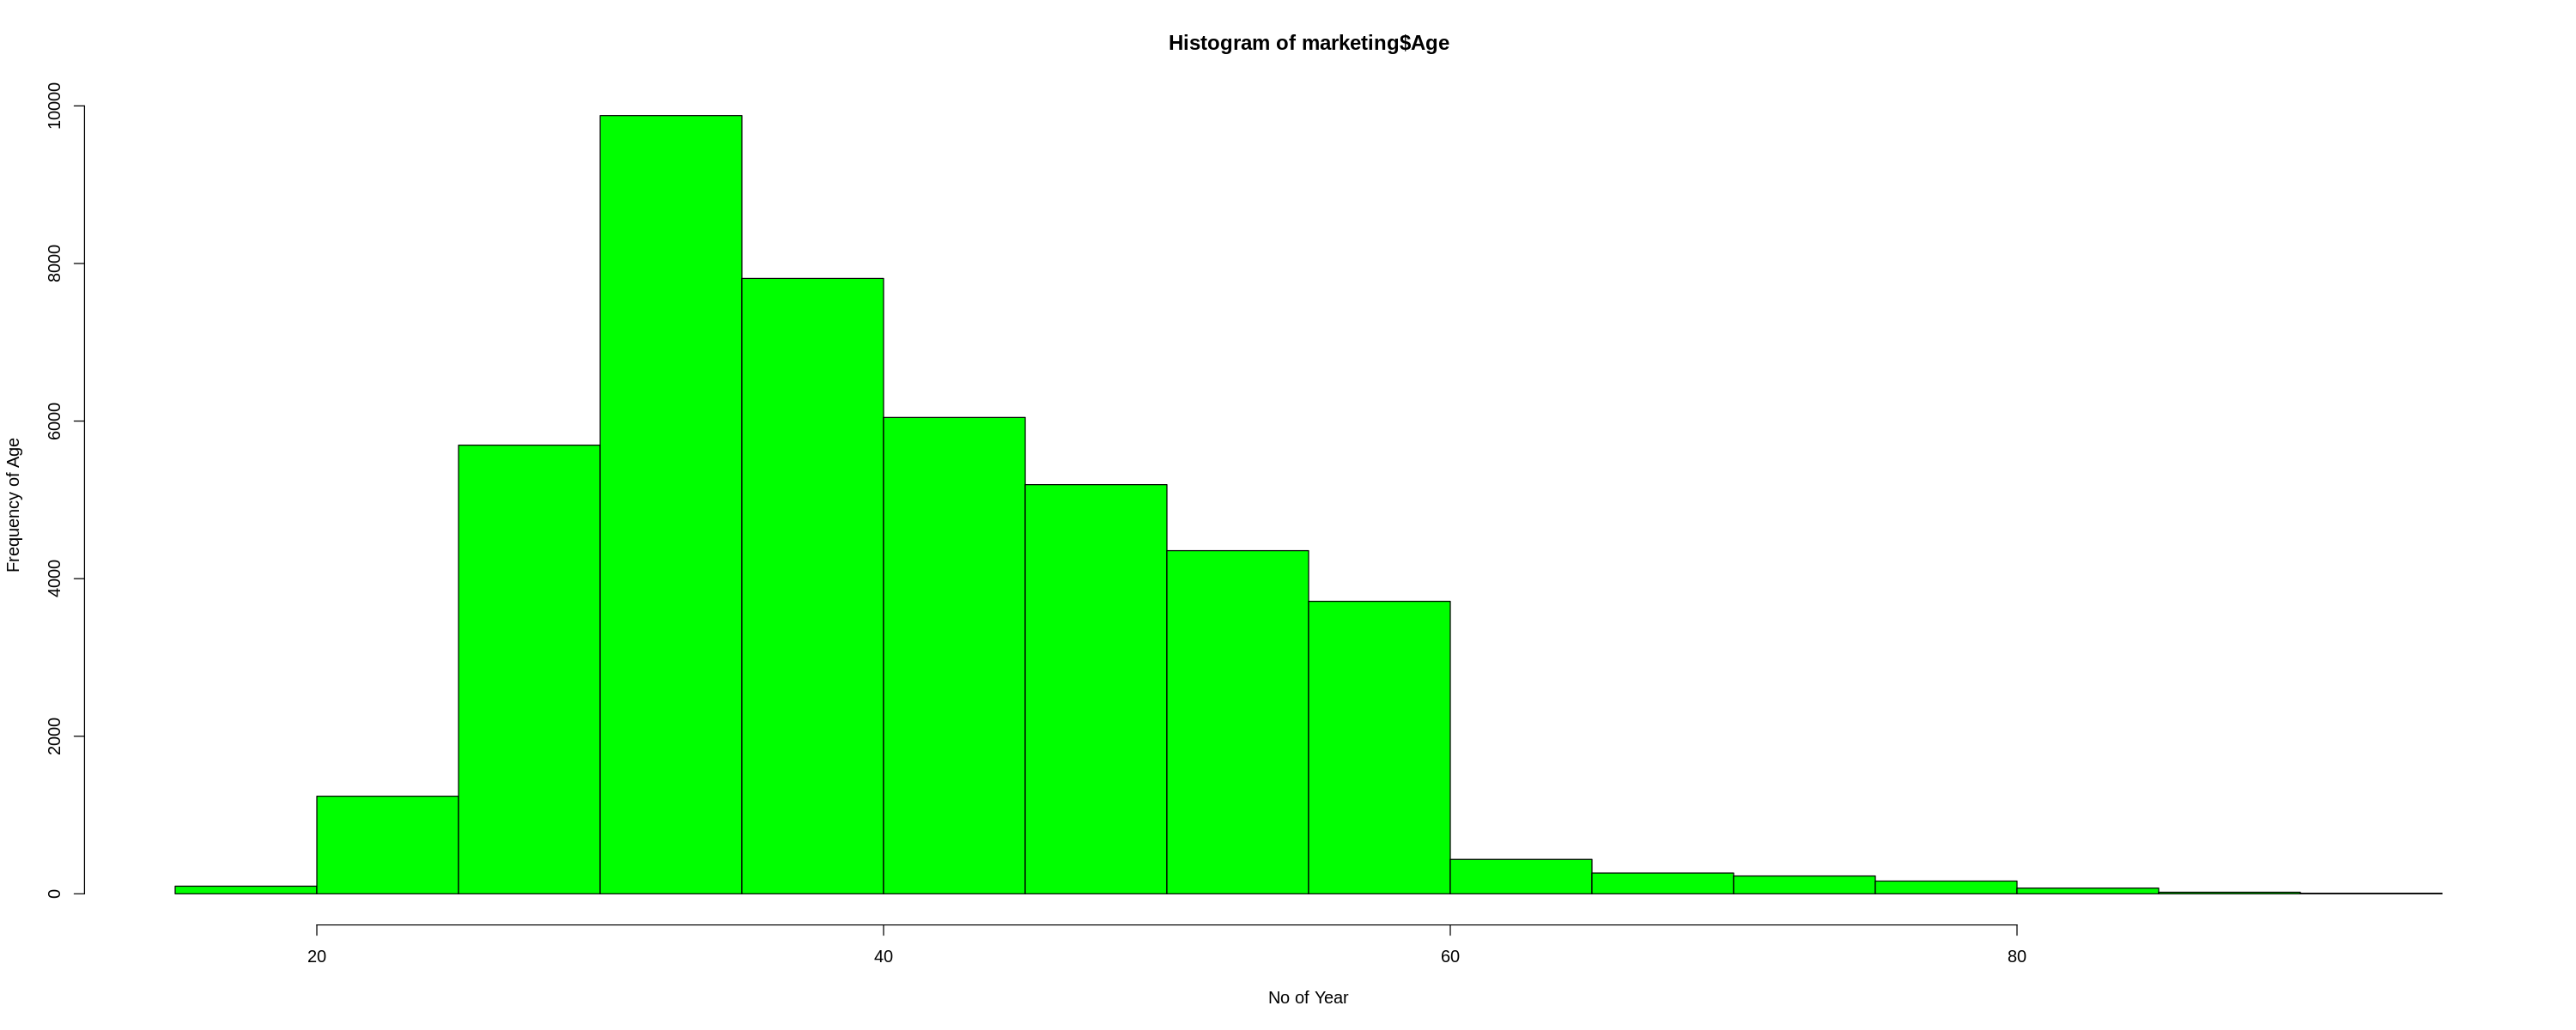

In [ ]:
#Age Distribution
options(repr.plot.width = 25, repr.plot.height =10)
hist(marketing$Age, xlab = "No of Year", ylab = "Frequency of Age", col = "green")

*  The age of clients lies between 18 to 95 years 
*   The median of the age distribution is 39 years
*  The mean age is 40.94 years

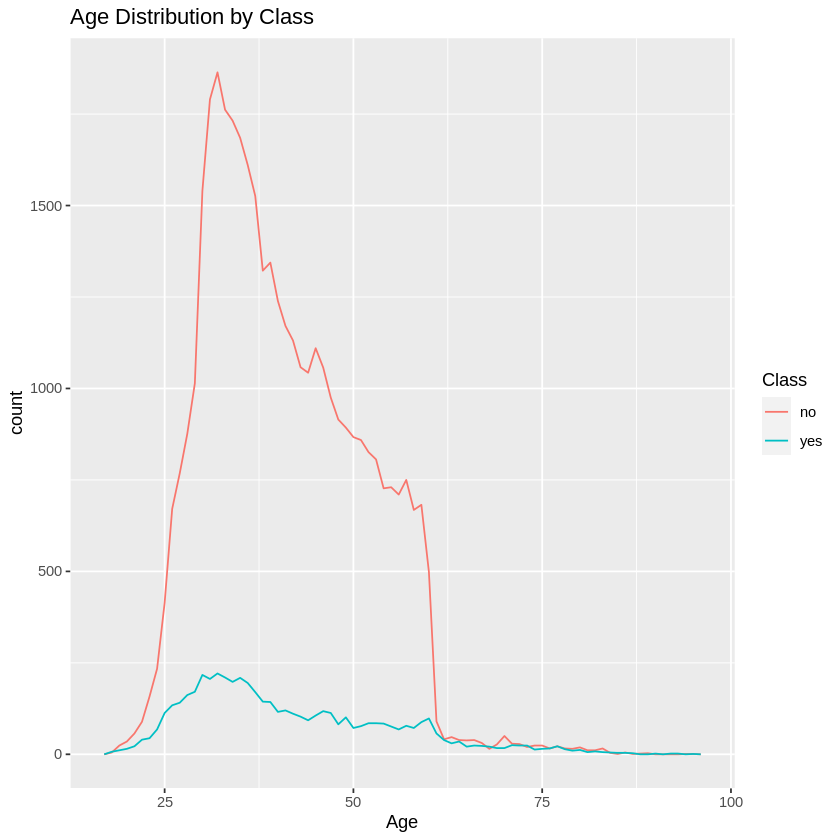

In [ ]:
#Age attribute vizualisation bt Class
ggplot(marketing, aes(Age, colour = Class)) +
geom_freqpoly(binwidth = 1) + labs(title="Age Distribution by Class")

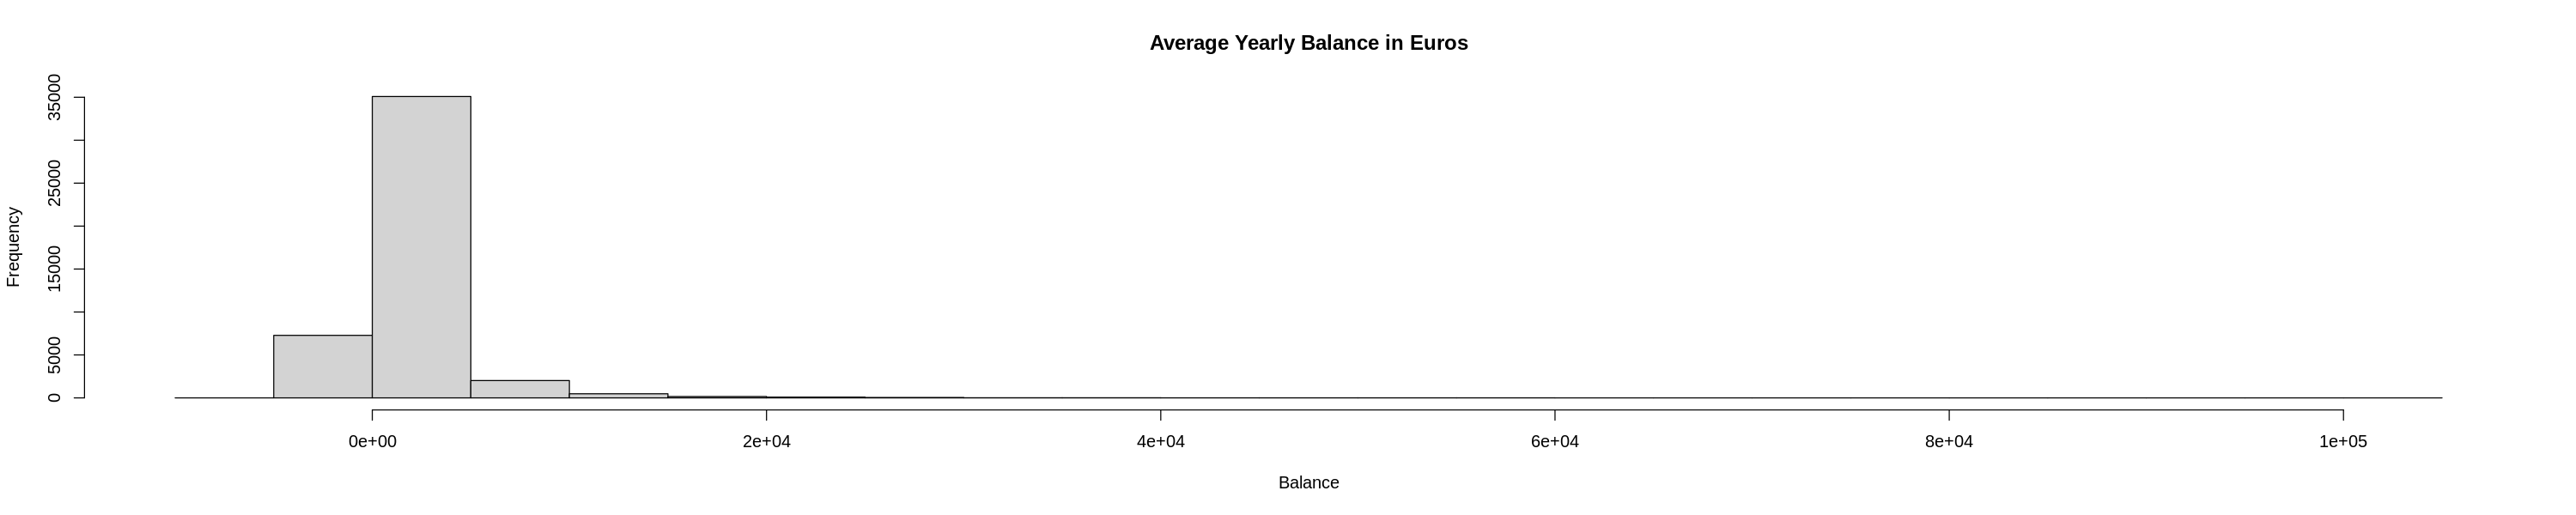

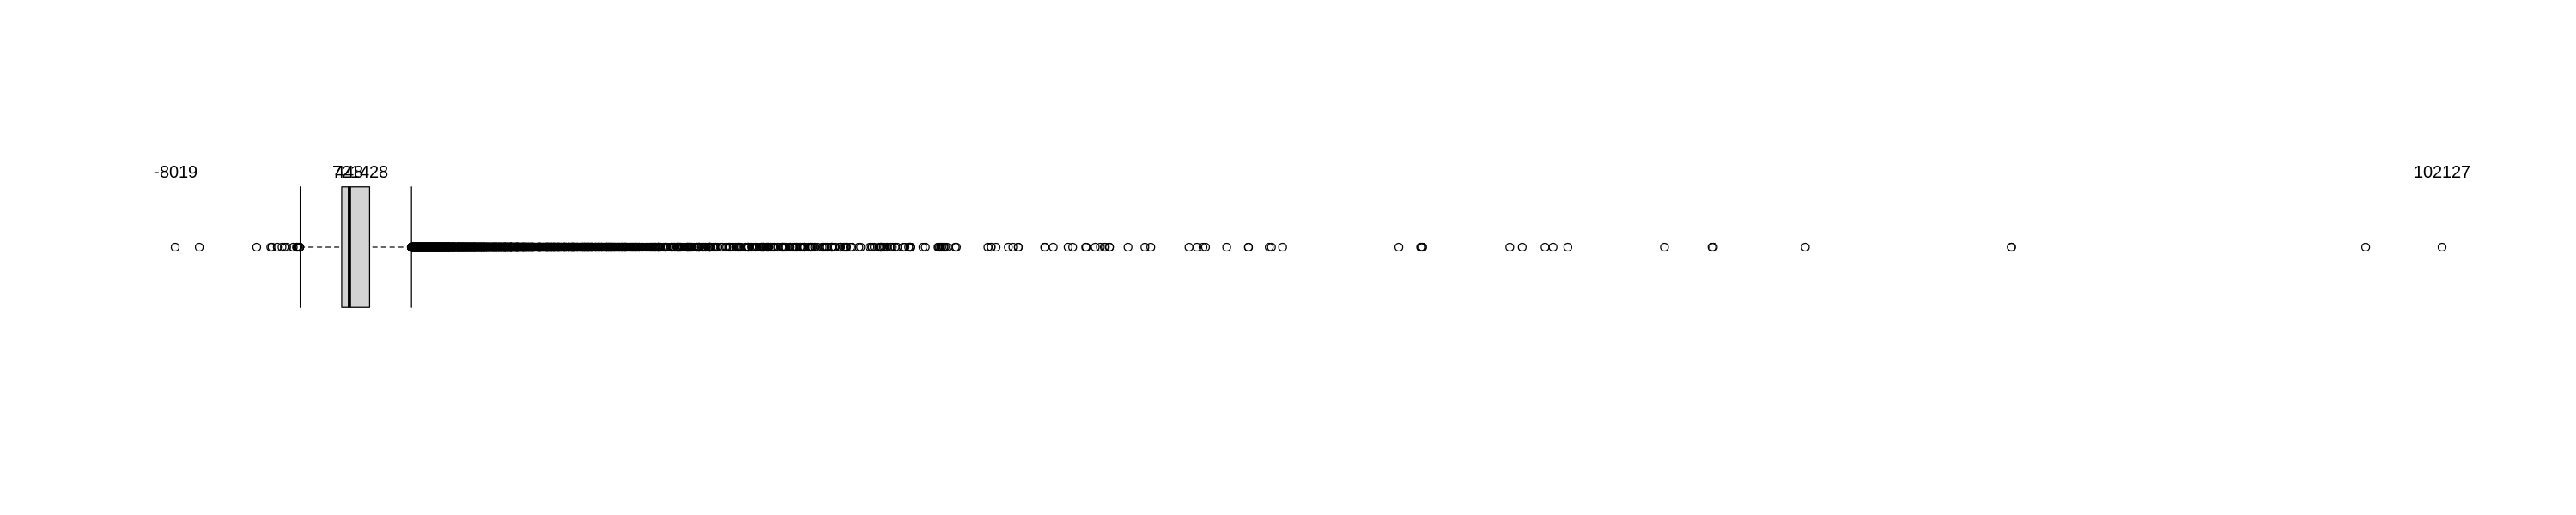

In [ ]:
#Balance Distribution
options(repr.plot.width = 25, repr.plot.height =5)
hist(Balance , xlab= "Balance",ylab="Frequency",main="Average Yearly Balance in Euros")
boxplot(Balance,horizontal = TRUE, axes = FALSE, staplewex = 1)
text(x=fivenum(Balance), labels =fivenum(Balance), y=1.25)

*   There seems to be many Outliers present in the data and is positively skewed as 
mean is larger than the median. 
*   50% of Data is located within 72 and 1428 Euros












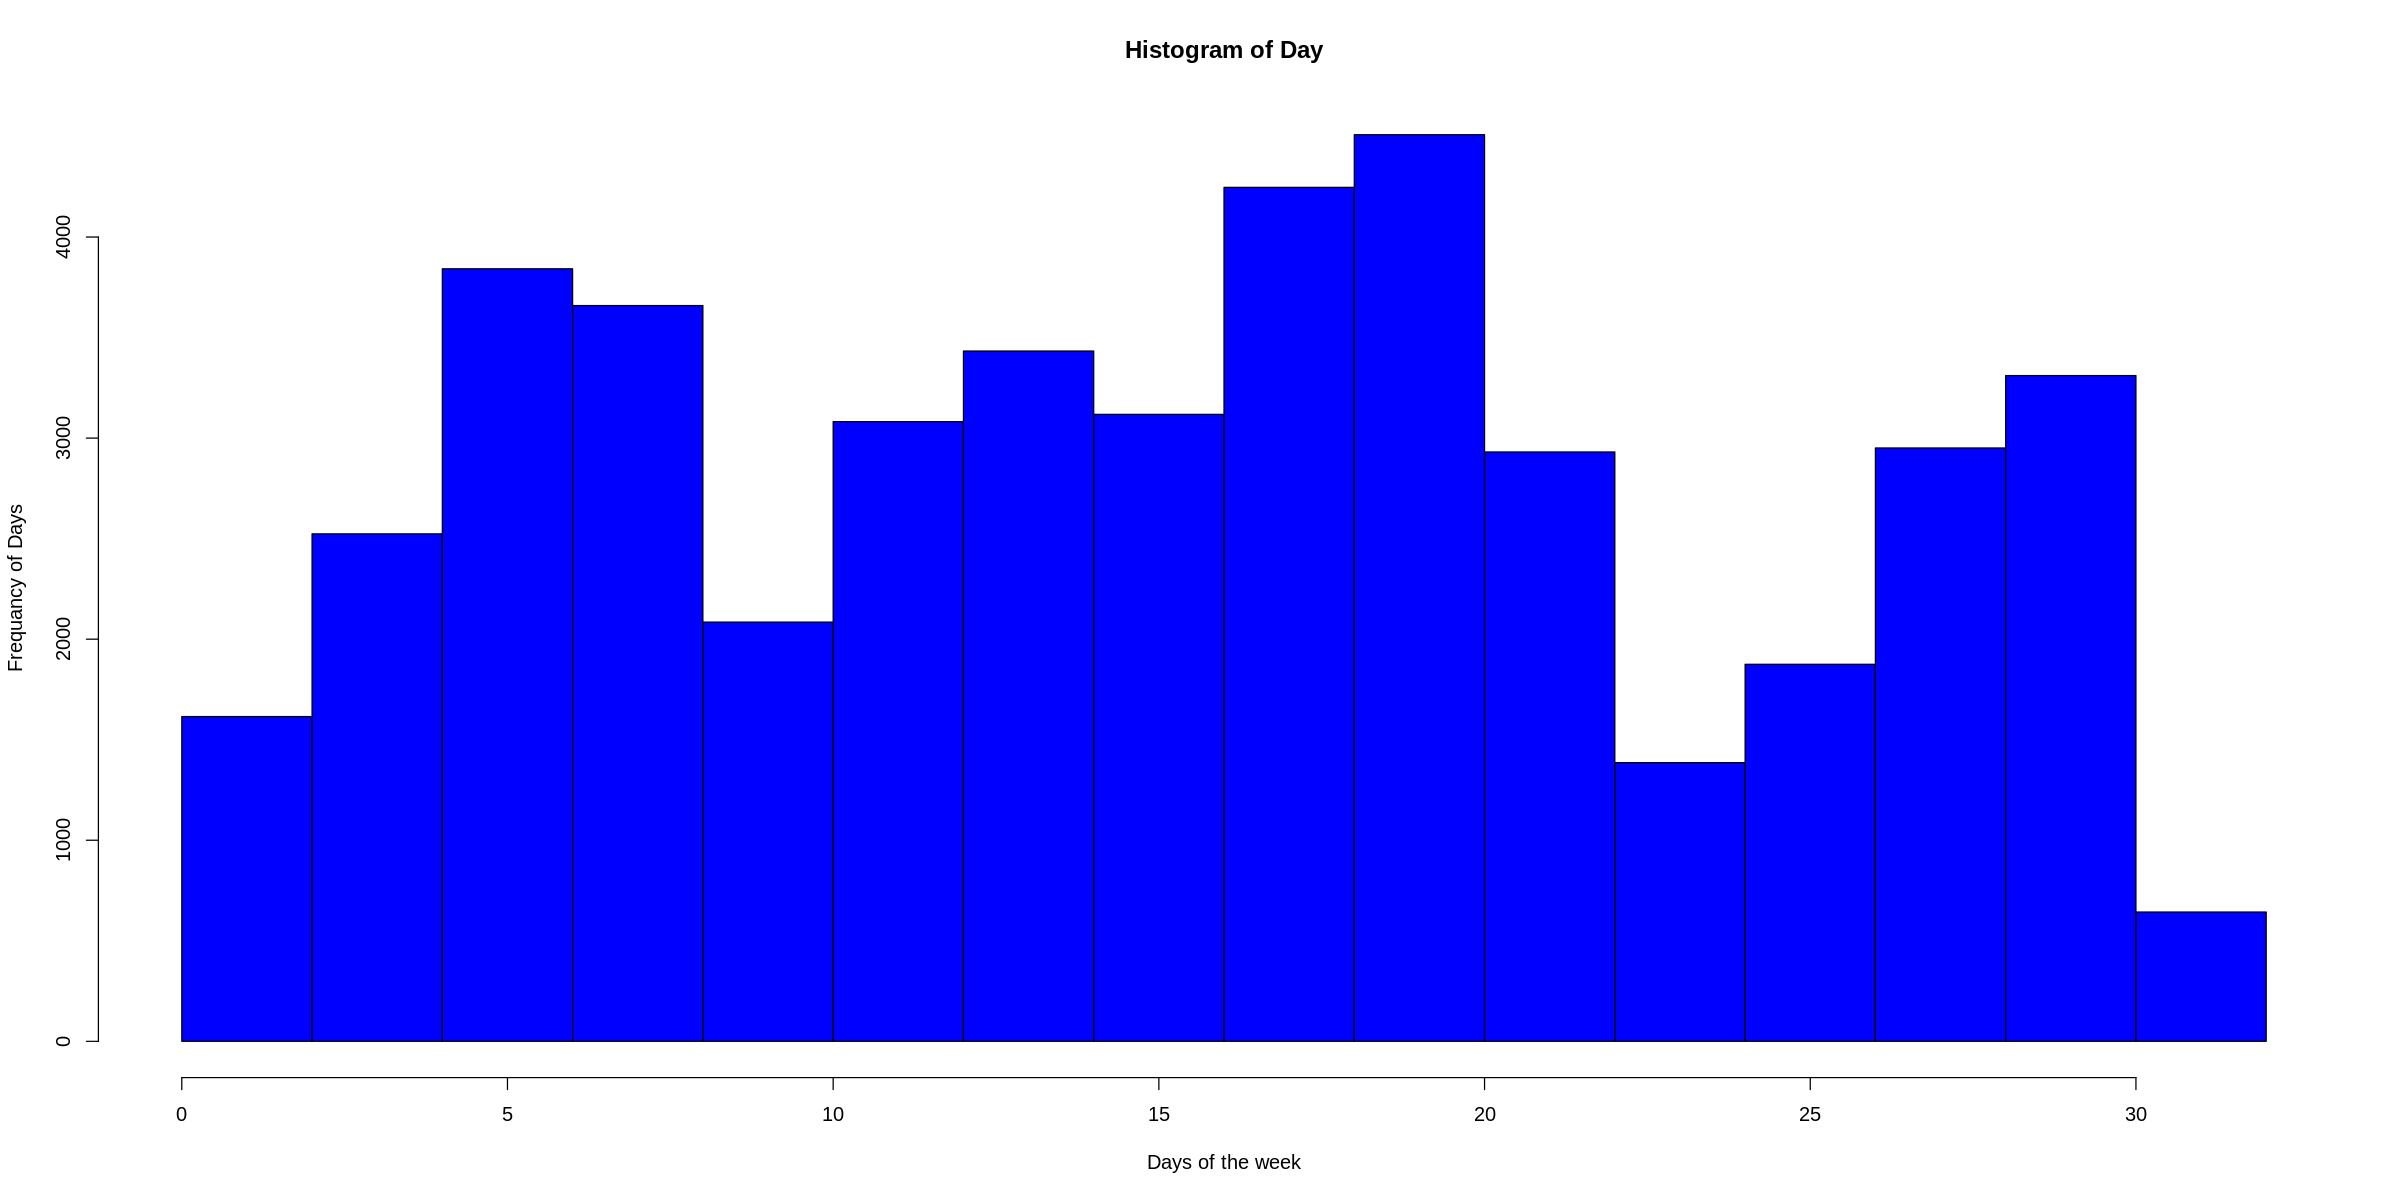

In [ ]:
#Day Attribute Vizualization
options(repr.plot.width = 20, repr.plot.height =10)
hist(Day, xlab = "Days of the week", ylab = "Frequancy of Days", col = "blue")

*   The histogram indicates a multimodal distribution
*   The mean of the days of week distribution is 15.81 days
  



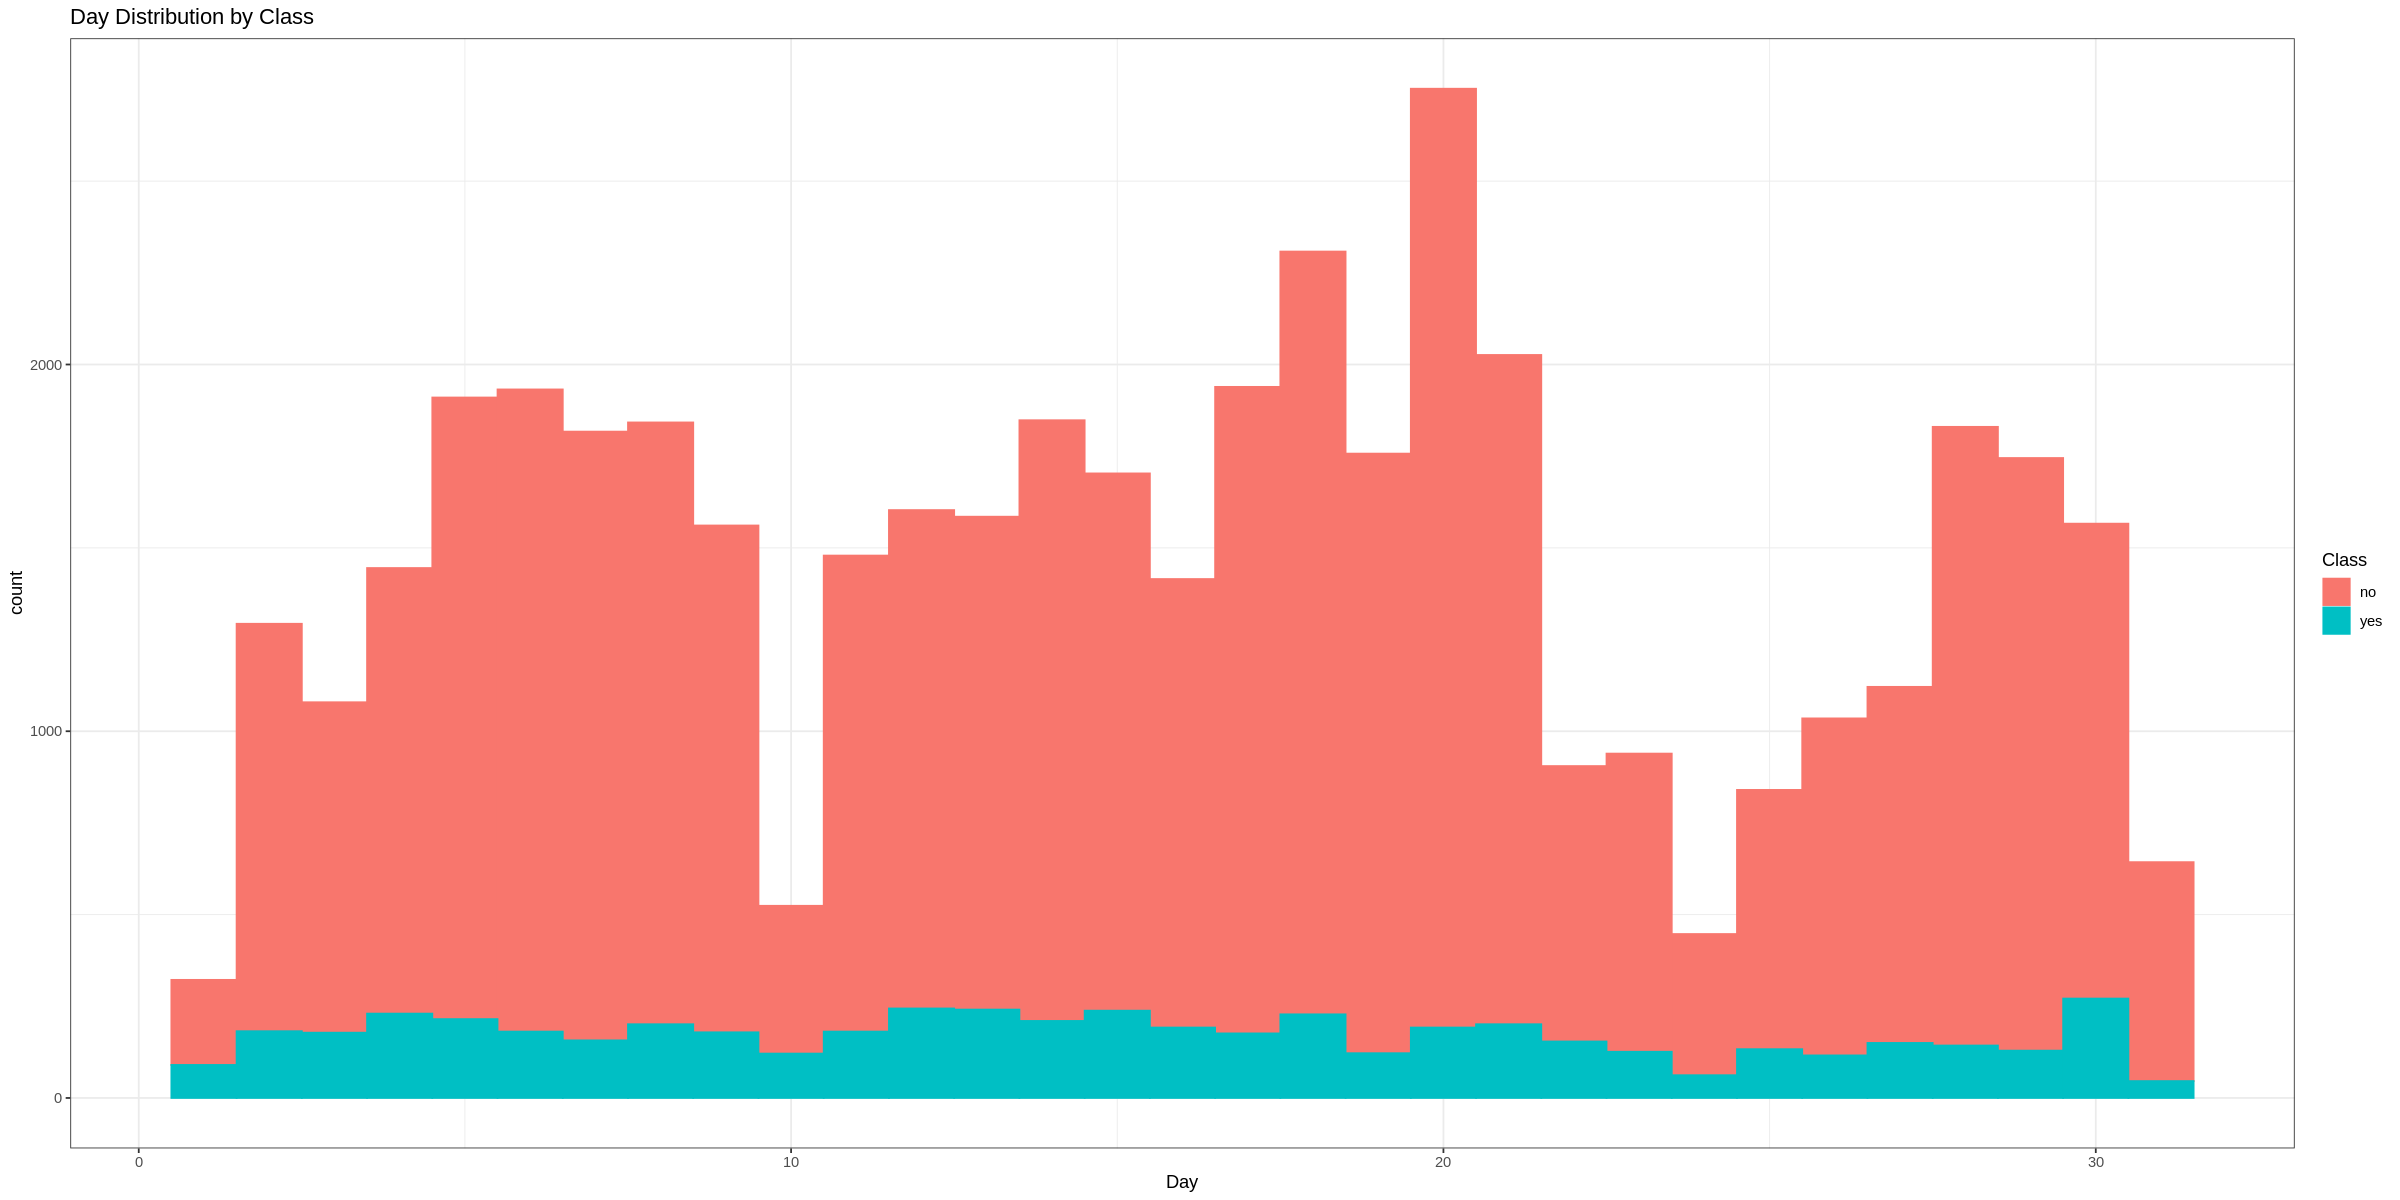

In [ ]:
#Day Attribute Vizualization by Class
d <- ggplot(marketing, aes(x=Day, fill=Class, color=Class)) +
geom_histogram(binwidth = 1) + labs(title="Day Distribution by Class")
d + theme_bw()

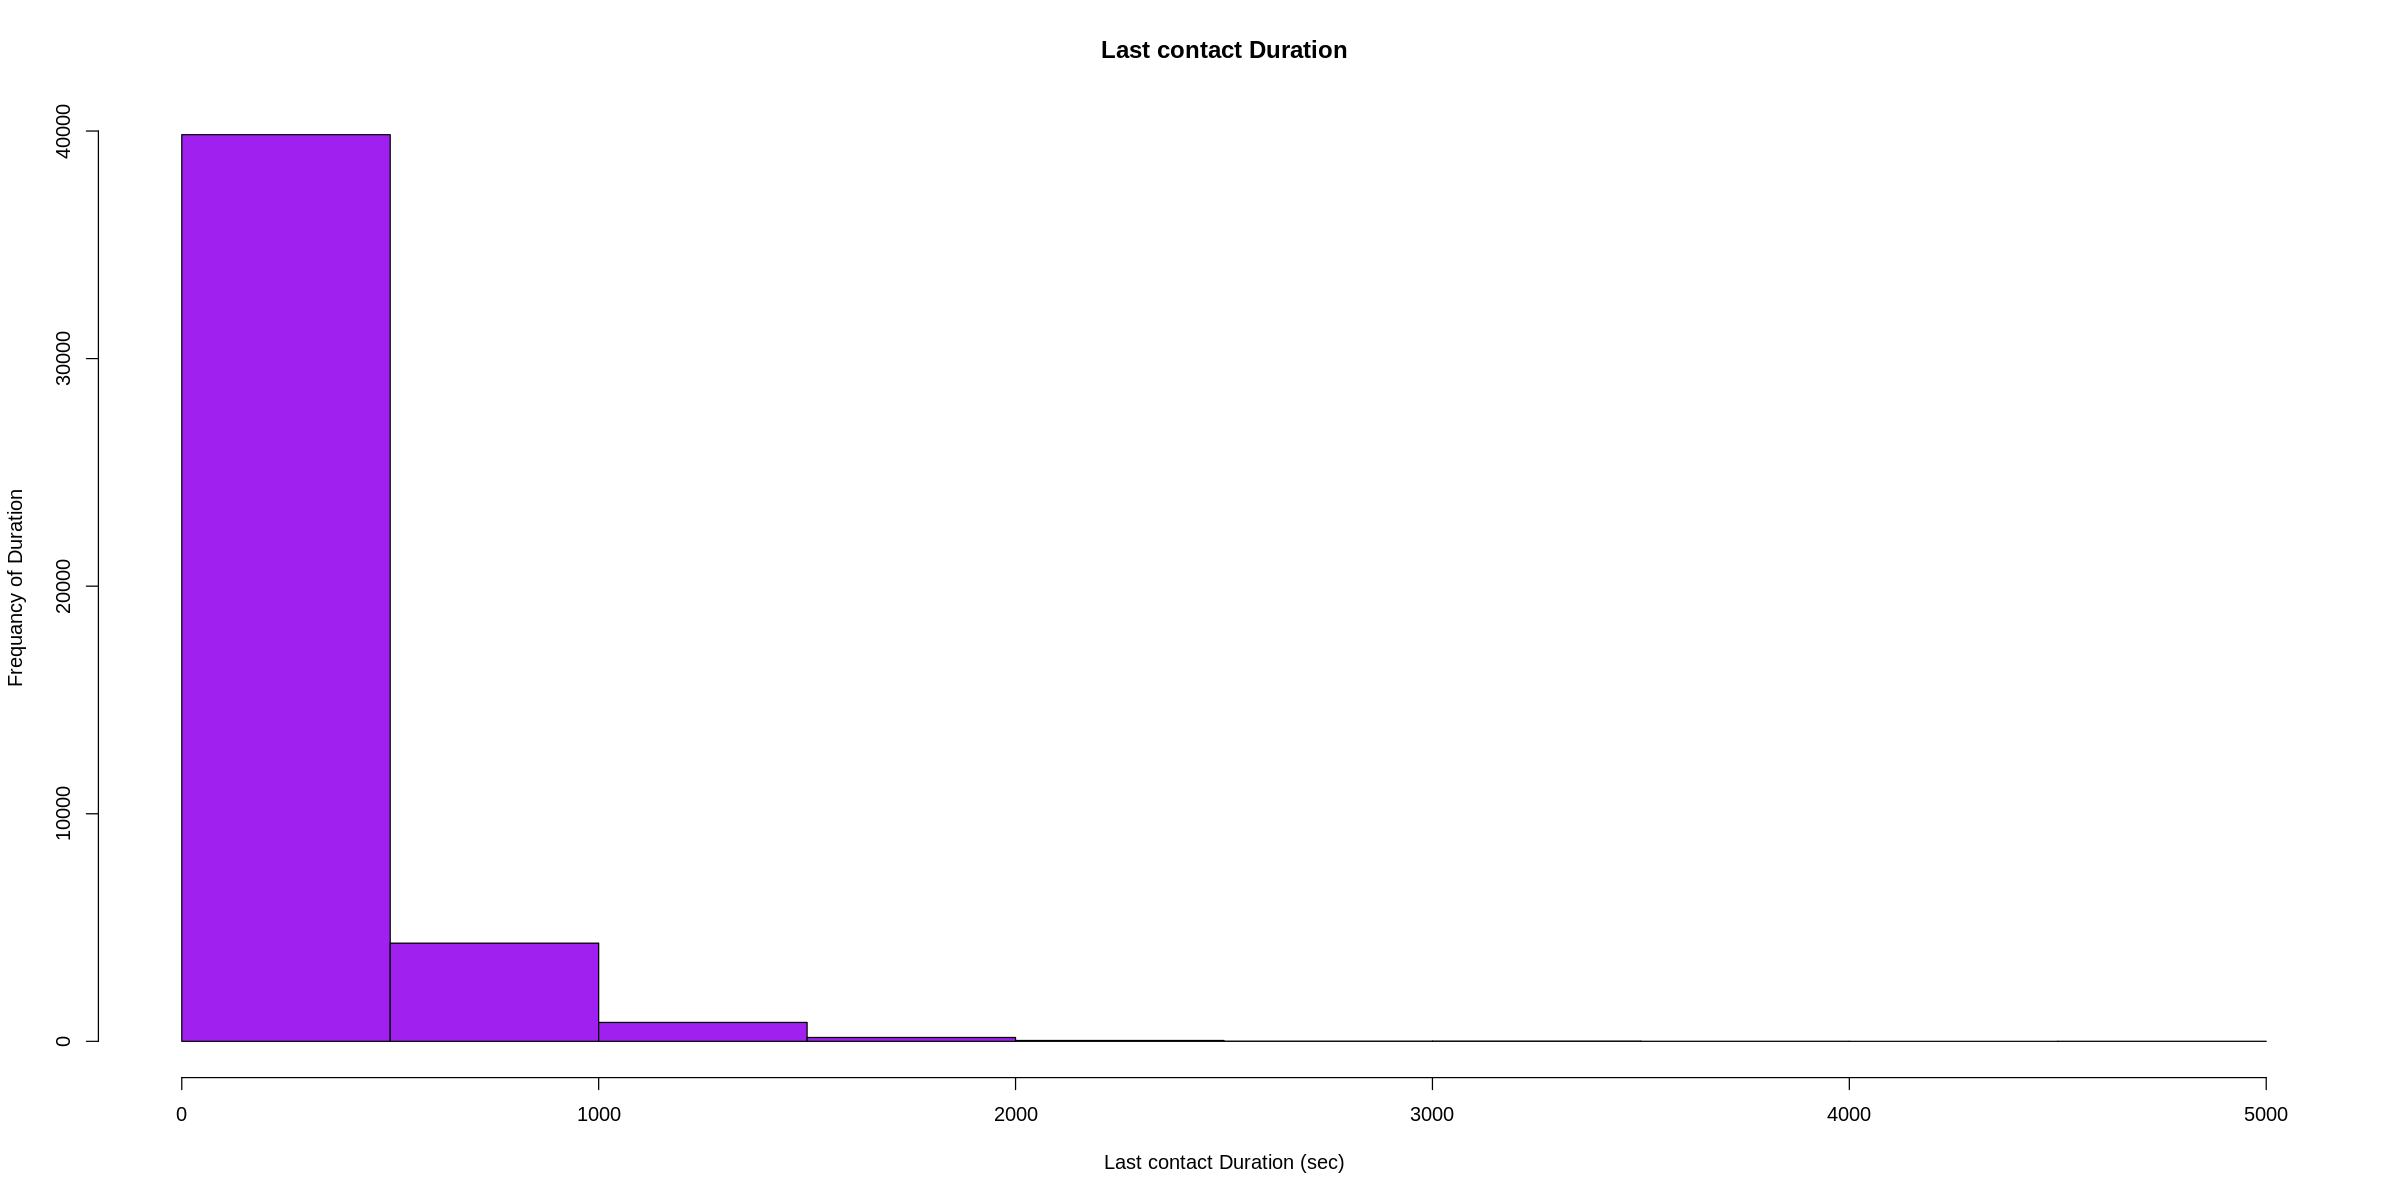

In [ ]:
#Duration Attribute Vizualization
hist(Duration, xlab = "Last contact Duration (sec)", ylab = "Frequancy of Duration", col = "purple", main = "Last contact Duration")


*   As in indicated in the summary chart the last contact duration lies between 0 to 4918 seconds
*   Positivite skewness trend is depicted by the Histogram



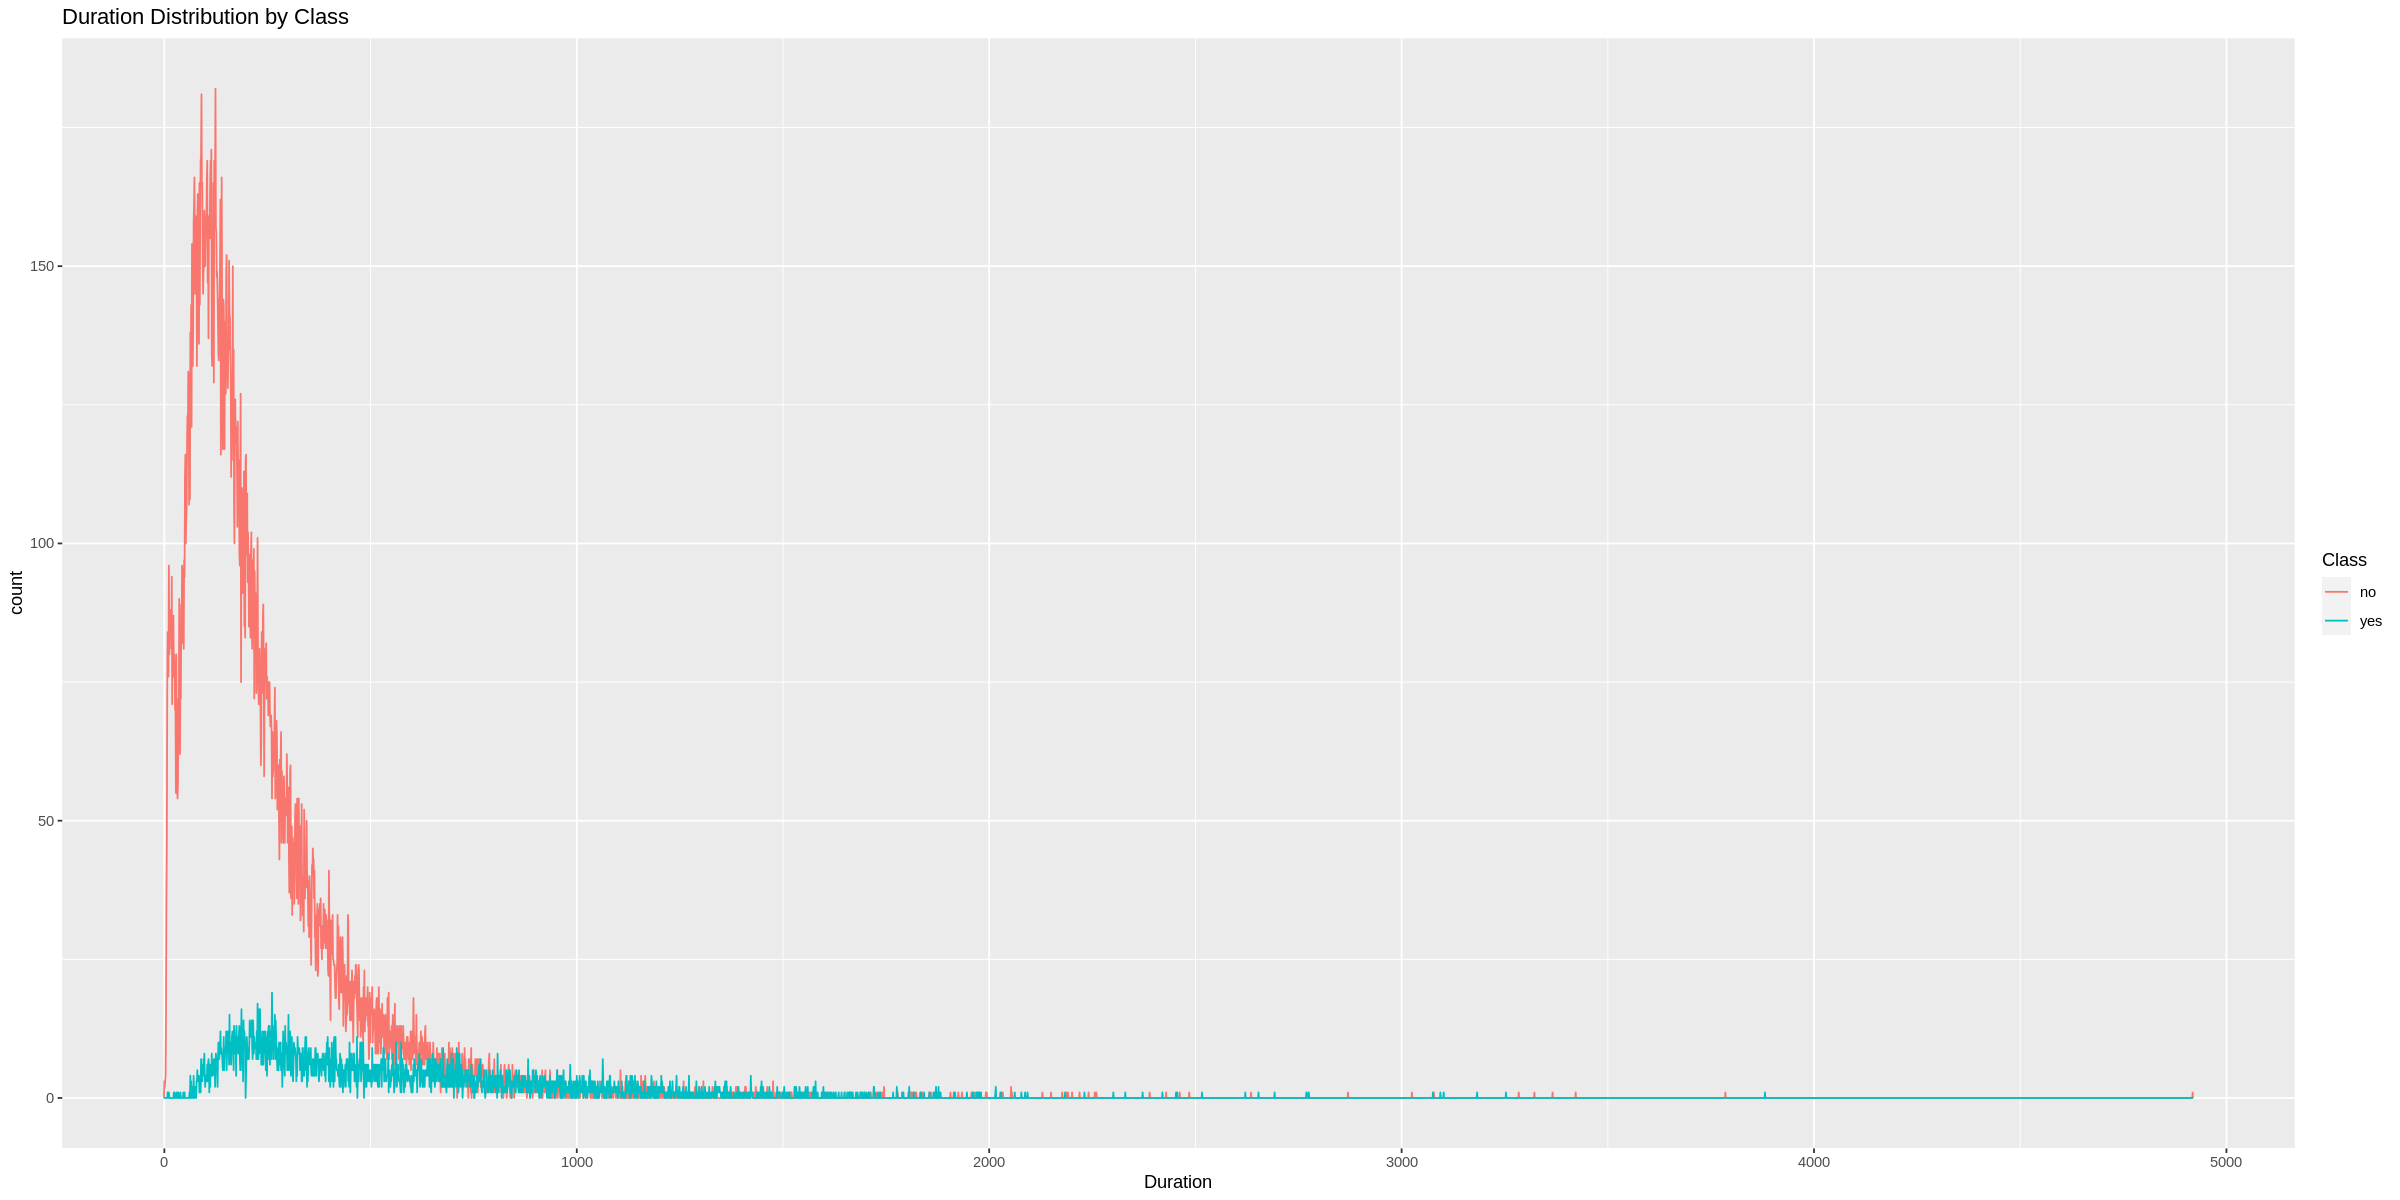

In [ ]:
#Duration Attribute Vizualization by Class
ggplot(marketing, aes(Duration, colour = Class)) +
geom_freqpoly(binwidth = 1) + labs(title="Duration Distribution by Class")

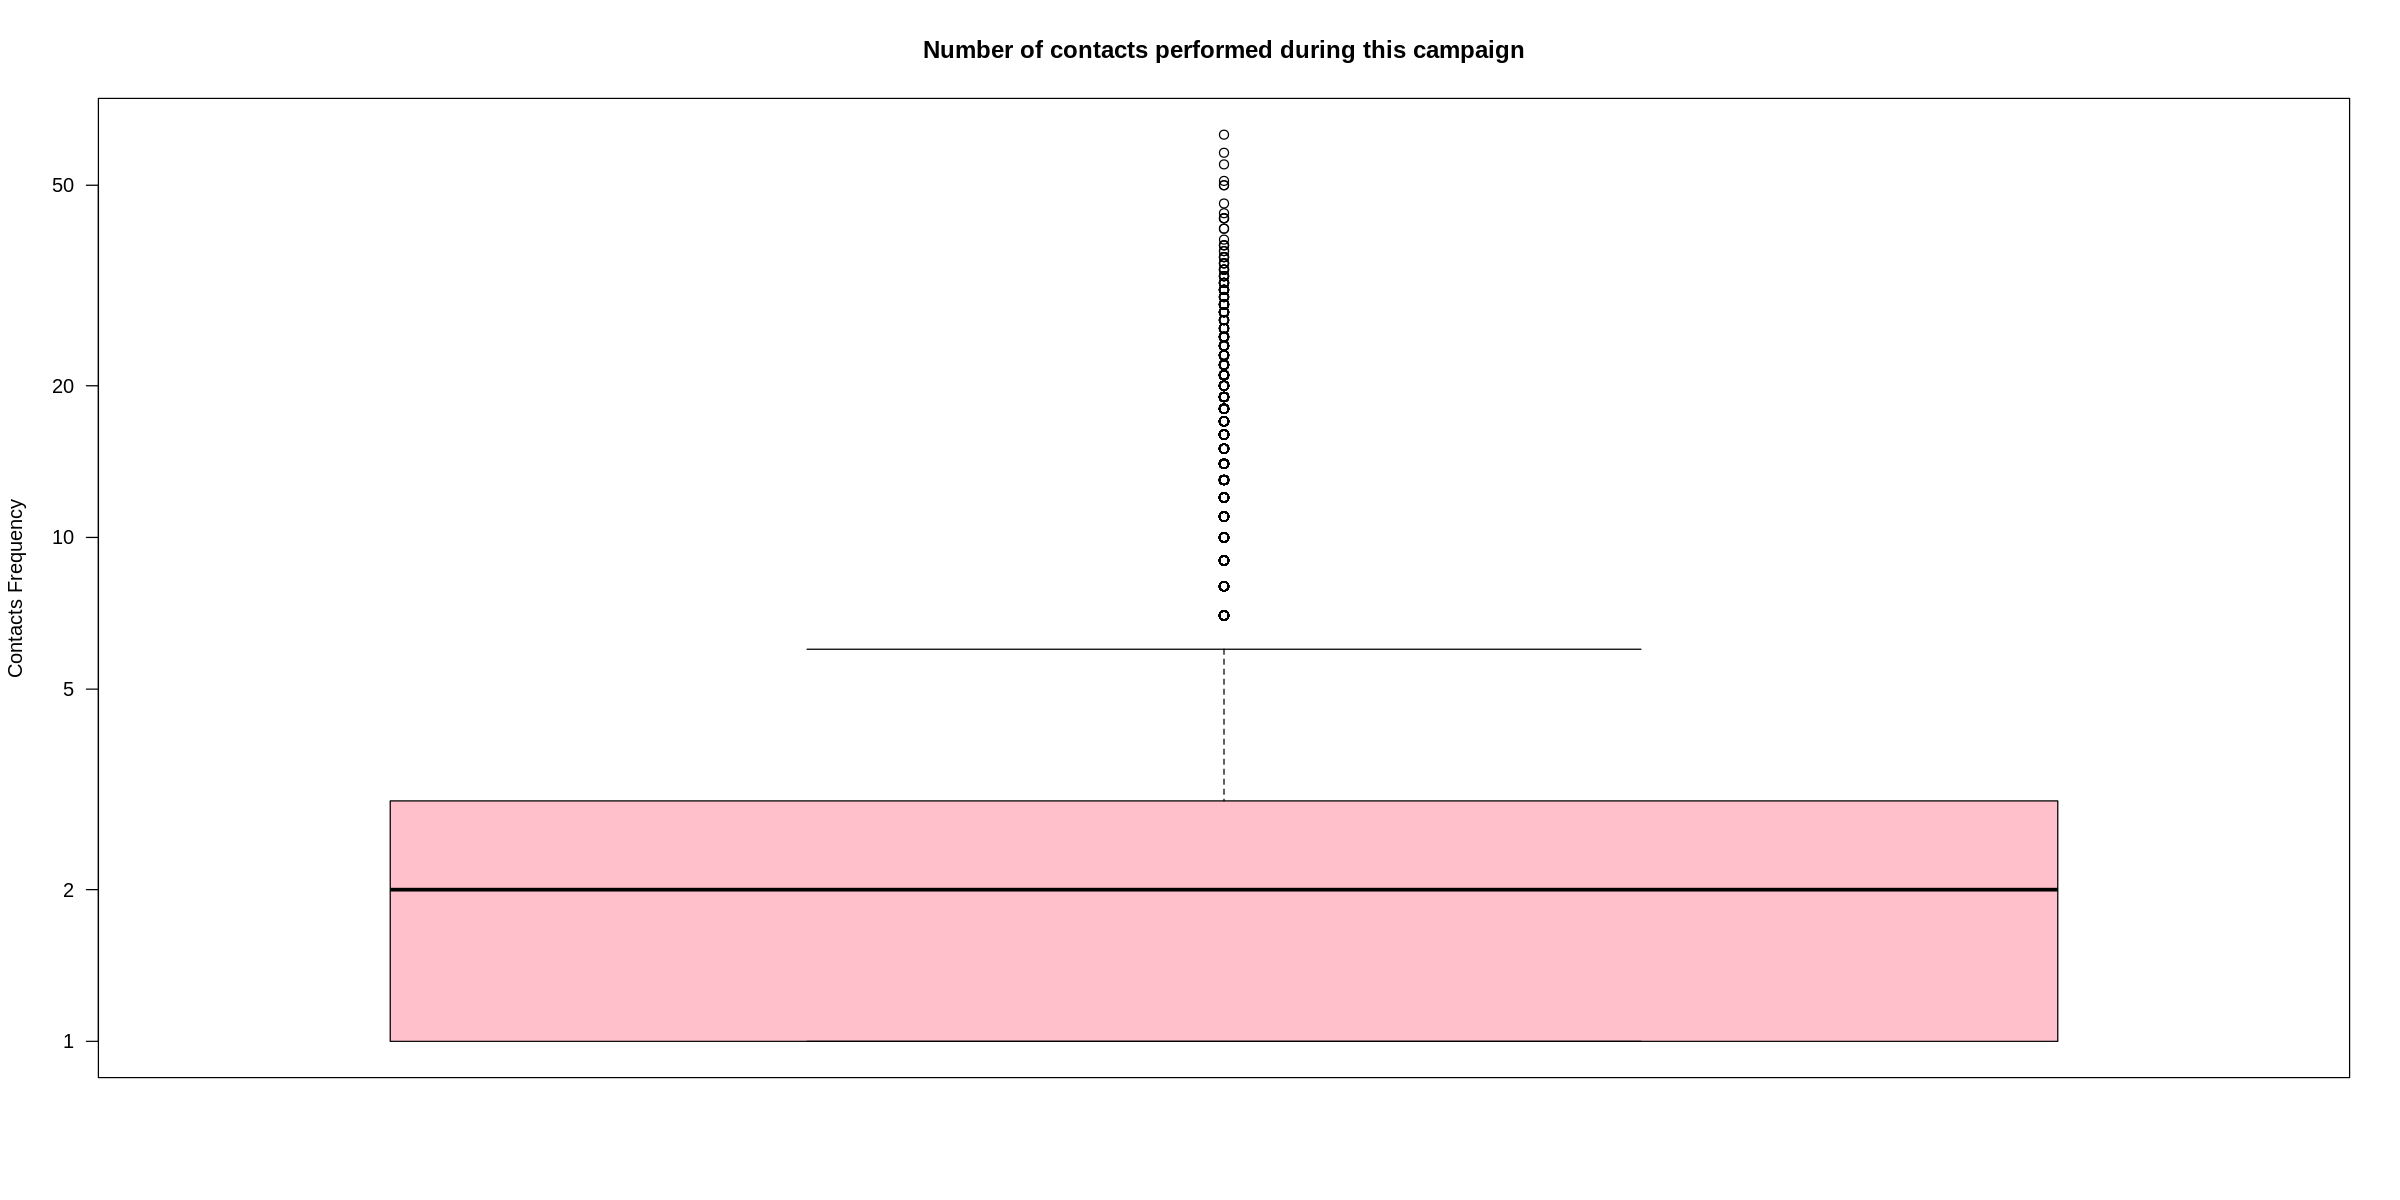

In [ ]:
#Campaign Visualization
boxplot(Campaign, data = marketing, ylab= "Contacts Frequency",
        varwidth = TRUE, log = 'y' ,las = 1, col='pink')

title("Number of contacts performed during this campaign")

* As per the summary, the number of contacts performed ranges between 1 and 63 
* The mean of the contacts performed is 2.764 

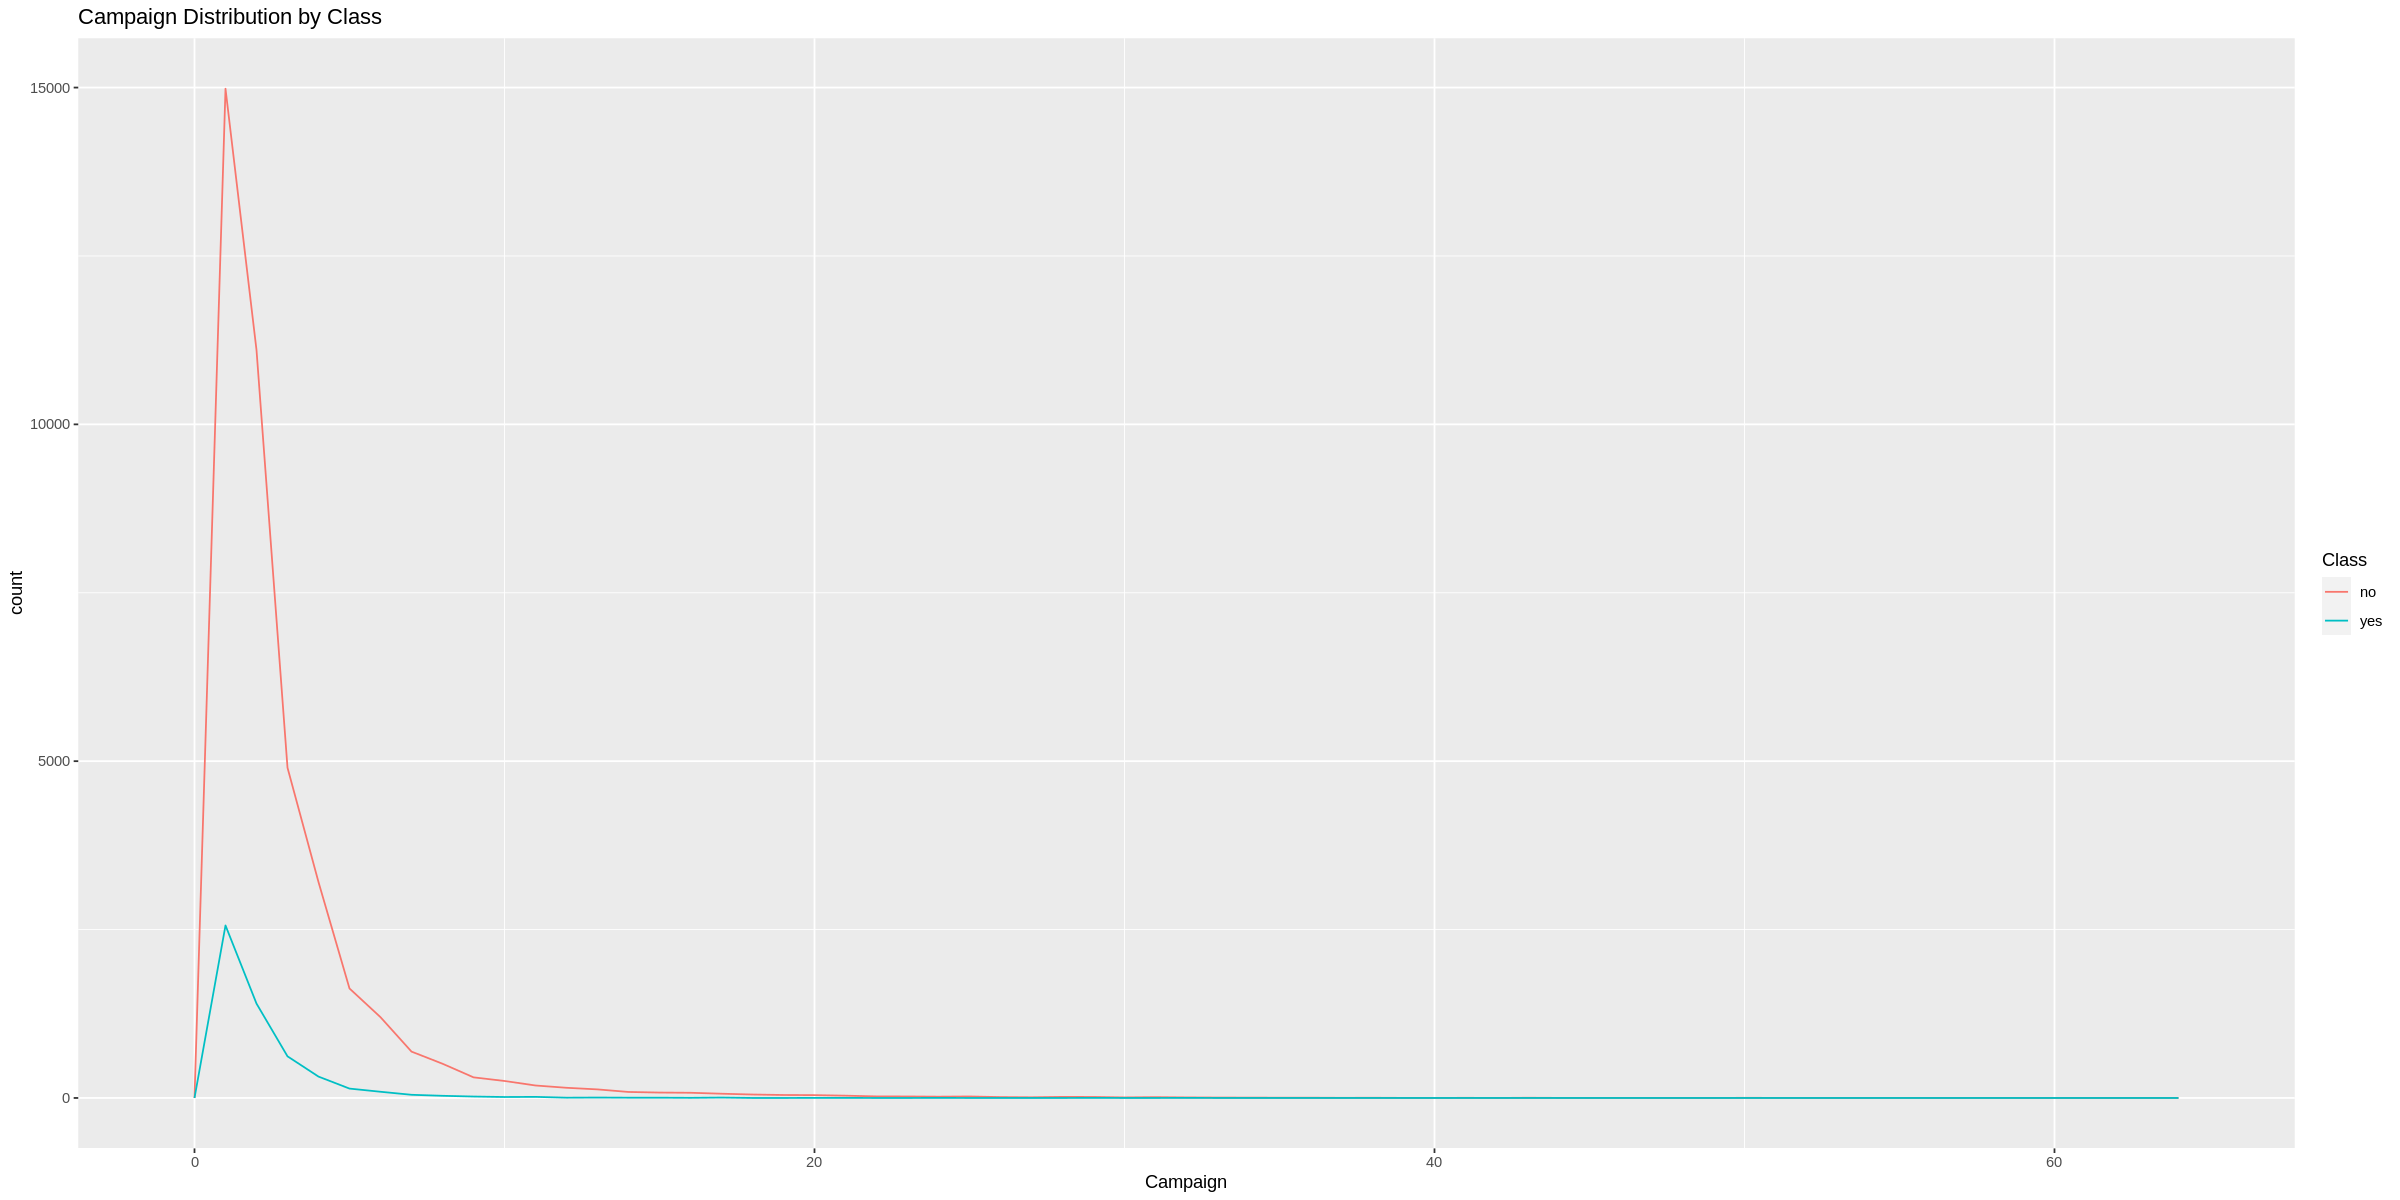

In [ ]:
#Campaign Attribute Vizualization by Class
ggplot(marketing, aes(Campaign, colour = Class)) +
geom_freqpoly(binwidth = 1) + labs(title="Campaign Distribution by Class")

We can see that the contact frequency mainly range from 1 to 3, with median of 2. There are several outliers, with the maximum reaching 63.

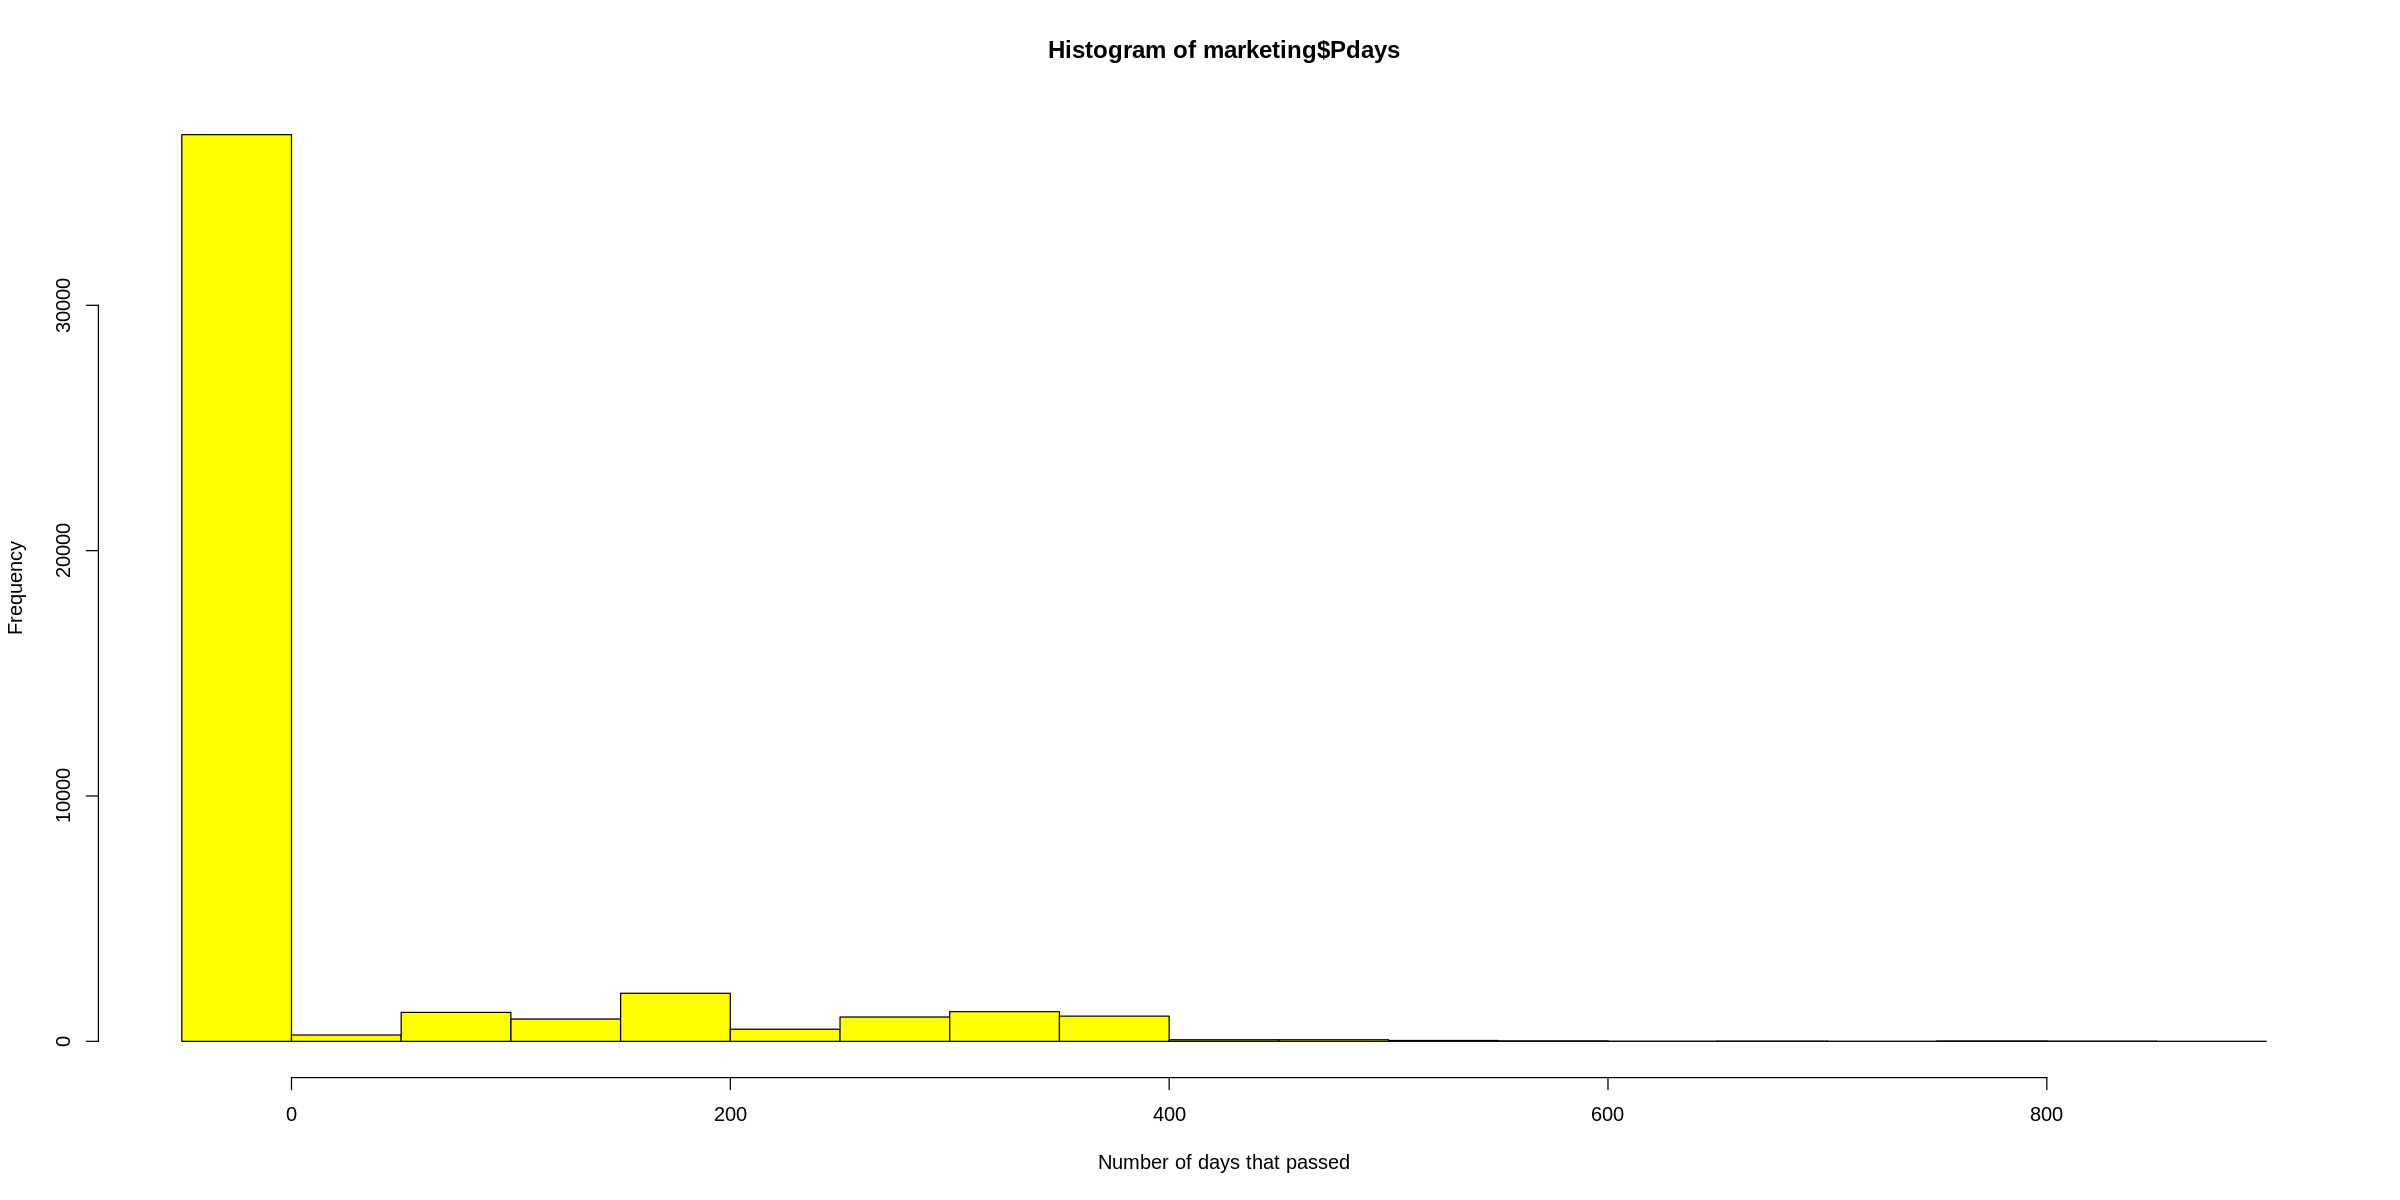

In [ ]:
hist(marketing$Pdays,xlab = "Number of days that passed", ylab = "Frequency", col = "yellow")

* As indicated in the summary the number of days that passed by after the client was last contacted from a previous campaign lies between -1 to 871 days
* The mean is 40.2 days 

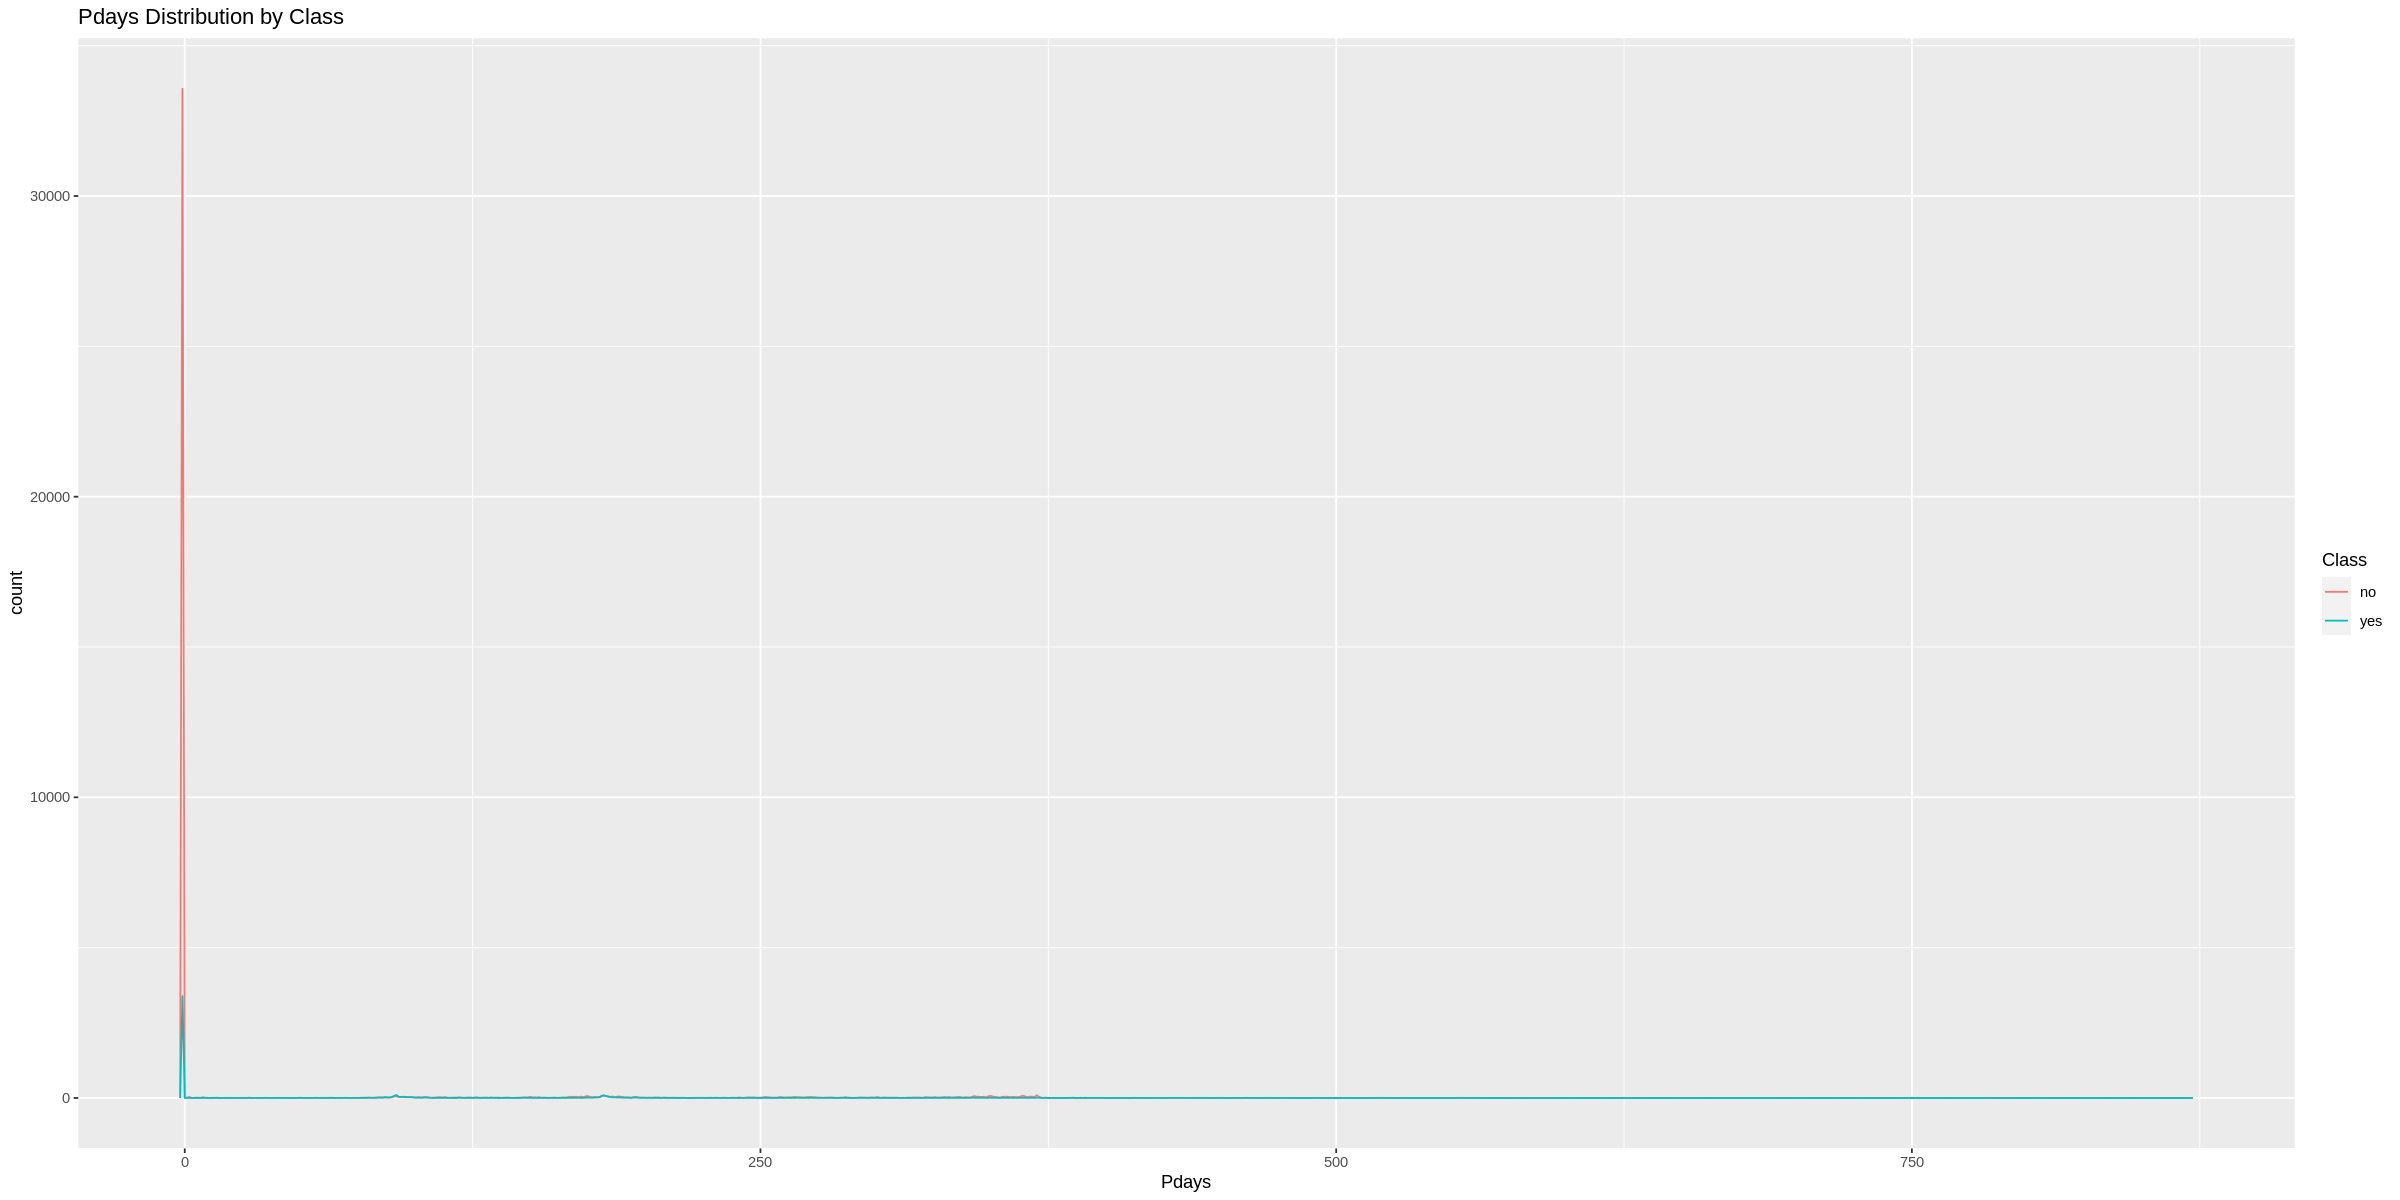

In [ ]:
#visual 6
ggplot(marketing, aes(Pdays, colour = Class)) +
geom_freqpoly(binwidth = 1) + labs(title="Pdays Distribution by Class")

**Categorical Variable** 

We will be using Bar Charts and Pie Charts to visualize Categorical Data as these charts sort the data into factors and show their respective frequency

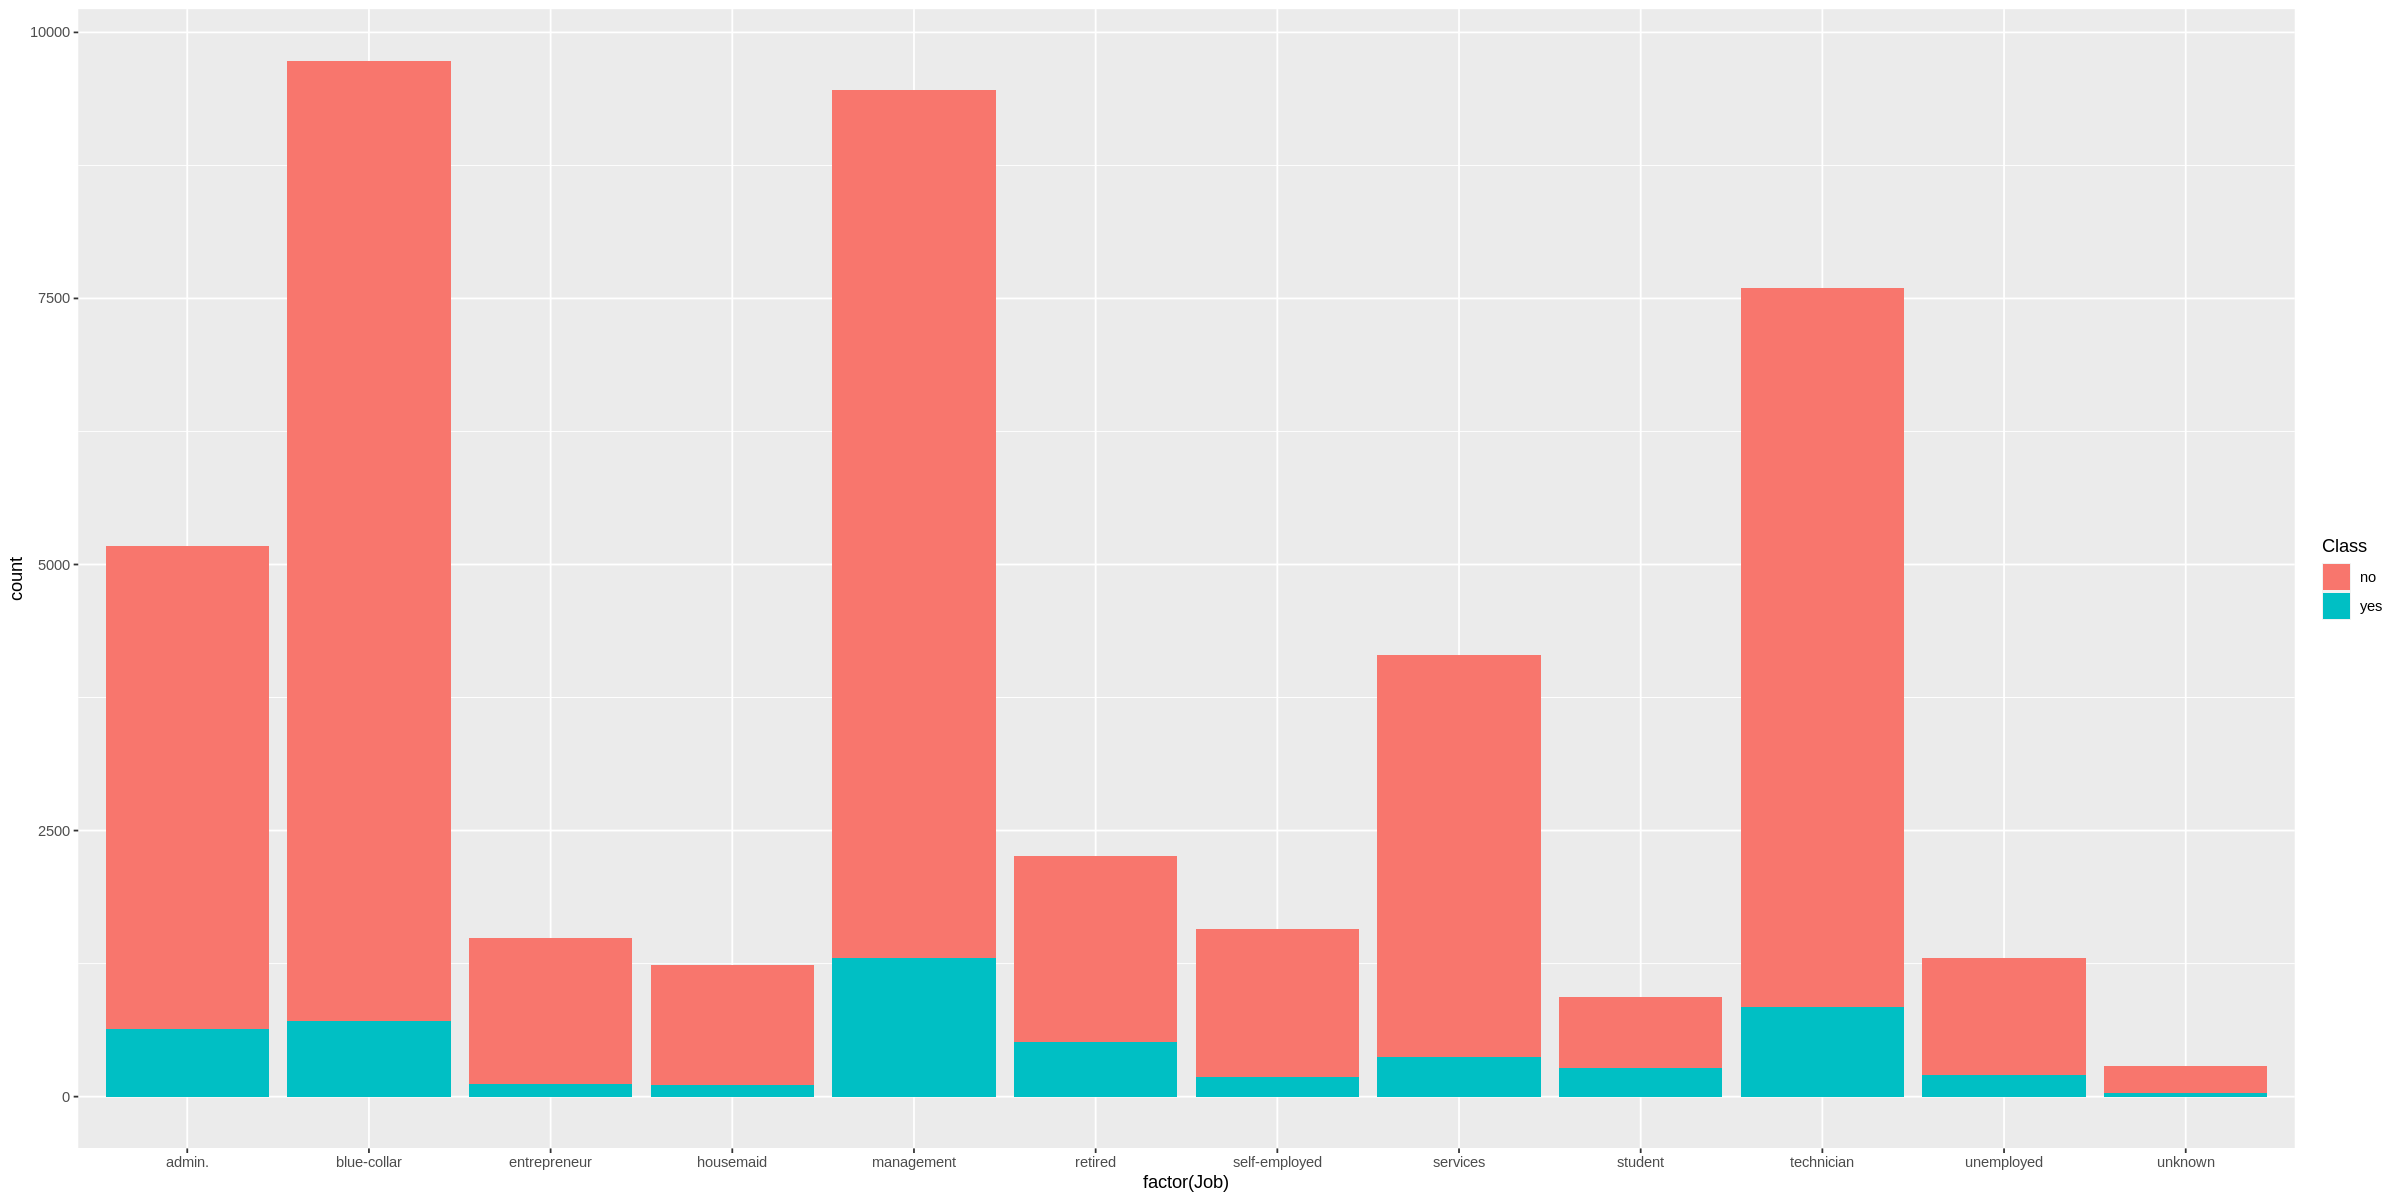

In [ ]:
# Job bar chart
options(repr.plot.width = 20, repr.plot.height =10)
ggplot(marketing, aes(x = factor(Job), fill=Class)) +
    geom_bar()

We can see that majority people contacted are blue collar, management, and technician.
On the other hand, housemaid, student, and people who have unknown jobs are the jobs that are rarely contacted.
The highest number of people who say yes come from management jobs.

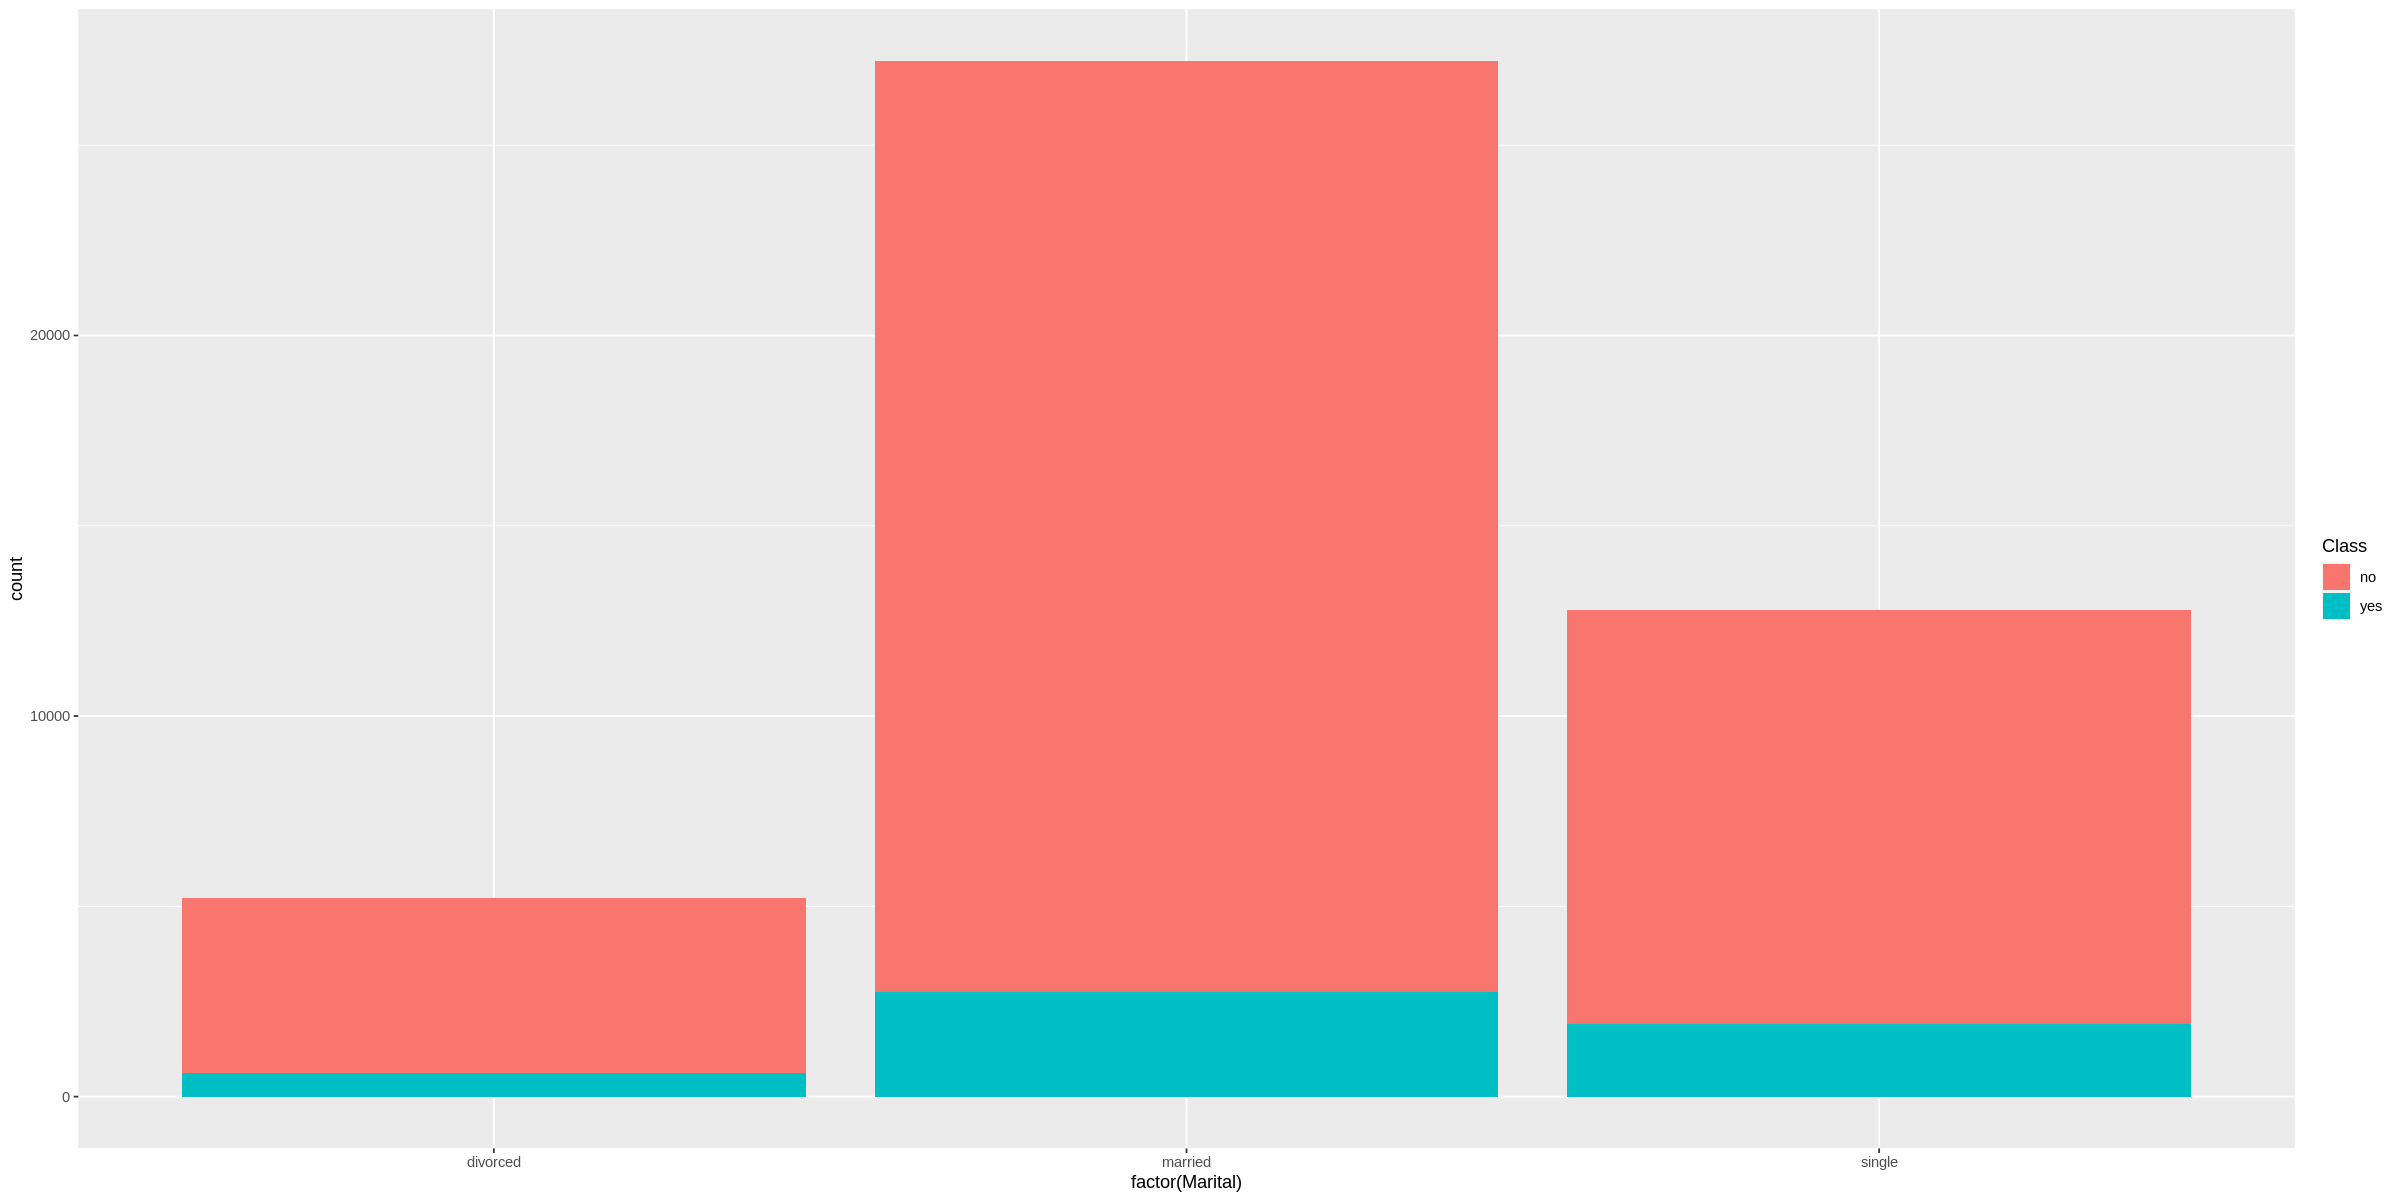

In [ ]:
#Marital Visualization
ggplot(marketing, aes(x = factor(Marital), fill=Class)) +
    geom_bar()

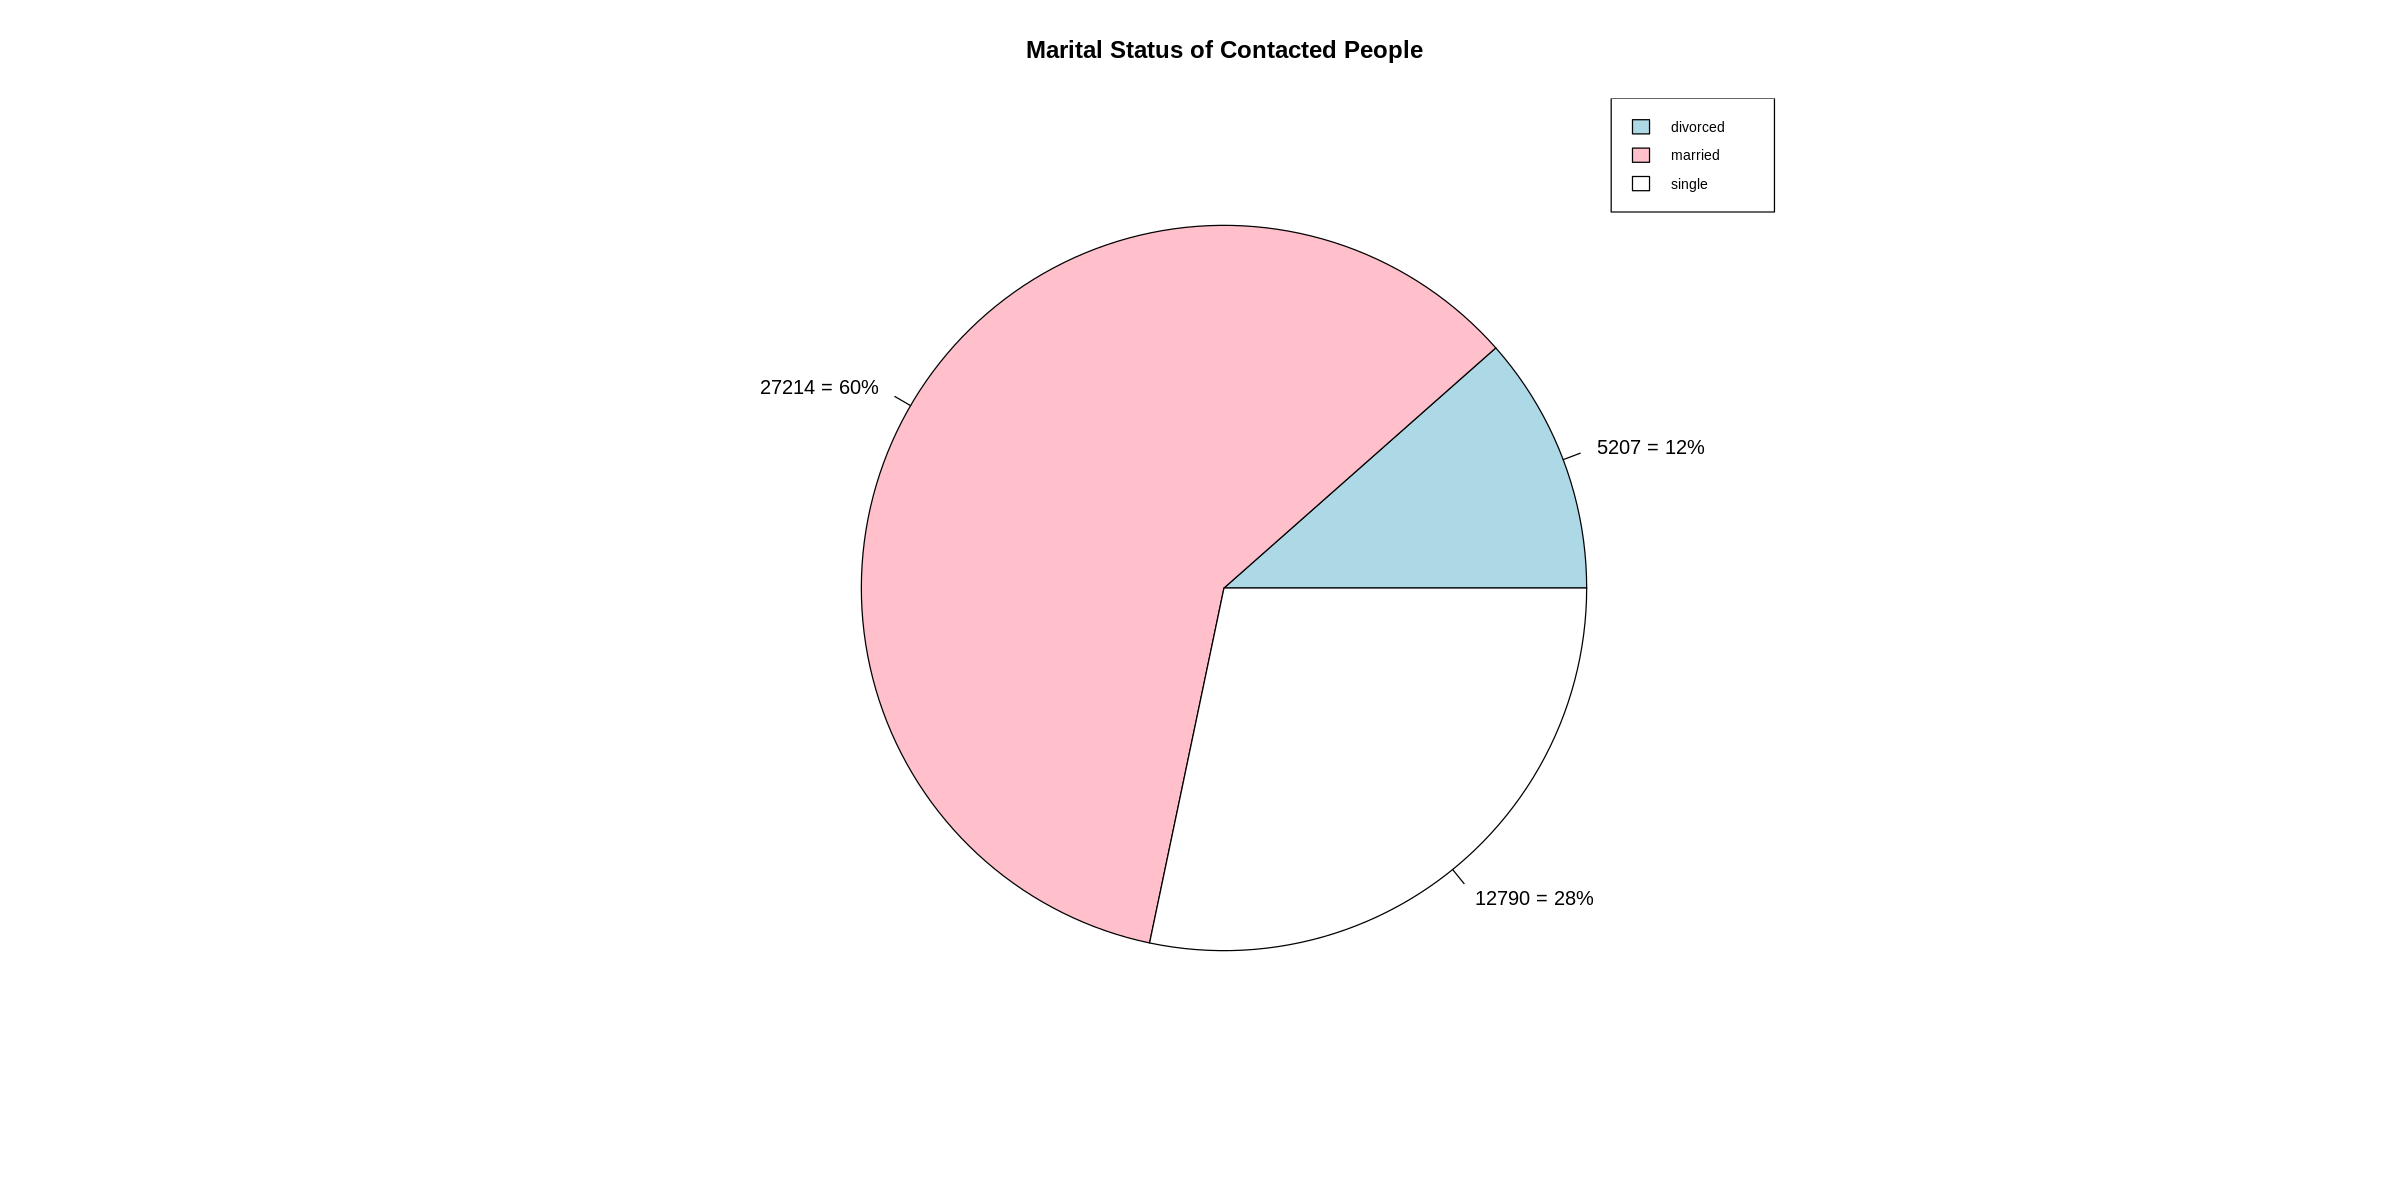

In [ ]:
#Marital Visualization
colors = c("lightblue", "pink", "white")
pie(table(marketing$Marital), main = "Marital Status of Contacted People", labels = paste0(table(marketing$Marital), " = ", round(100 * table(marketing$Marital)/sum(table(marketing$Marital))), '%' ), col = colors)
legend("topright", c("divorced","married","single"), cex=0.7, fill=colors)

60% of people who are contacted by the marketing team is married, where as 28% of them are single and 12% are divorced. Most subscribers come from married status.

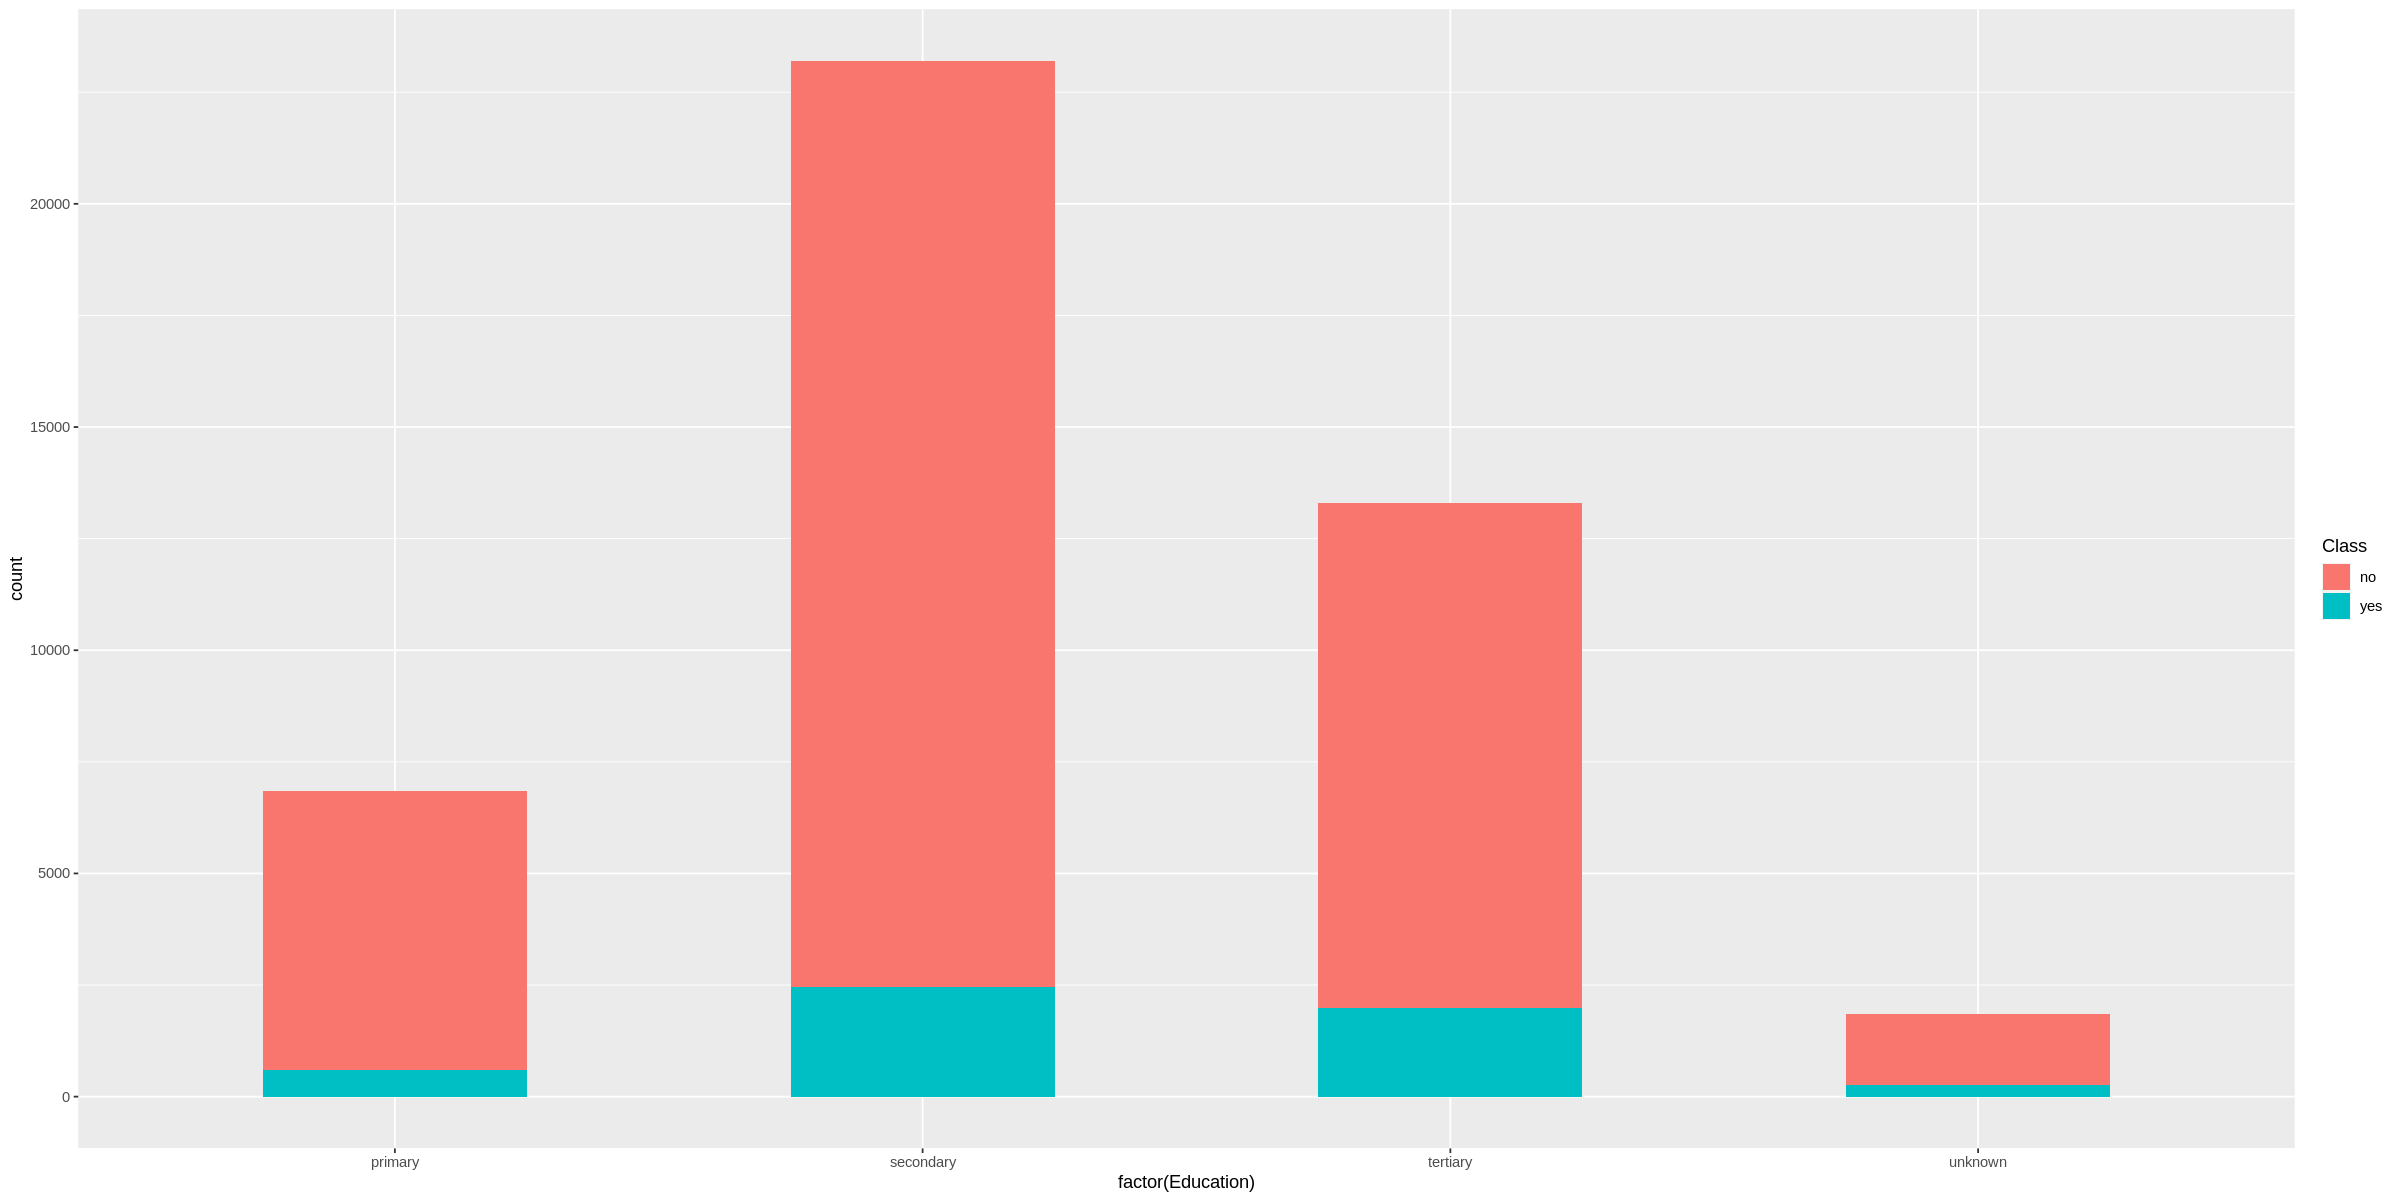

In [ ]:
#Education Bar Chart
ggplot(marketing,aes(x=factor(Education),fill=Class))+ geom_bar(width = 0.5)


It appears that most individuals targeted by the bank only possess at most secondary education followed by tertiary education and those with tertiary education seems to have a larger proportion of them responding to the term deposits

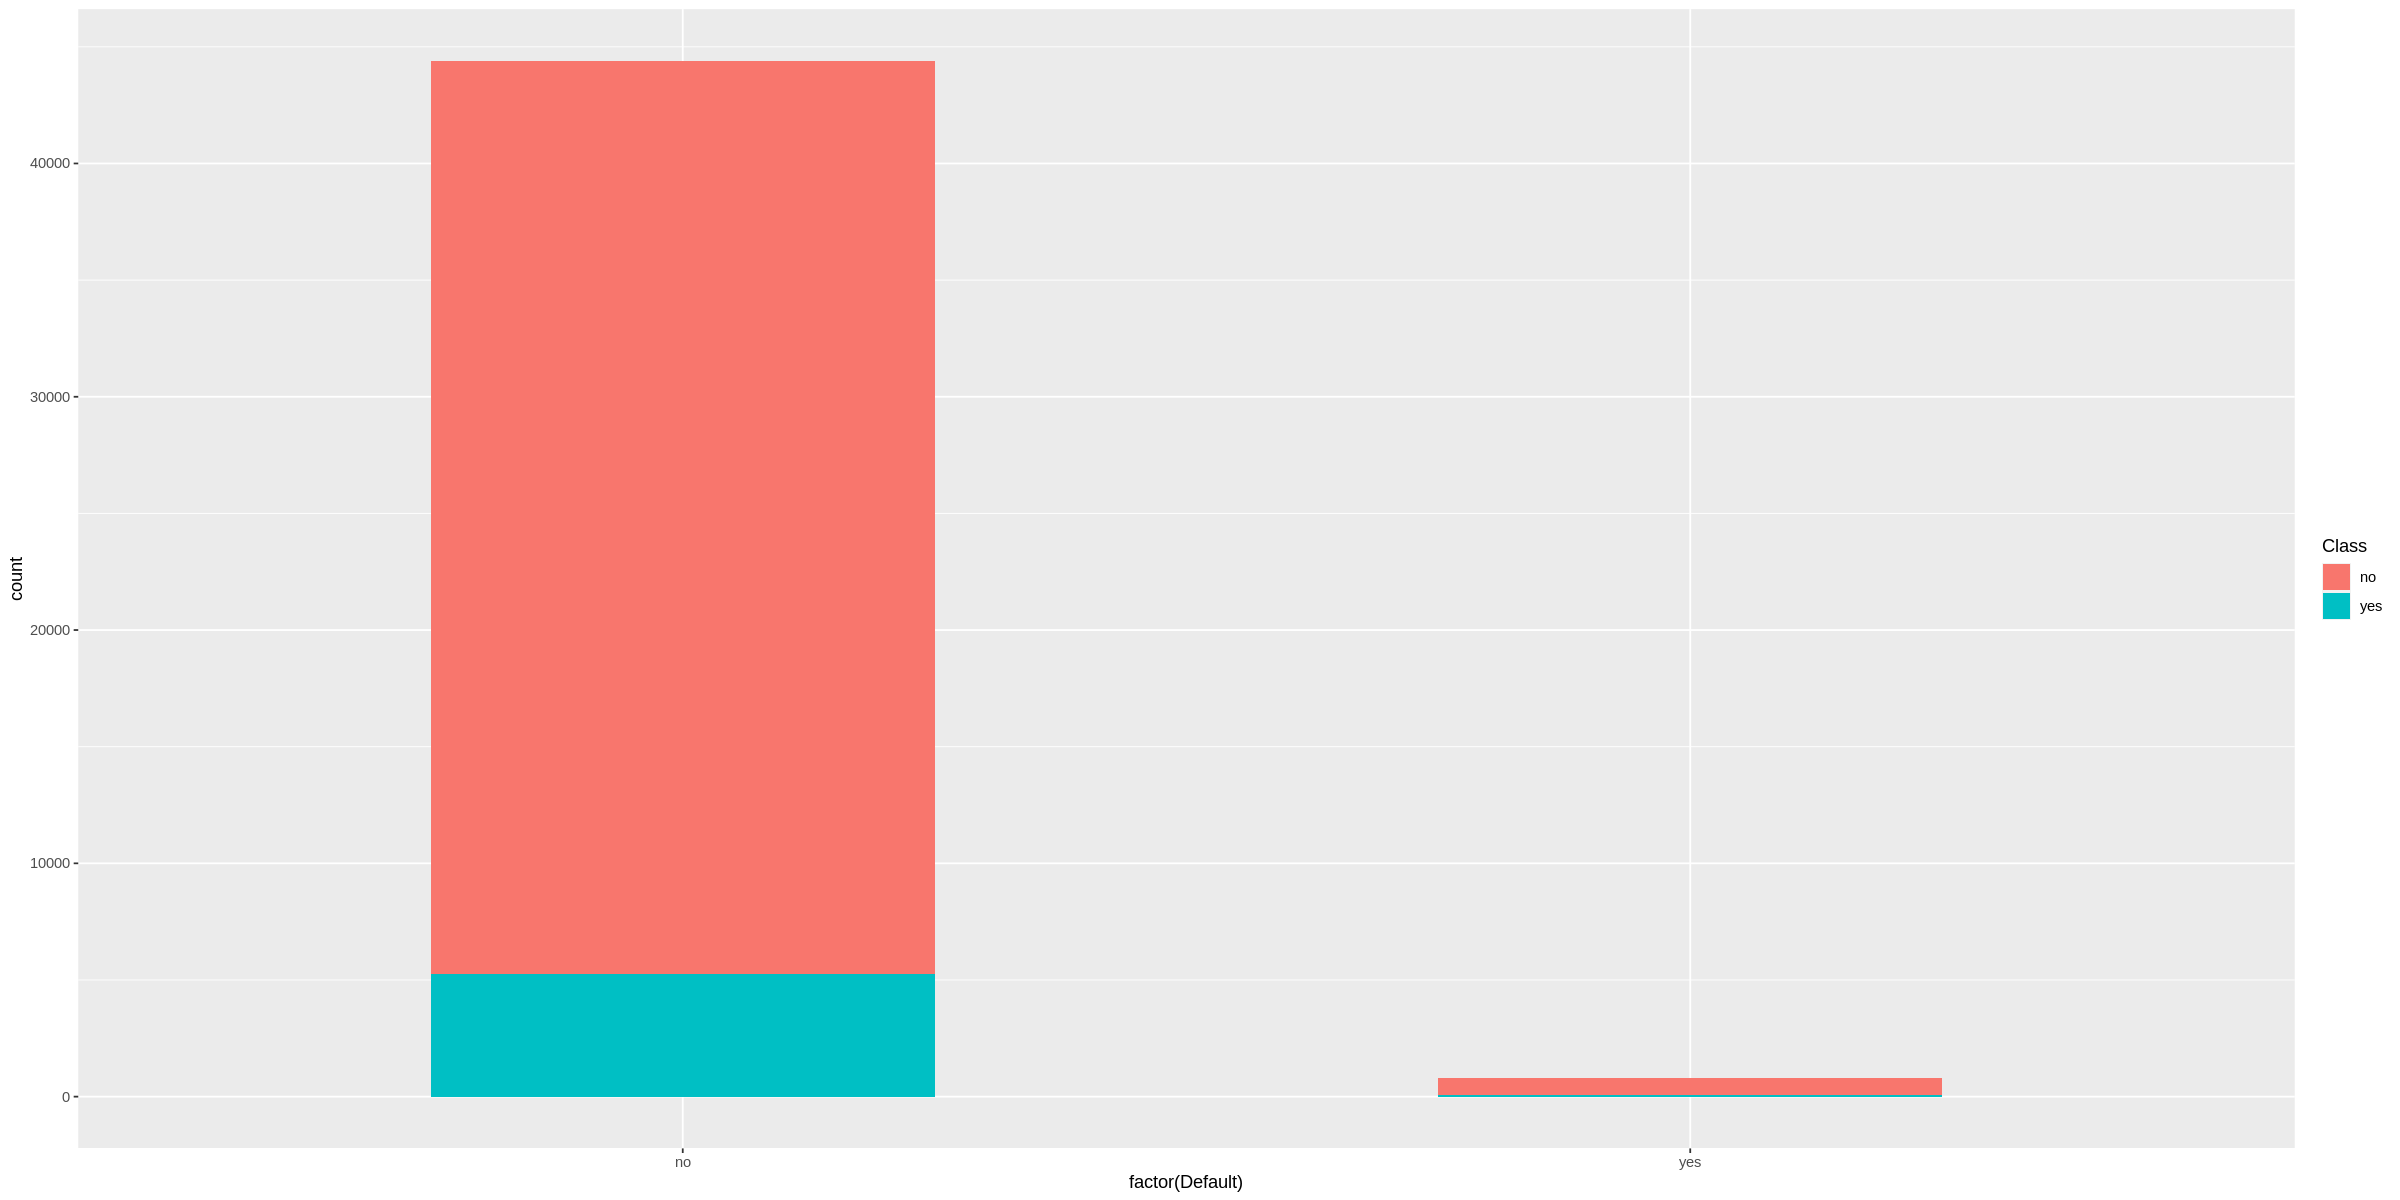

In [ ]:
#Default Bar Chart
ggplot(marketing,aes(x=factor(Default),fill= Class))+geom_bar(width = 0.5)

It seems that majority of individuals targeted by bank did not default and the proportion of those that did not default who subscribed to a term deposit is higher than those that default which makes sense since defaulters do not have much spare capital to use

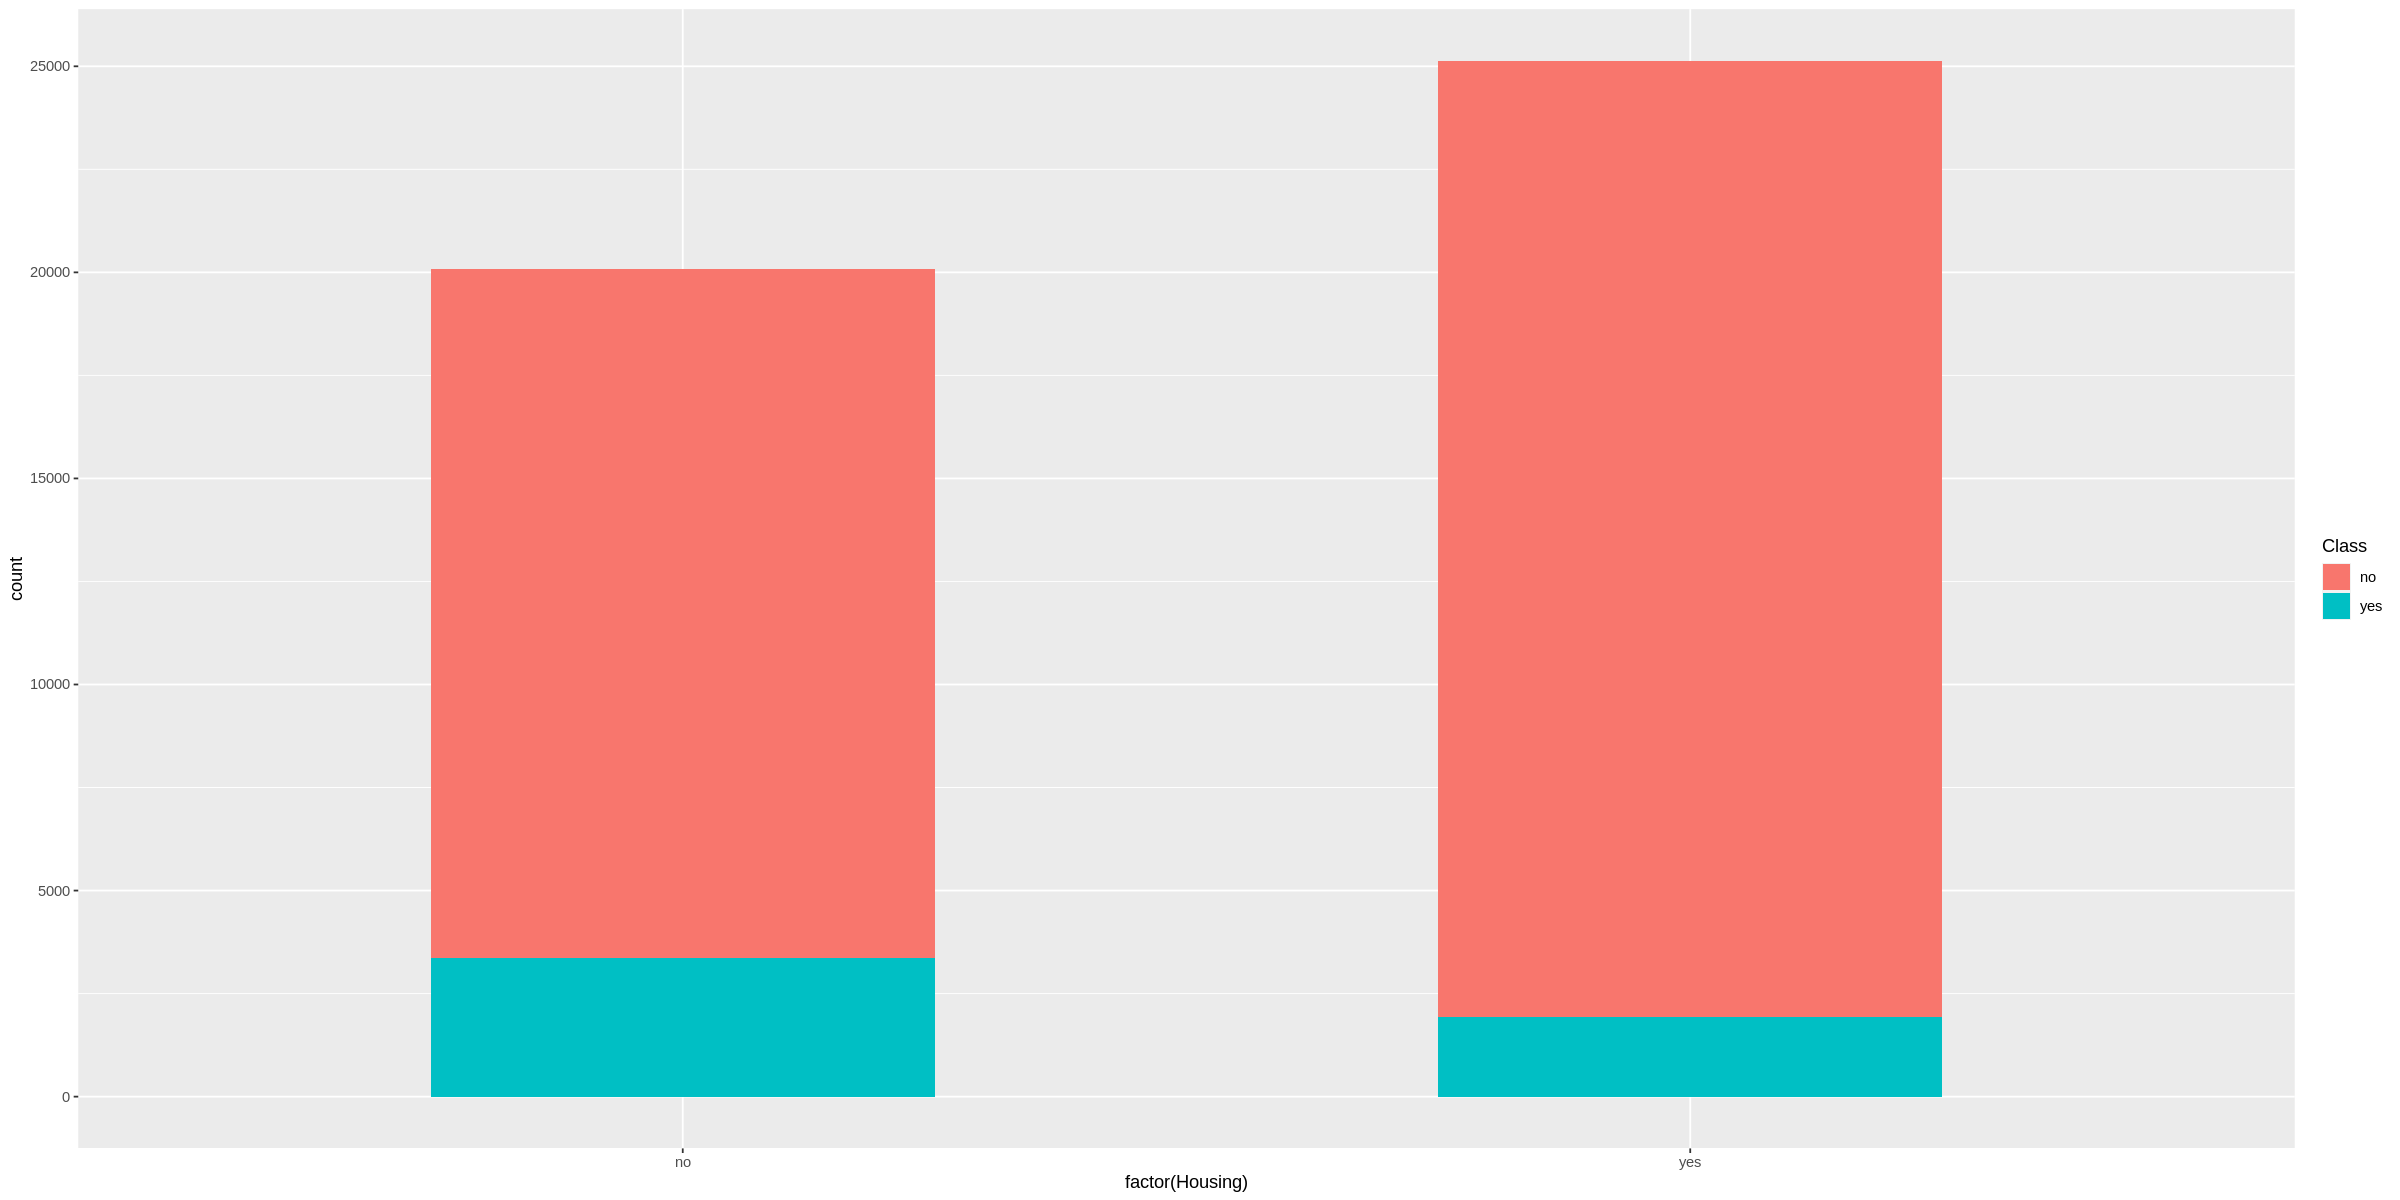

In [ ]:
#Housing Bar Chart
ggplot(marketing,aes(x=factor(Housing),fill= Class))+geom_bar(width = 0.5)

Majority of individuals targeted by bank do have a housing loan and the proportion of those that did subscribe to the term deposit is lower than that without housing loan may be due to those without housing loan having extra capital to spare


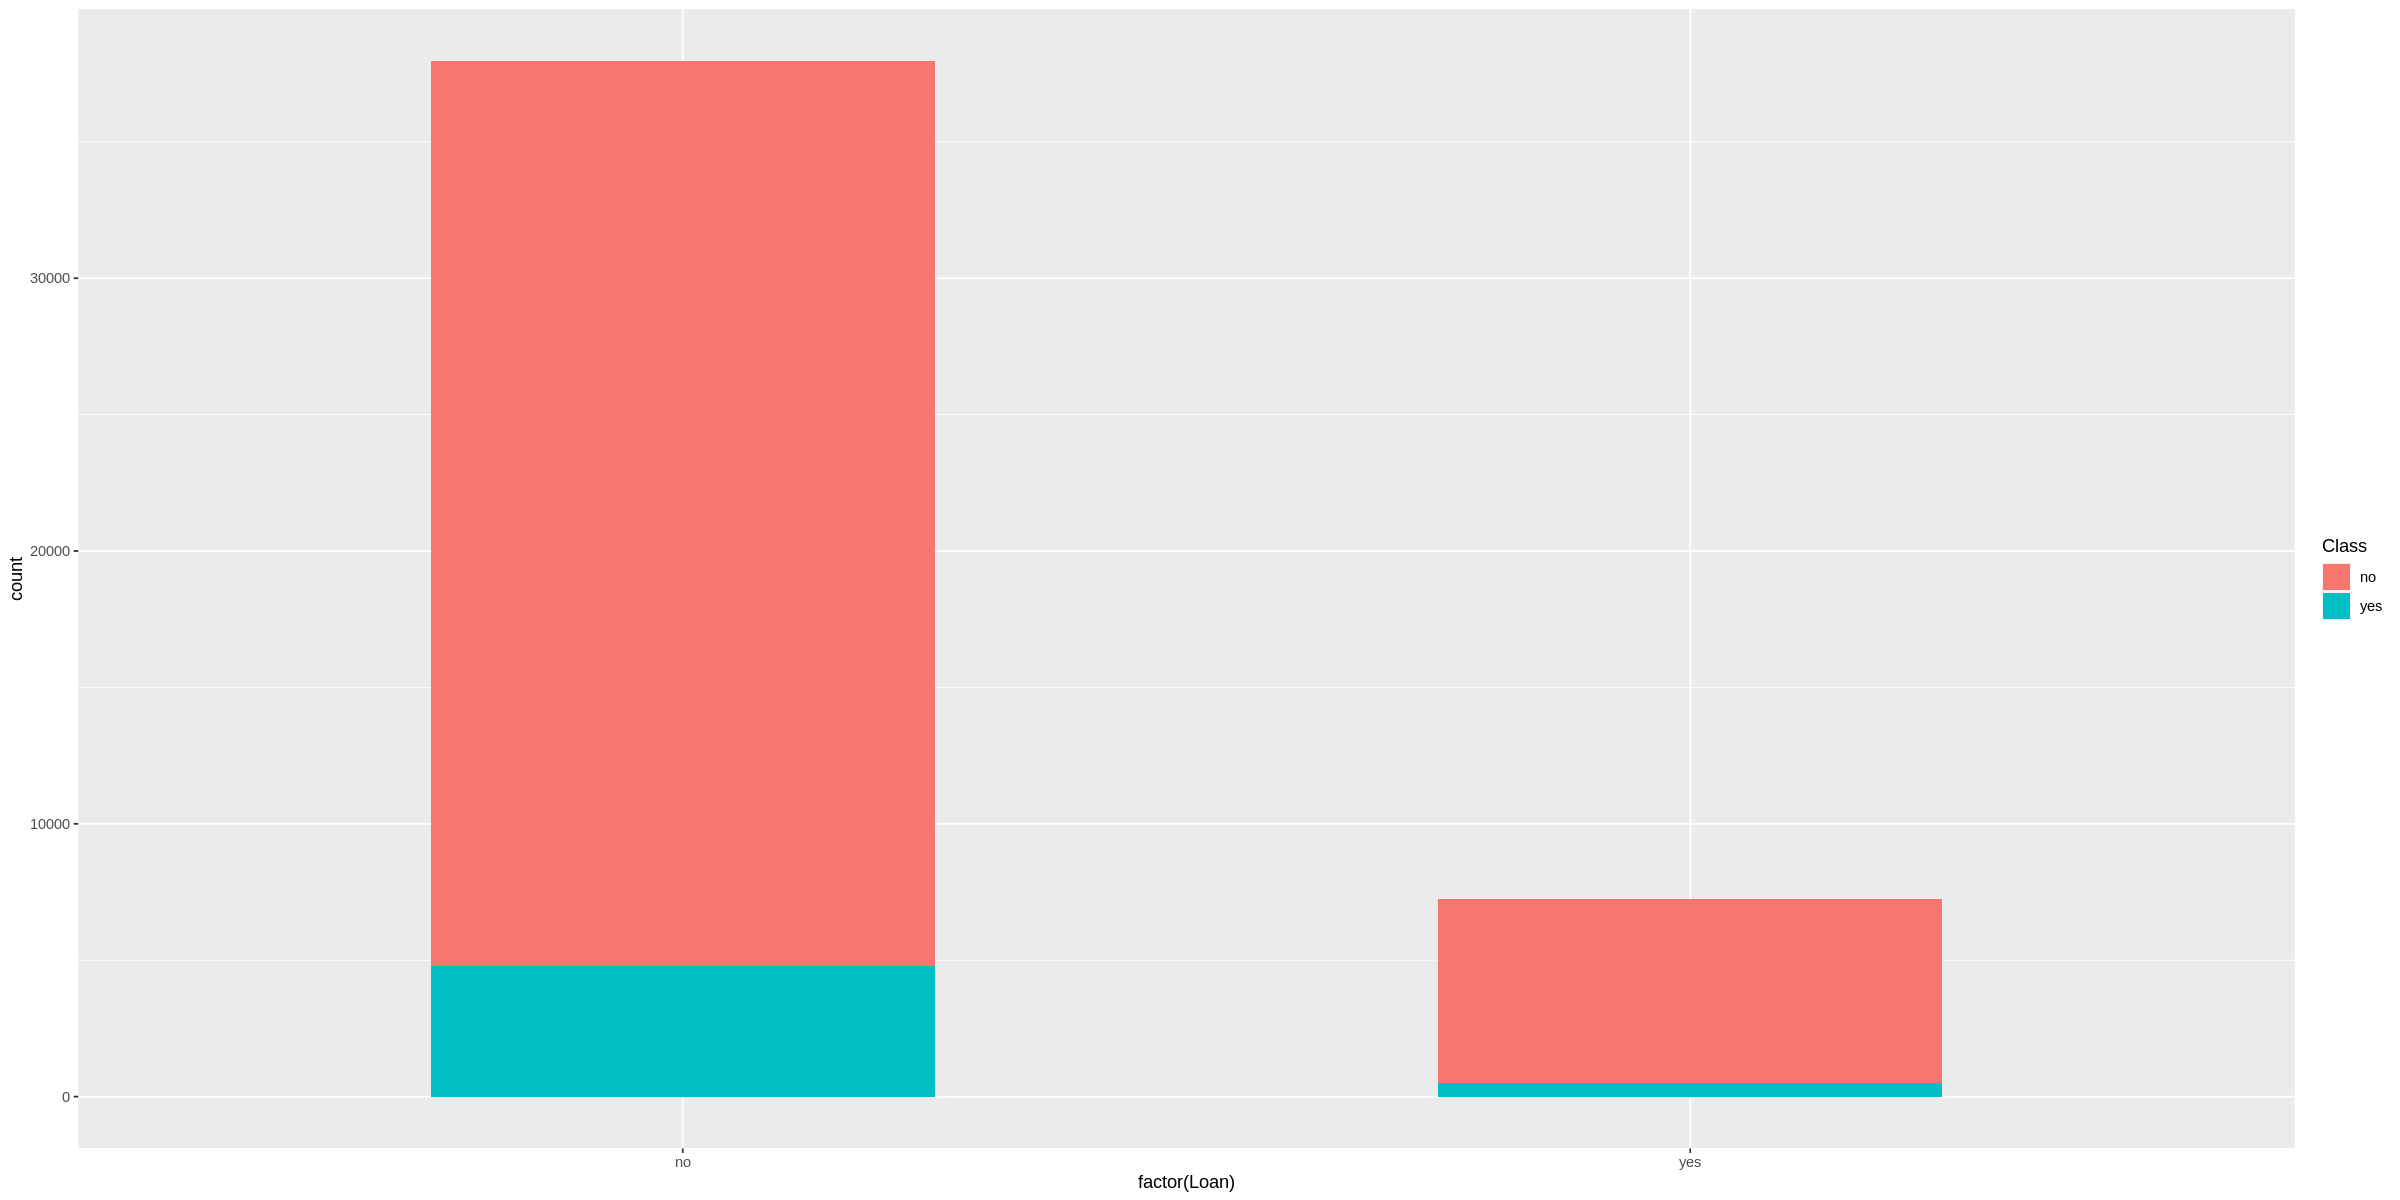

In [ ]:
#Loan Vizualization 
ggplot(marketing,aes(x=factor(Loan),fill= Class))+geom_bar(width = 0.5)


*   As ilastrated by the barplot majority of people does not have a personal loan 
   



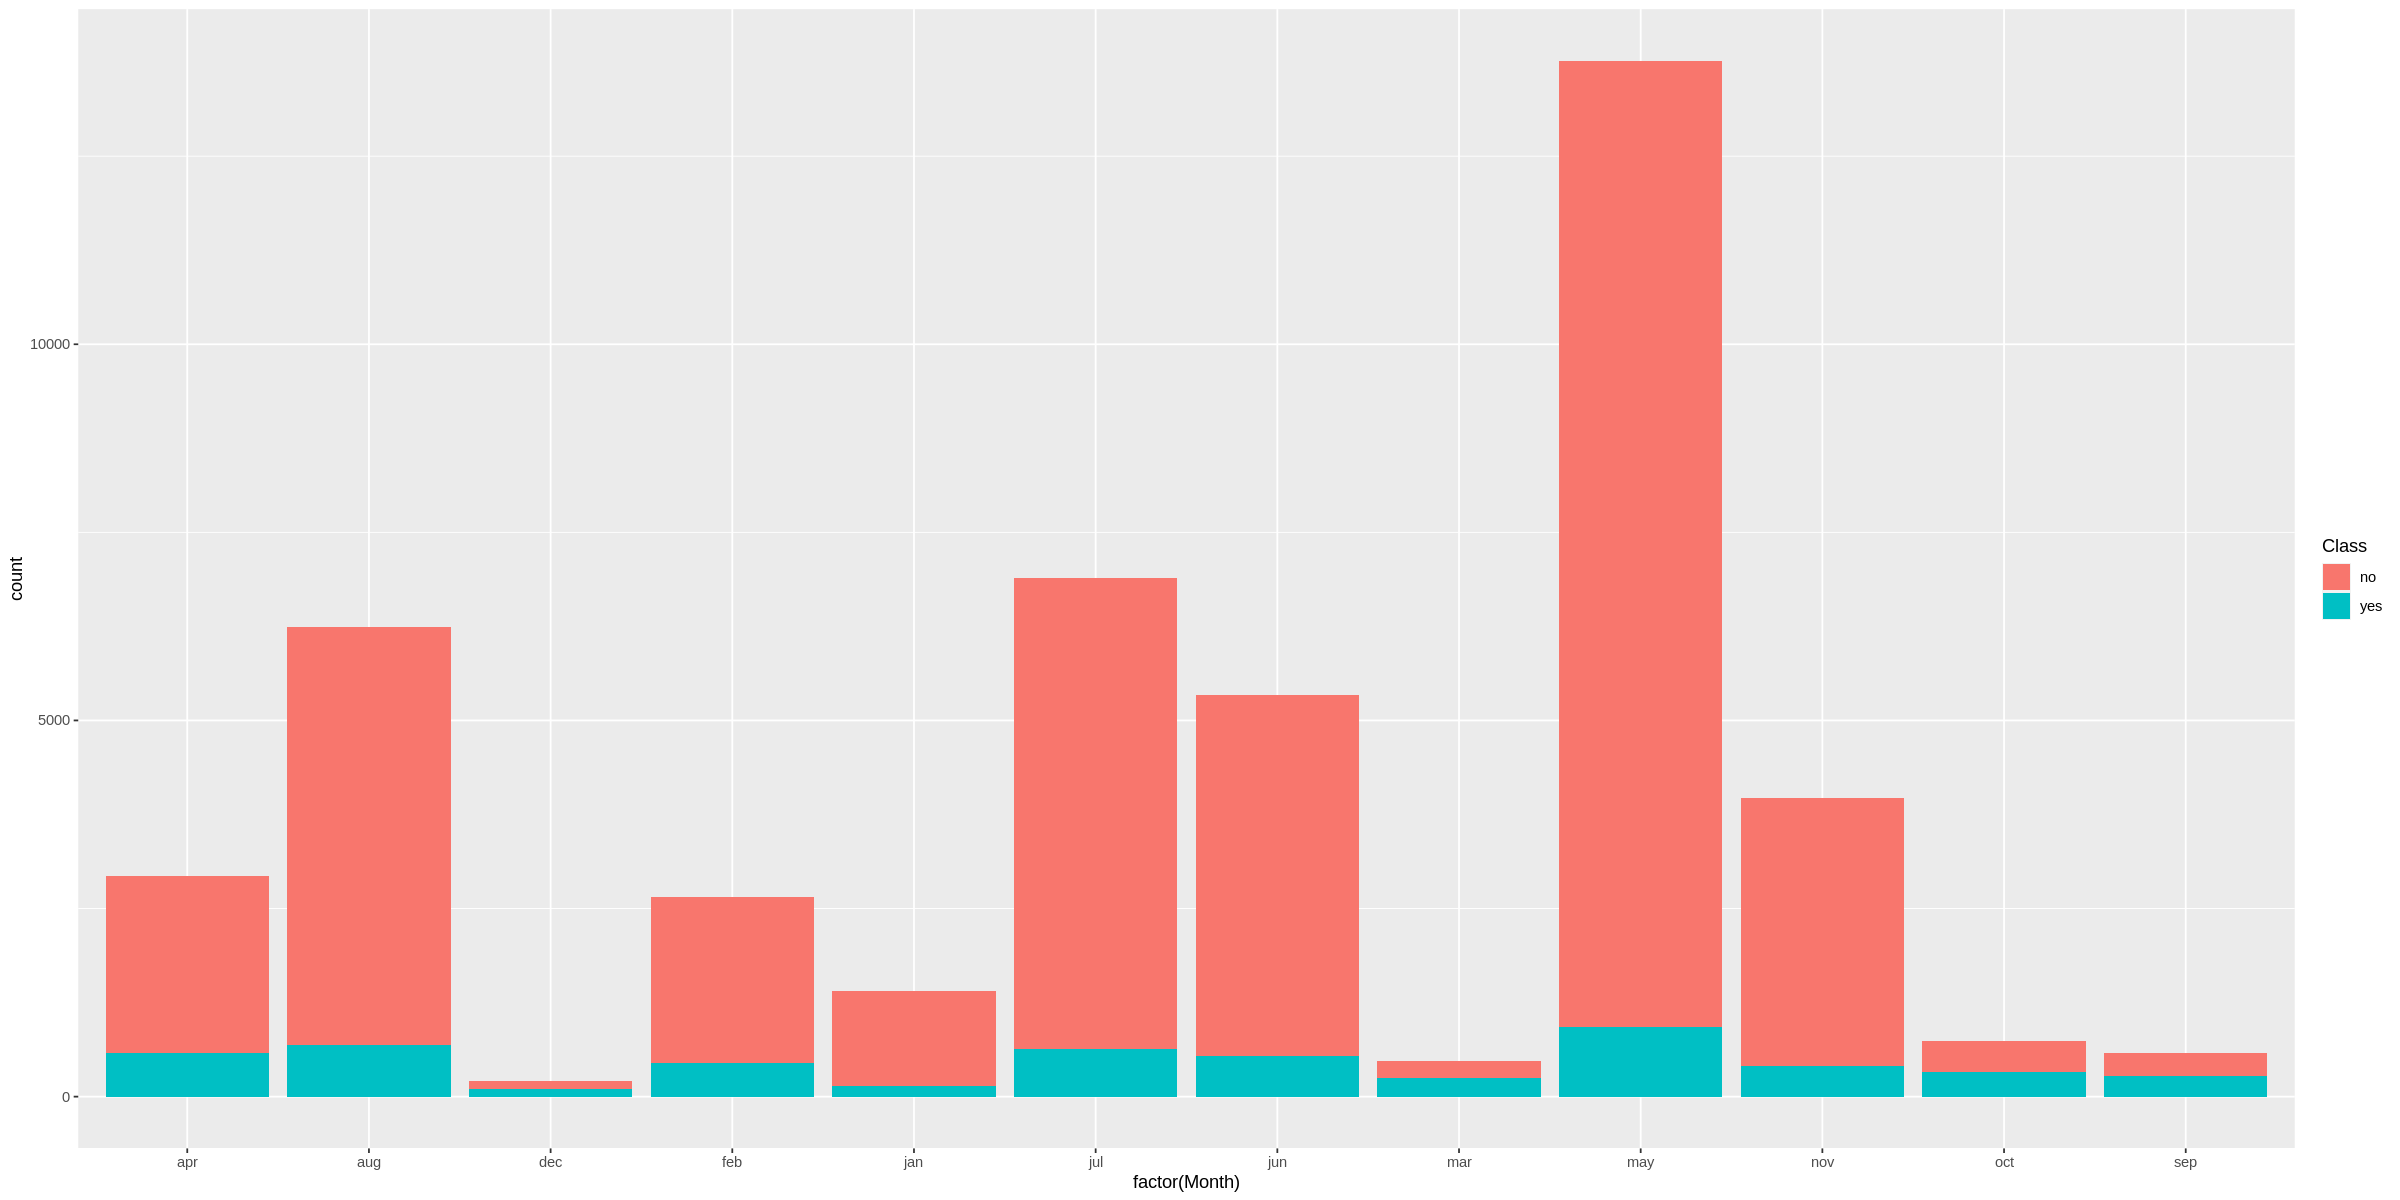

In [ ]:
#Month Attribute Vizualization
options(repr.plot.width = 20, repr.plot.height =10)
ggplot(marketing, aes(x = factor(Month), fill=Class)) +
    geom_bar()


*   The Month of may has the highest number of contacts in the last year 
*   As opposed to Month of December having the least number of contact frequency last year



log = y is used to give more clear chart insights. We can see data spread distribution for number of contacts actually mostly between 1 to 3 contacts, with many outliers.

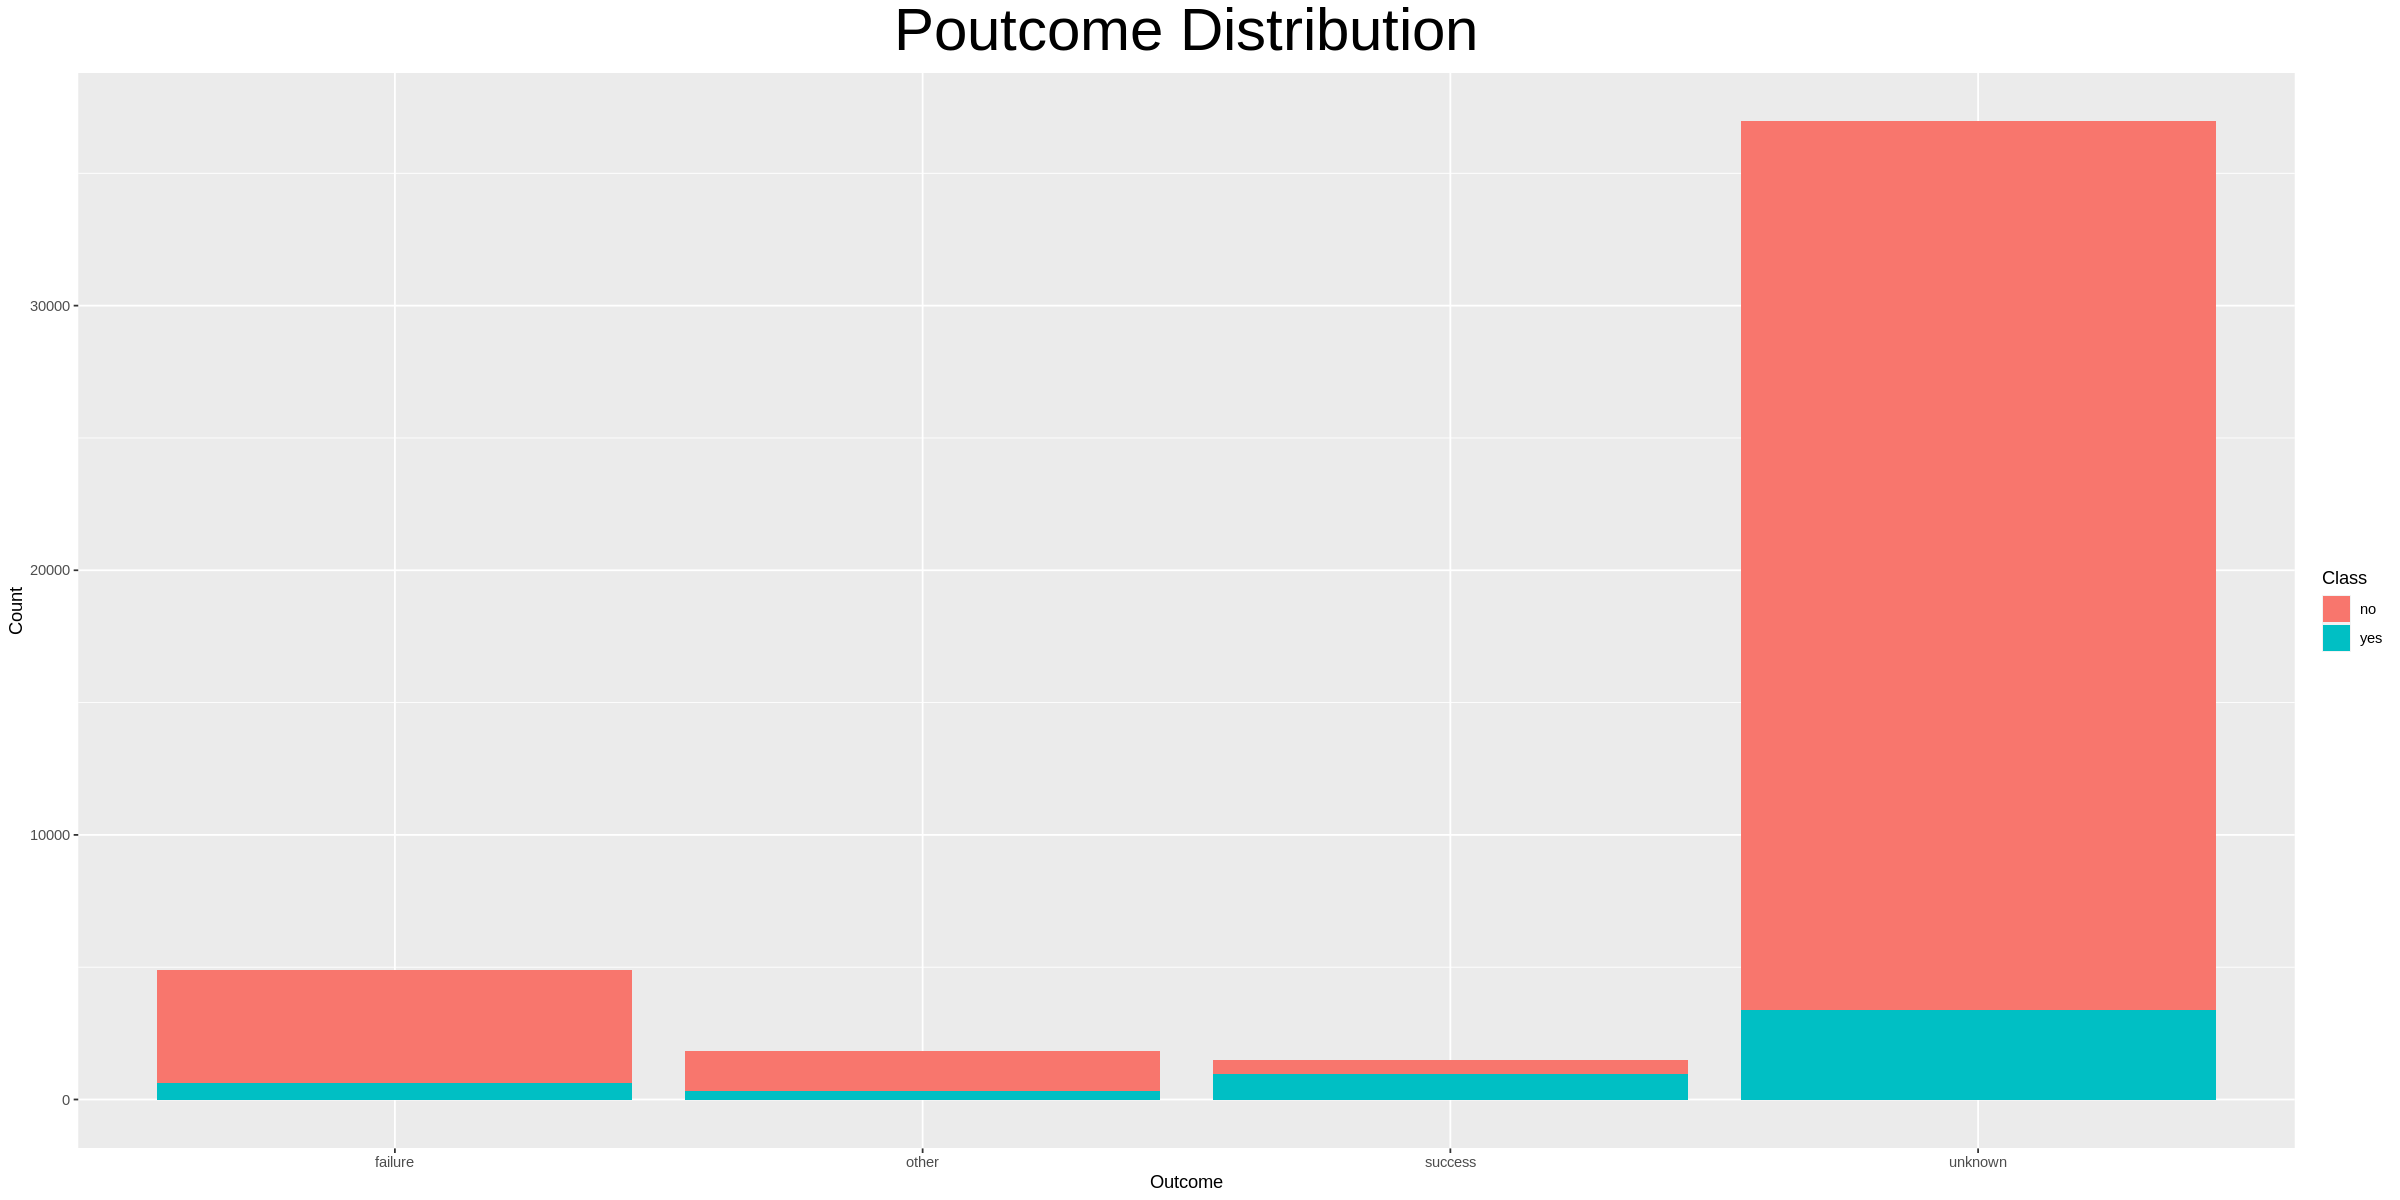

In [ ]:
#Poutcom Visualization
options(repr.plot.width = 20, repr.plot.height =10)
ggplot(marketing, aes(x = factor(Poutcome), fill=Class)) +
    geom_bar() + labs(title = "Poutcome Distribution", x = "Outcome", y = "Count") + theme(plot.title = element_text(hjust = 0.5, size = 36))

A lot of the marketing outcome actually has unknown results. So based on the first screening, it would be likely that Poutcome does not give clear insight on target variable.

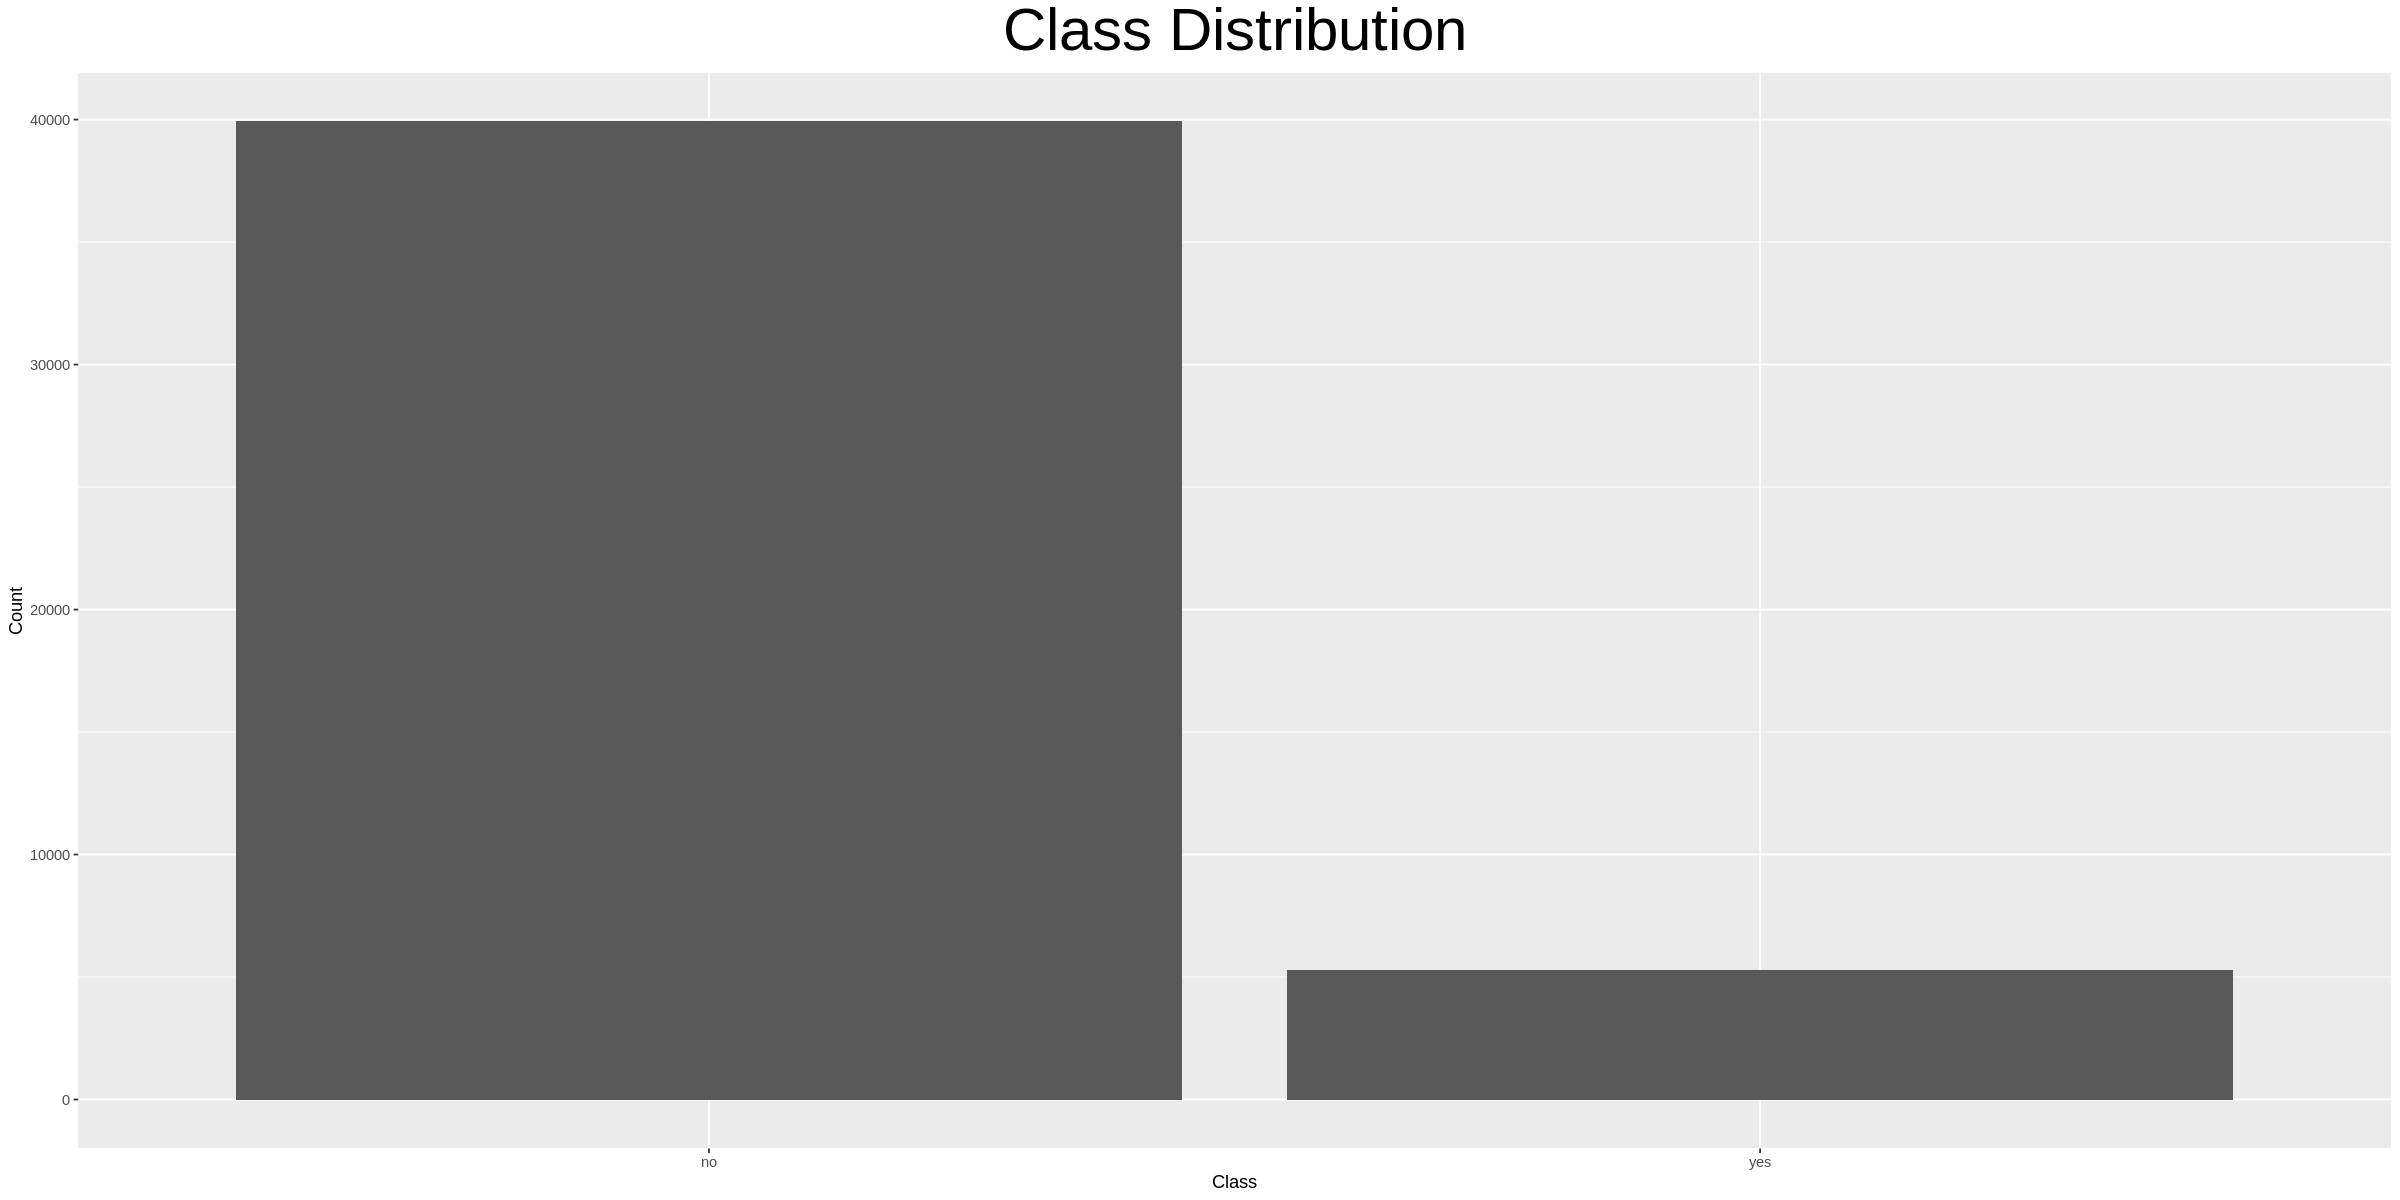

In [ ]:
#Class Visualisation
options(repr.plot.width = 20, repr.plot.height =10)
ggplot(marketing, aes(x = factor(Class))) +
    geom_bar() + labs(title = "Class Distribution", x = "Class", y = "Count") + theme(plot.title = element_text(hjust = 0.5, size = 36))

Thus, we can see that the target variable is imbalanced.

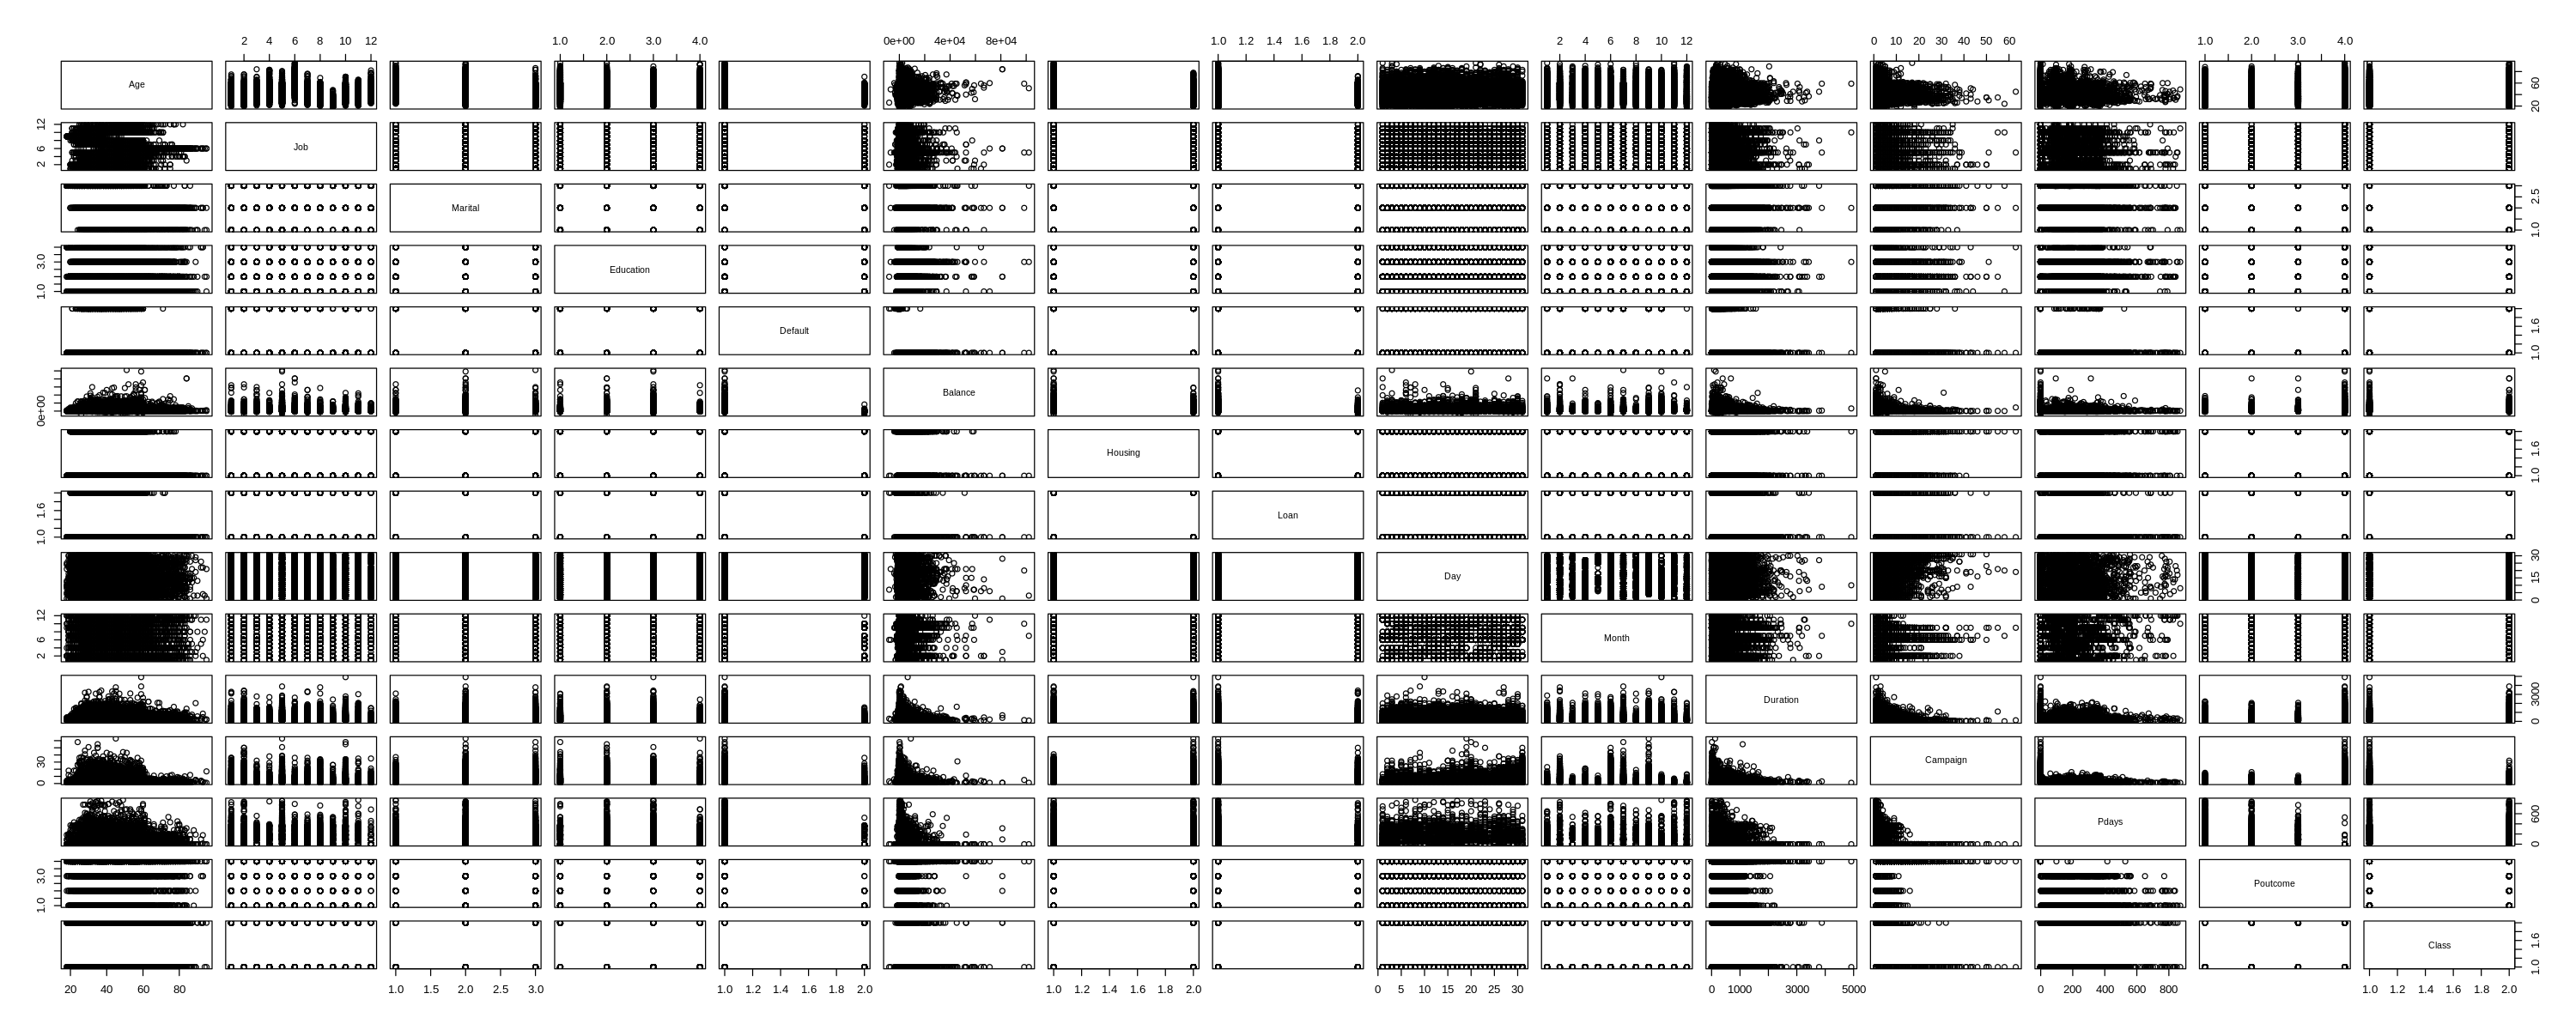

In [ ]:
#take a long time to run
#to check corrrelation
pairs(marketing)

In [ ]:
#Creating Dummy Data Variables
marketing1= dummy.data.frame(marketing, names=c("Job","Marital","Education","Default","Housing","Loan","Month","Poutcome"),sep="_")

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts ar

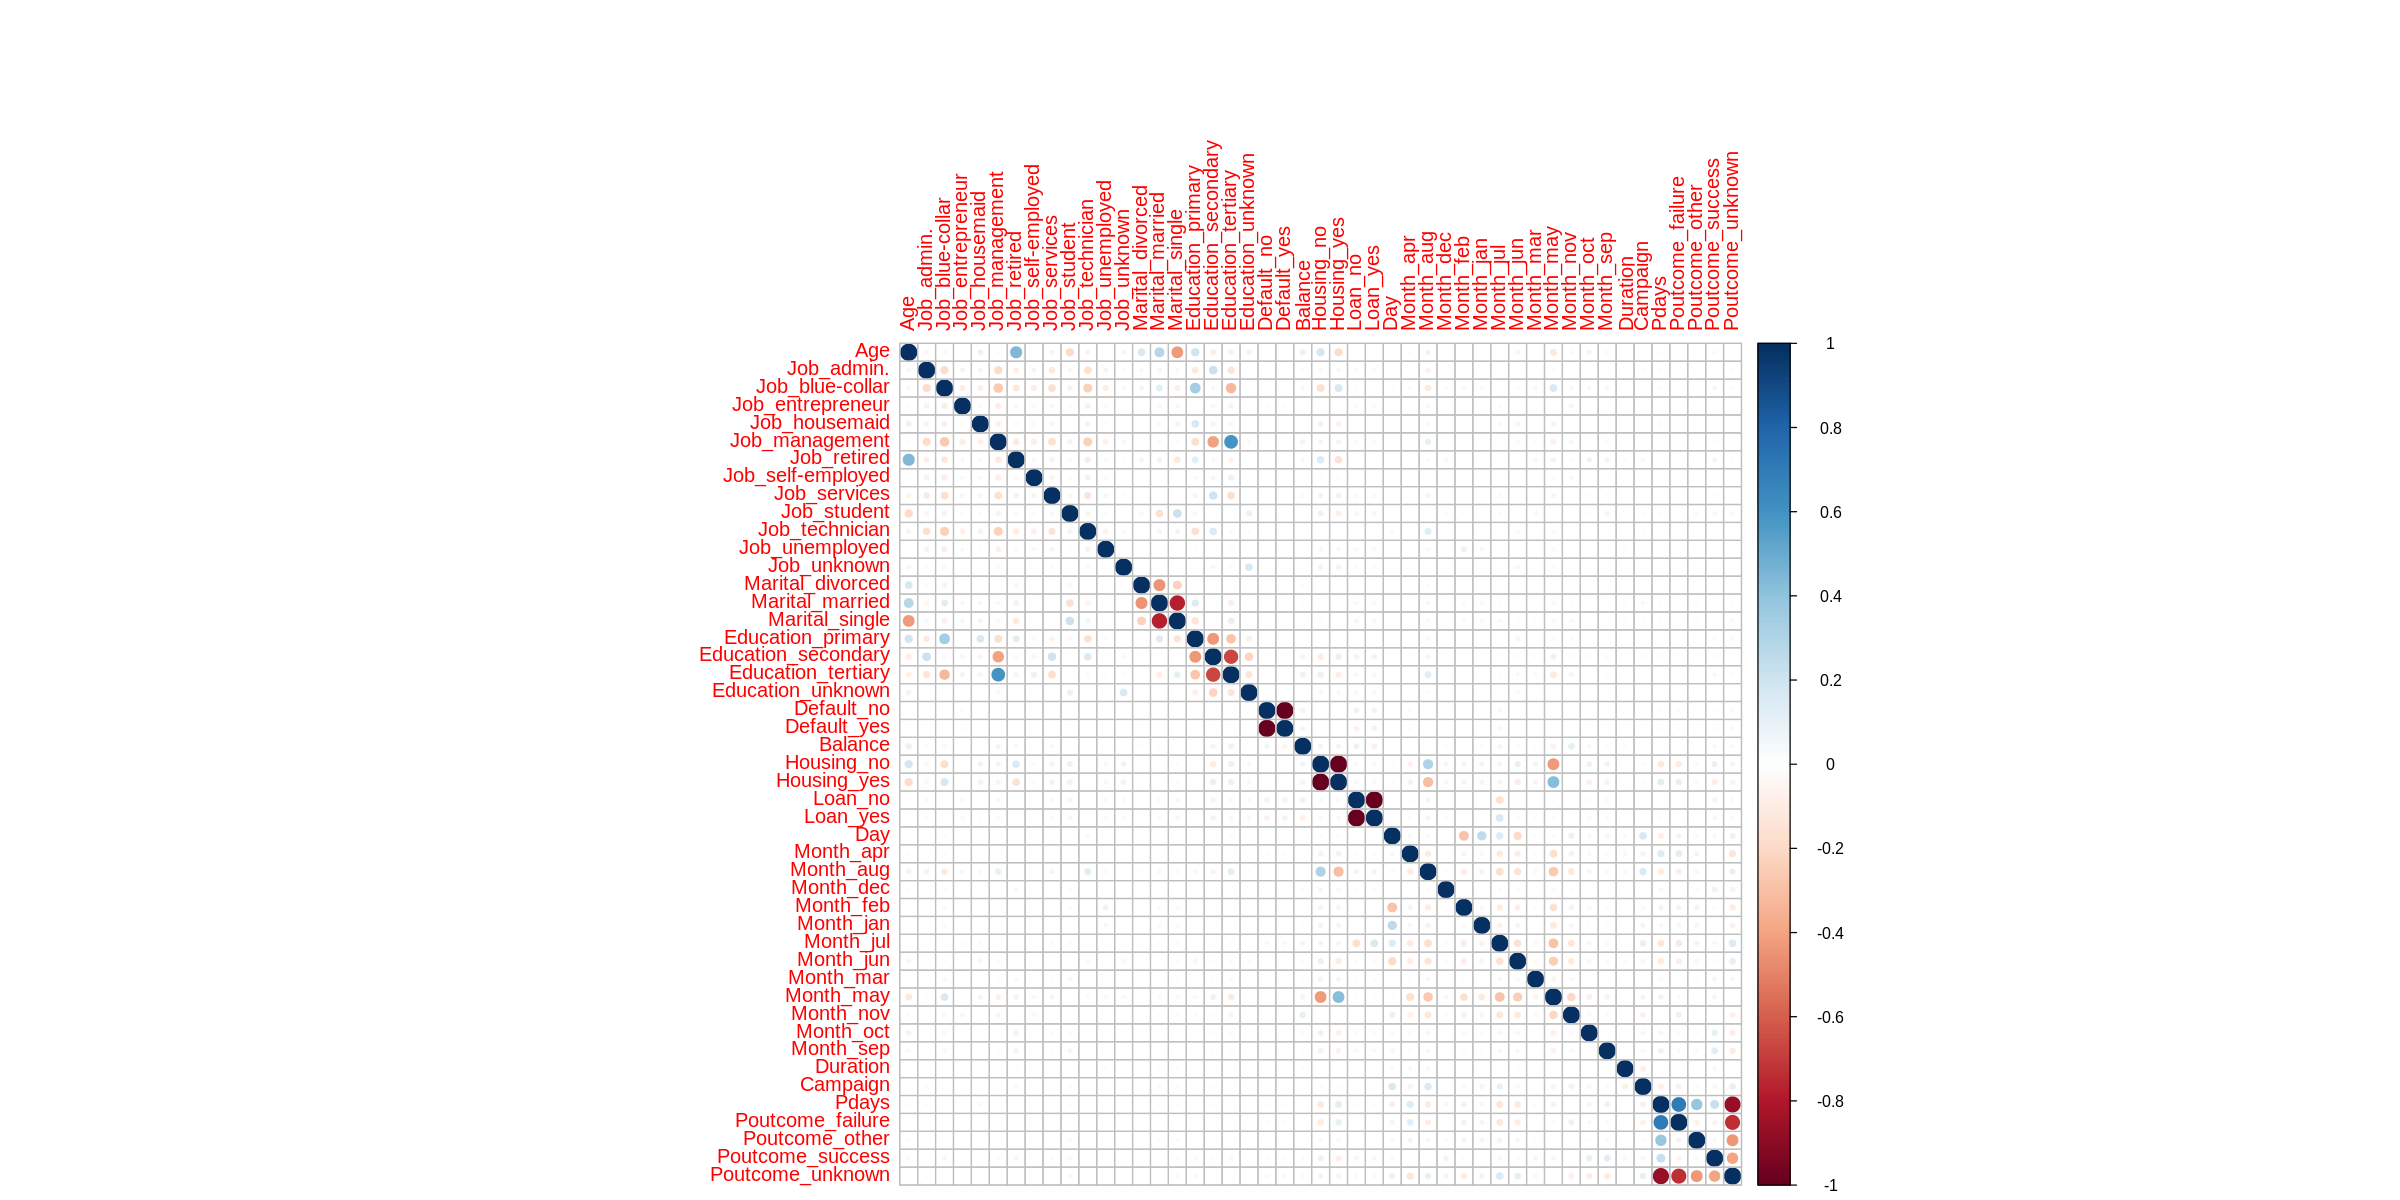

In [ ]:
#correlation Matrix
correlations = cor(marketing1[,1:47])
corrplot(correlations,method="circle")

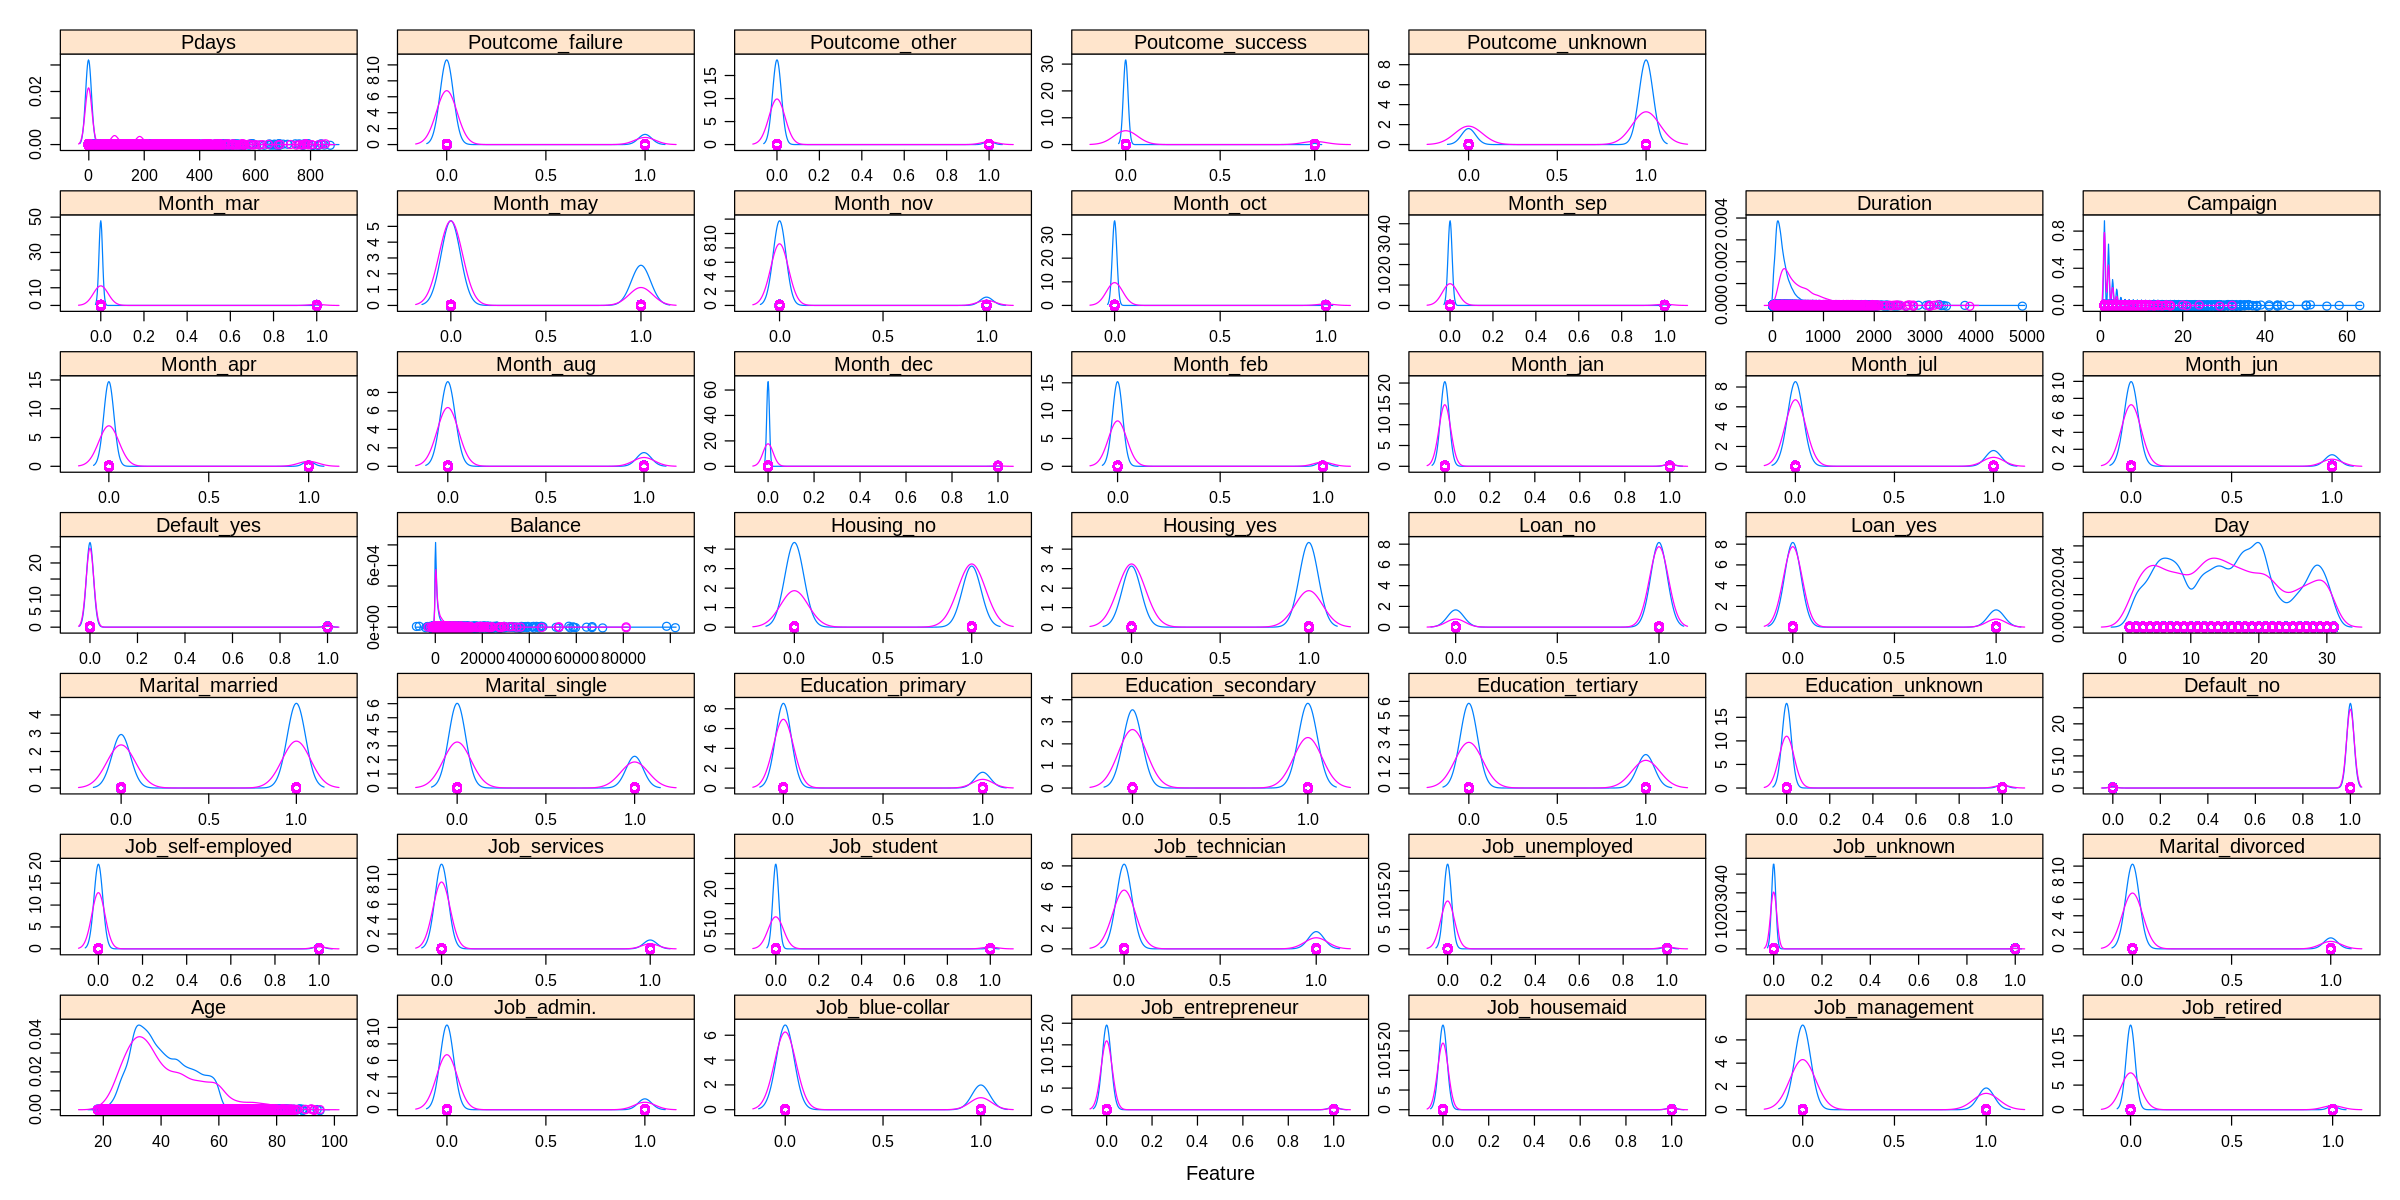

In [ ]:
# Density distribution of each variable broken down by Class value
x = marketing1[,1:47]
y = marketing1[,48]
scales = list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density",scales=scales)

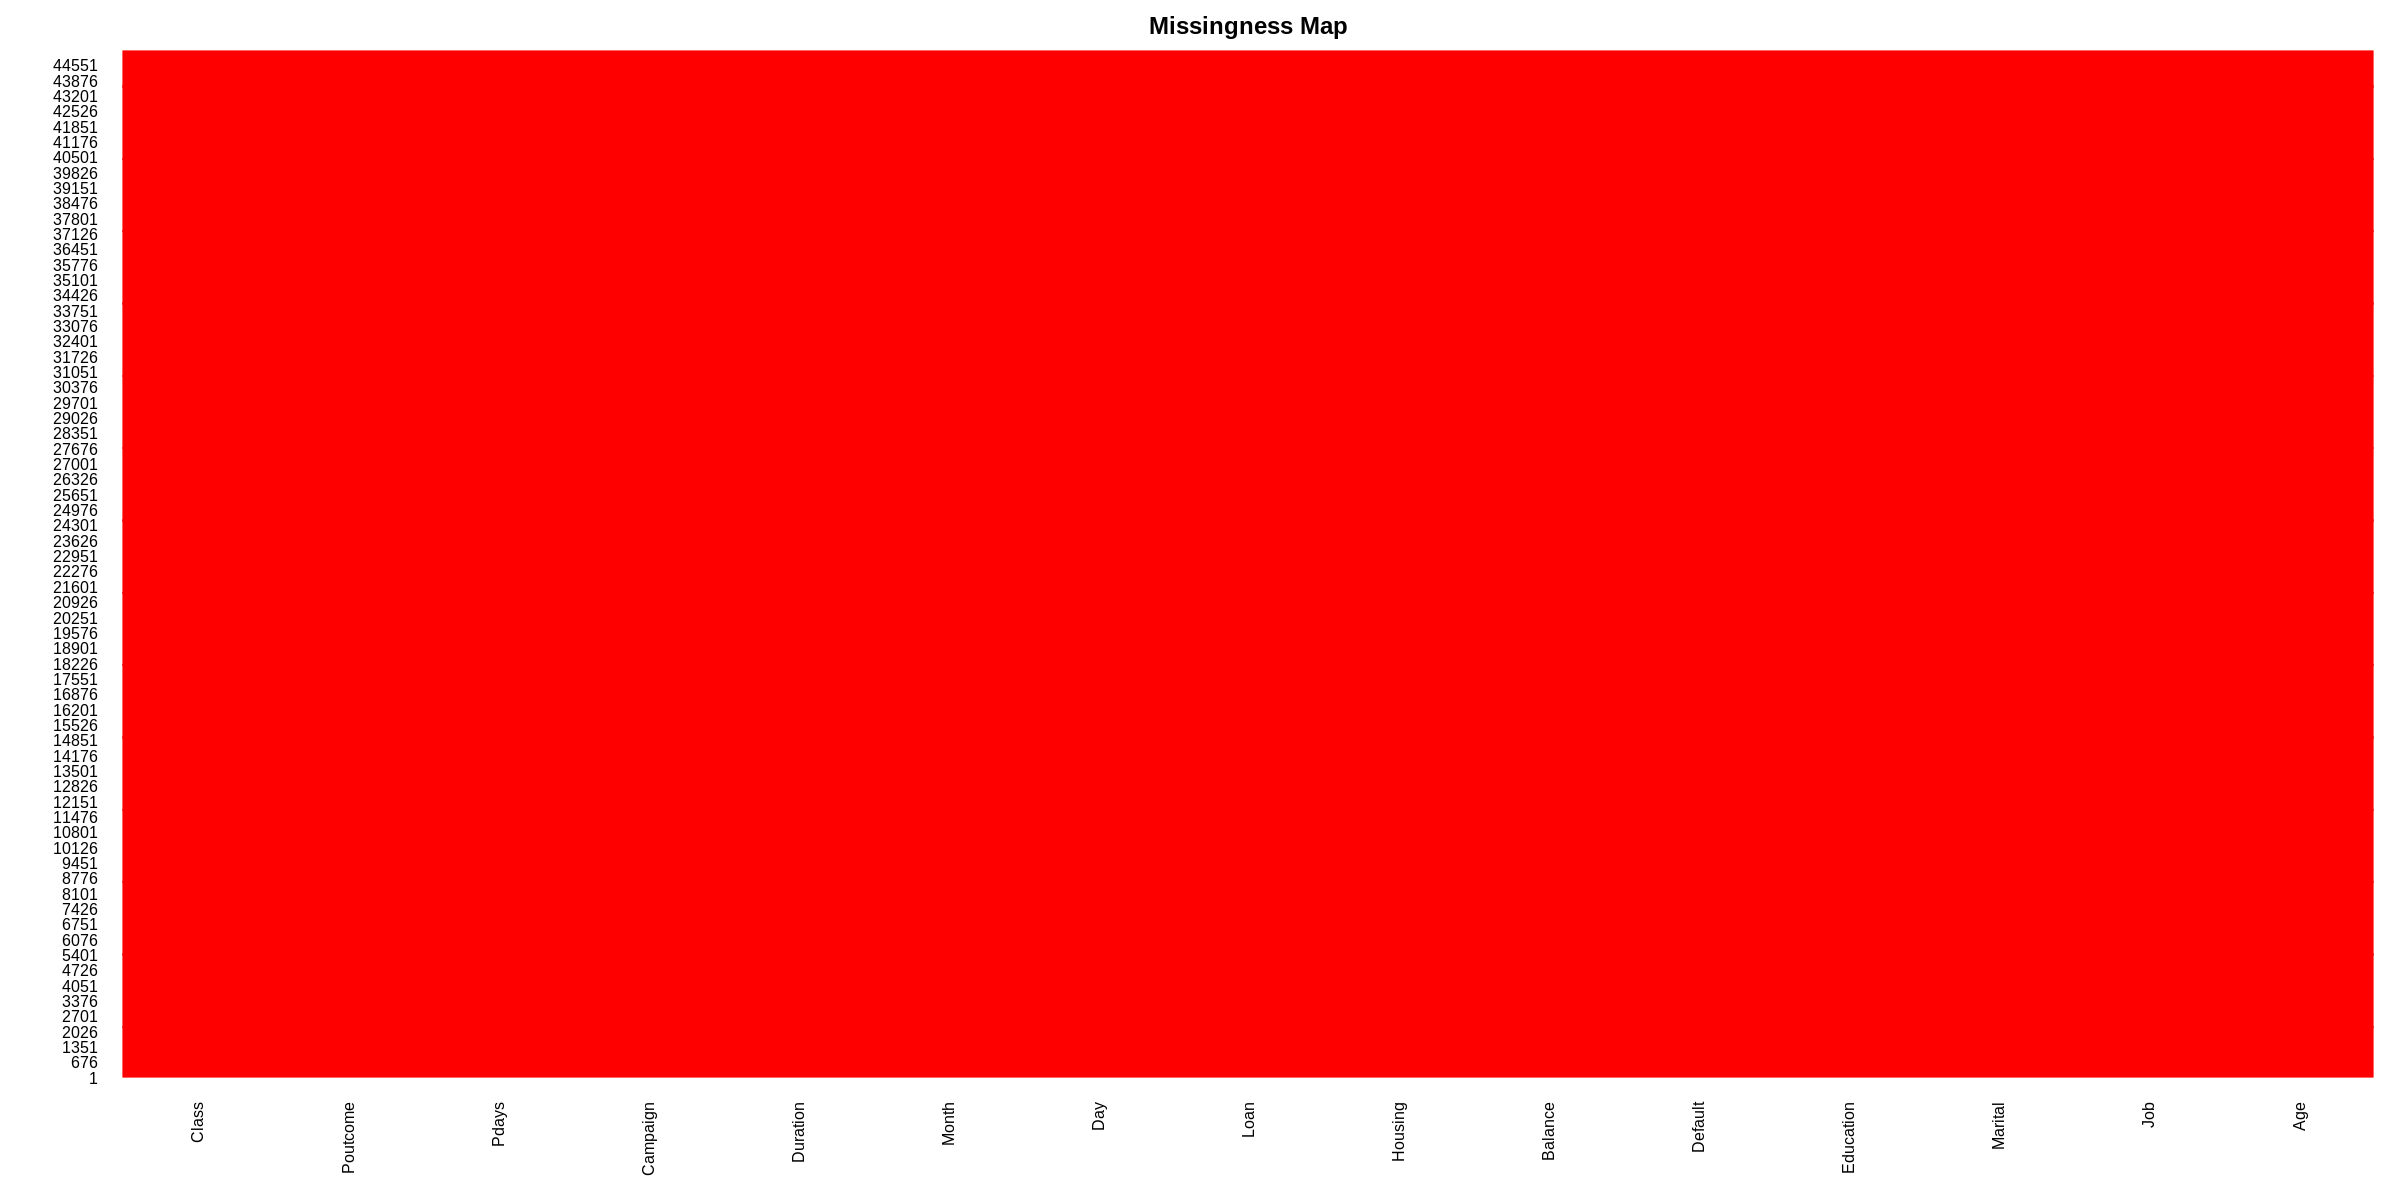

In [ ]:
#Missing plot to get a quick idea of the amount of missing data
missmap(marketing, col=c("blue", "red"), legend=FALSE)

# No missing data in this dataset


There are no missing values.

#Classification Models

###Train and Test Split

In [ ]:
#Data Partition  - Mareza(2020)
set.seed(1) #allow data replication
split = sample.split(marketing$Class,SplitRatio = 0.70) #split data into 70% Training Set and 30% Test Set
training_set = subset(marketing, split == TRUE)
test_set = subset(marketing, split == FALSE)

In [ ]:
#Class Distributition
prop.table(table(marketing$Class))


       no       yes 
0.8830152 0.1169848 

###GLM Classifiers

GLM Classification MODEL with all Variables



In [ ]:
#Building GLM Model
glm.fit <- glm(Class ~ ., data= training_set, family="binomial",)

In [ ]:
#Using GLM Model to predict Test Set
glm.probs=predict(glm.fit, newdata=test_set[-15],type="response")

In [ ]:
#Testing Threshold in which probabilites greater  than glm probs is assigned yes
#Threshold at 0.7
glm.pred0=as.factor(ifelse(glm.probs >0.7,"yes","no"))
confusionMatrix(glm.pred0, test_set$Class, positive = "yes") #Confusion Matrix to determine accuracy and get prediction tables

Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  11827  1252
       yes   150   335
                                          
               Accuracy : 0.8966          
                 95% CI : (0.8914, 0.9017)
    No Information Rate : 0.883           
    P-Value [Acc > NIR] : 2.686e-07       
                                          
                  Kappa : 0.2841          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.21109         
            Specificity : 0.98748         
         Pos Pred Value : 0.69072         
         Neg Pred Value : 0.90427         
             Prevalence : 0.11700         
         Detection Rate : 0.02470         
   Detection Prevalence : 0.03576         
      Balanced Accuracy : 0.59928         
                                          
       'Positive' Class : yes             
                  

In [ ]:
#Threshold at 0.5
glm.pred1=as.factor(ifelse(glm.probs >0.5,"yes","no"))
confusionMatrix(glm.pred1, test_set$Class, positive = "yes")

Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  11682  1053
       yes   295   534
                                          
               Accuracy : 0.9006          
                 95% CI : (0.8955, 0.9056)
    No Information Rate : 0.883           
    P-Value [Acc > NIR] : 3.61e-11        
                                          
                  Kappa : 0.3933          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.33648         
            Specificity : 0.97537         
         Pos Pred Value : 0.64415         
         Neg Pred Value : 0.91731         
             Prevalence : 0.11700         
         Detection Rate : 0.03937         
   Detection Prevalence : 0.06112         
      Balanced Accuracy : 0.65593         
                                          
       'Positive' Class : yes             
                  

In [ ]:
#Threshold at 0.3
glm.pred2=as.factor(ifelse(glm.probs >0.3,"yes","no"))
confusionMatrix(glm.pred2, test_set$Class, positive = "yes")

Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  11368   765
       yes   609   822
                                          
               Accuracy : 0.8987          
                 95% CI : (0.8935, 0.9037)
    No Information Rate : 0.883           
    P-Value [Acc > NIR] : 3.520e-09       
                                          
                  Kappa : 0.4879          
                                          
 Mcnemar's Test P-Value : 2.895e-05       
                                          
            Sensitivity : 0.5180          
            Specificity : 0.9492          
         Pos Pred Value : 0.5744          
         Neg Pred Value : 0.9369          
             Prevalence : 0.1170          
         Detection Rate : 0.0606          
   Detection Prevalence : 0.1055          
      Balanced Accuracy : 0.7336          
                                          
       'Positive' Class : yes             
                  

In [ ]:
#Threshold at 0.2
glm.pred3=as.factor(ifelse(glm.probs >0.2,"yes","no"))
confusionMatrix(glm.pred3, test_set$Class, positive = "yes")


Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  10980   566
       yes   997  1021
                                          
               Accuracy : 0.8848          
                 95% CI : (0.8793, 0.8901)
    No Information Rate : 0.883           
    P-Value [Acc > NIR] : 0.2658          
                                          
                  Kappa : 0.5011          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.64335         
            Specificity : 0.91676         
         Pos Pred Value : 0.50595         
         Neg Pred Value : 0.95098         
             Prevalence : 0.11700         
         Detection Rate : 0.07527         
   Detection Prevalence : 0.14878         
      Balanced Accuracy : 0.78005         
                                          
       'Positive' Class : yes             
                  

In [ ]:
#Threshold at 0.1
glm.pred4=as.factor(ifelse(glm.probs >0.1,"yes","no"))
confusionMatrix(glm.pred4, test_set$Class, positive = "yes") 

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  9772  245
       yes 2205 1342
                                          
               Accuracy : 0.8194          
                 95% CI : (0.8128, 0.8258)
    No Information Rate : 0.883           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.4308          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.84562         
            Specificity : 0.81590         
         Pos Pred Value : 0.37835         
         Neg Pred Value : 0.97554         
             Prevalence : 0.11700         
         Detection Rate : 0.09894         
   Detection Prevalence : 0.26150         
      Balanced Accuracy : 0.83076         
                                          
       'Positive' Class : yes             
                        

Threshold at 0.5 Seems the best because it has the highest accuracy 


In [ ]:
#ROC AUC curves to see model performance
ROC=roc(test_set$Class,glm.probs)

Setting levels: control = no, case = yes

Setting direction: controls < cases



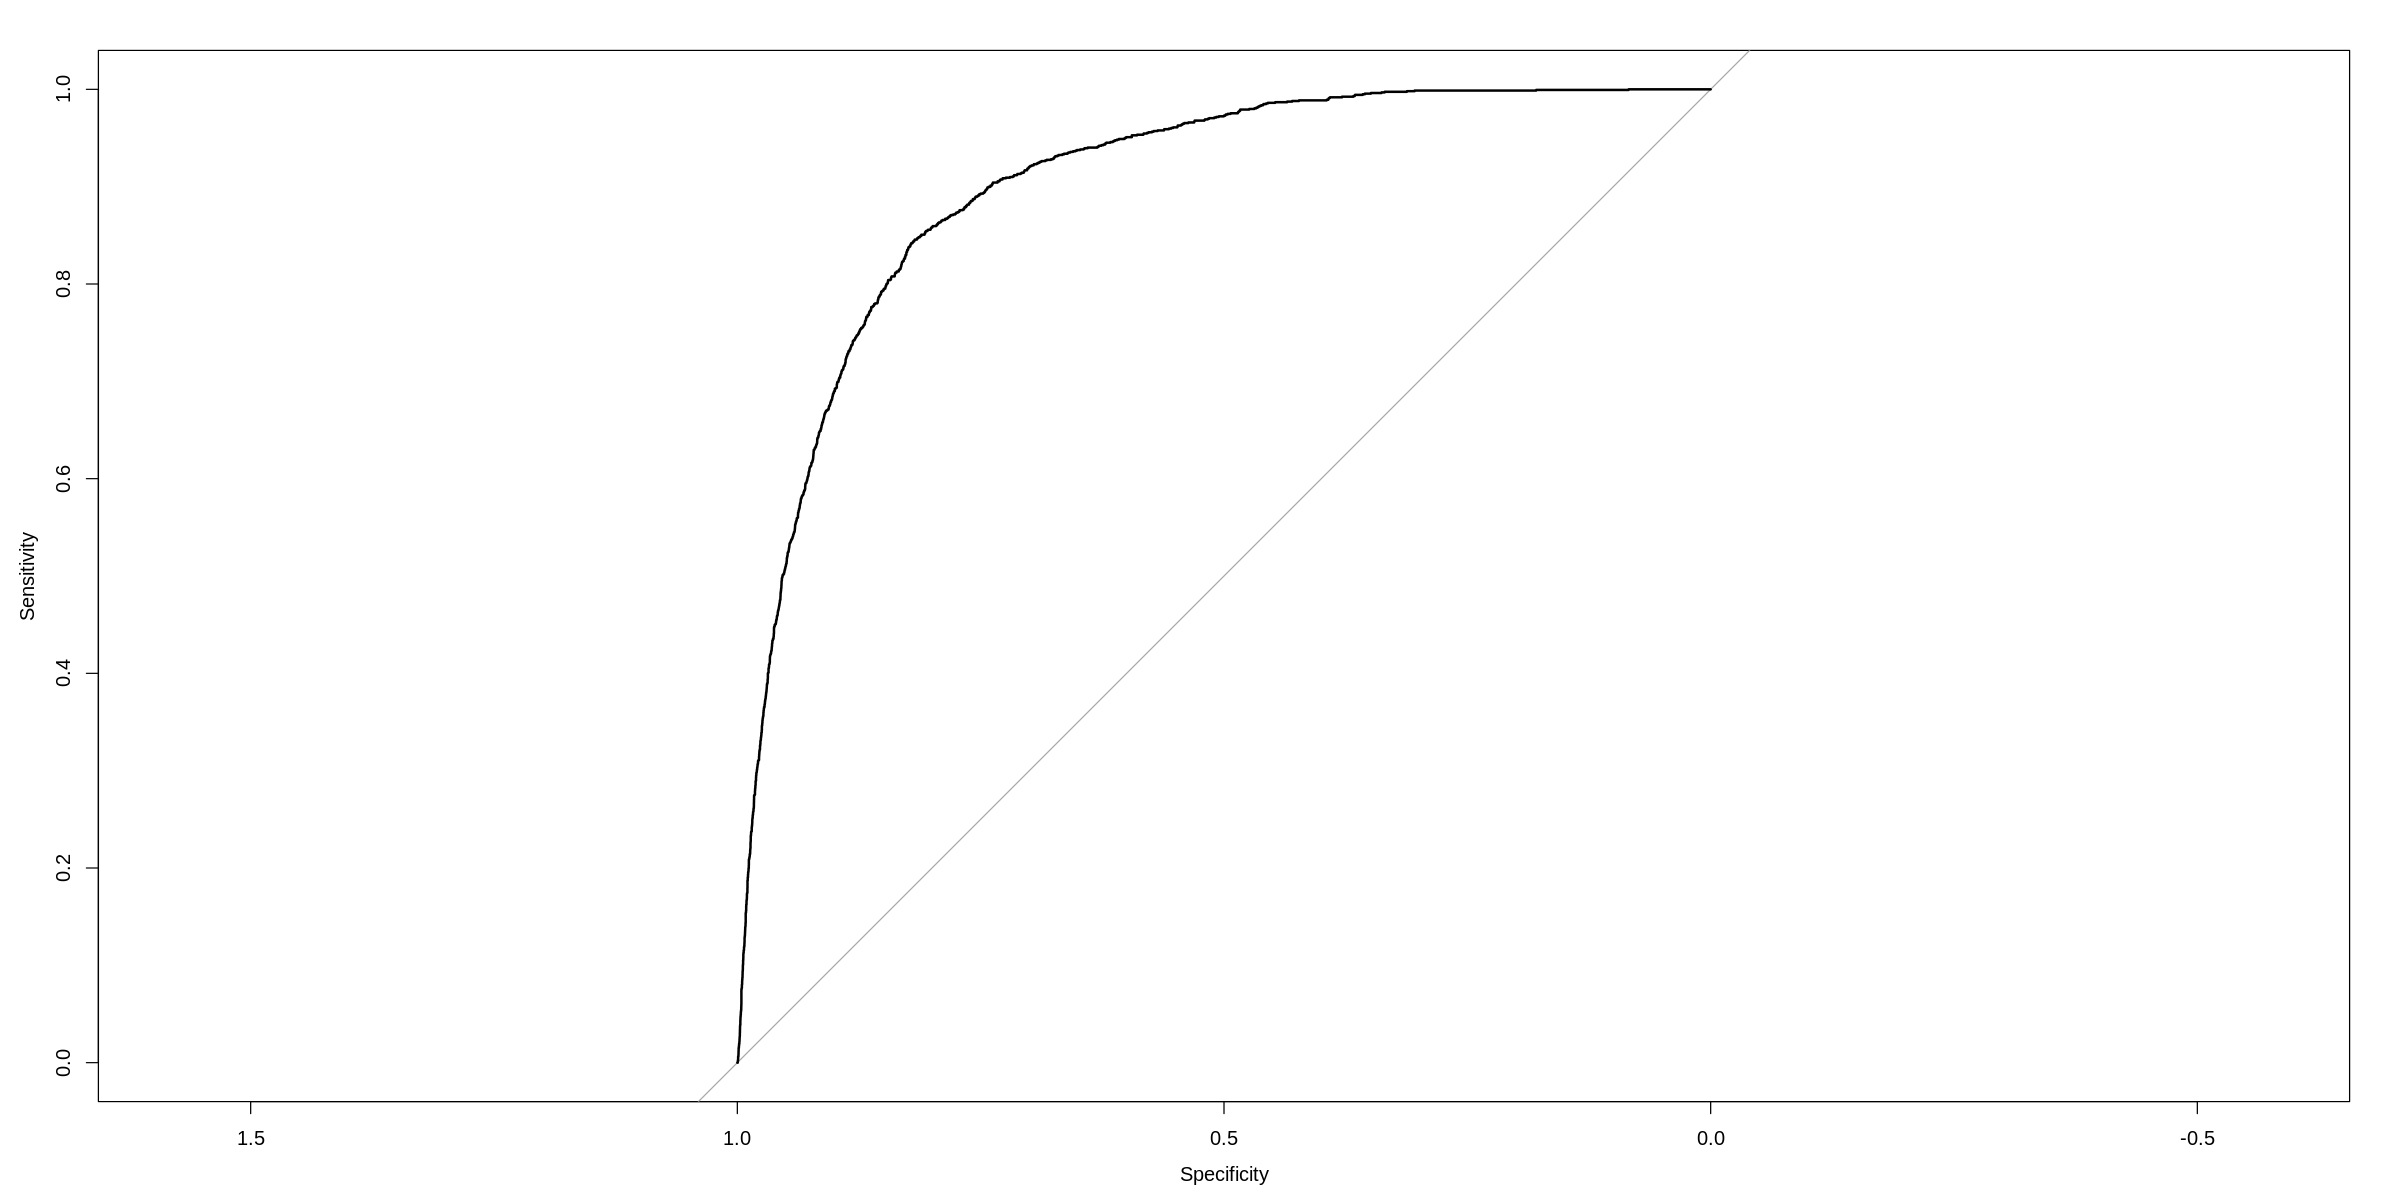

In [ ]:
plot(ROC)

In [ ]:
auc(ROC)

Area under the curve: 0.9016

 The GLM Model appears to have a High ROC at 0.9 and is close to 1

 STEPWISE CLASSIFICATION MODEL


In [ ]:
#Stepwise Selection
null_model <- glm(Class~1, data = training_set, family = "binomial") #GLM Model no predictors
full_model <- glm(Class~.,data = training_set, family ="binomial")   #GLM Model with all predictors
step_model <- step(null_model, scope = list(lower = null_model, upper = full_model), direction = "both")
summary(step_model)


Start:  AIC=22842.28
Class ~ 1

            Df Deviance   AIC
+ Duration   1    19233 19237
+ Poutcome   3    21036 21044
+ Month     11    21339 21363
+ Housing    1    22153 22157
+ Job       11    22306 22330
+ Pdays      1    22539 22543
+ Campaign   1    22587 22591
+ Education  3    22685 22693
+ Loan       1    22692 22696
+ Marital    2    22722 22728
+ Balance    1    22766 22770
+ Day        1    22806 22810
+ Age        1    22818 22822
+ Default    1    22824 22828
<none>            22840 22842

Step:  AIC=19237.34
Class ~ Duration

            Df Deviance   AIC
+ Poutcome   3    17289 17299
+ Month     11    17494 17520
+ Housing    1    18366 18372
+ Job       11    18589 18615
+ Pdays      1    18855 18861
+ Campaign   1    19021 19027
+ Education  3    19048 19058
+ Loan       1    19075 19081
+ Marital    2    19131 19139
+ Balance    1    19168 19174
+ Age        1    19209 19215
+ Day        1    19211 19217
+ Default    1    19219 19225
<none>            19233 19237


Call:
glm(formula = Class ~ Duration + Poutcome + Month + Housing + 
    Job + Campaign + Loan + Marital + Education + Balance + Pdays, 
    family = "binomial", data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0062  -0.3772  -0.2588  -0.1765   3.2358  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -2.254e+00  1.682e-01 -13.400  < 2e-16 ***
Duration            4.189e-03  7.651e-05  54.752  < 2e-16 ***
Poutcomeother       1.175e-01  1.084e-01   1.084 0.278306    
Poutcomesuccess     2.312e+00  9.890e-02  23.377  < 2e-16 ***
Poutcomeunknown    -2.044e-01  1.074e-01  -1.904 0.056923 .  
Monthaug           -7.184e-01  9.405e-02  -7.638 2.20e-14 ***
Monthdec            5.292e-01  2.126e-01   2.490 0.012792 *  
Monthfeb           -2.465e-01  1.019e-01  -2.420 0.015534 *  
Monthjan           -1.260e+00  1.459e-01  -8.641  < 2e-16 ***
Monthjul           -7.936e-01  9.361e-02  -8.477  < 2e-16 ***
Month

In [ ]:
step_prob = predict(step_model,newdata = test_set[-15],type="response") #Stepwise GLM Probabilities for prediction

In [ ]:
step.pred=as.factor(ifelse(step_prob >0.5,"yes","no"))
confusionMatrix(step.pred, test_set$Class, positive = "yes") #Confusion Matrix to get accuracy for Stepwise Model and prediction table

Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  11682  1054
       yes   295   533
                                          
               Accuracy : 0.9005          
                 95% CI : (0.8954, 0.9055)
    No Information Rate : 0.883           
    P-Value [Acc > NIR] : 4.348e-11       
                                          
                  Kappa : 0.3927          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.33585         
            Specificity : 0.97537         
         Pos Pred Value : 0.64372         
         Neg Pred Value : 0.91724         
             Prevalence : 0.11700         
         Detection Rate : 0.03930         
   Detection Prevalence : 0.06104         
      Balanced Accuracy : 0.65561         
                                          
       'Positive' Class : yes             
                  

In [ ]:
ROCStep=roc(test_set$Class,step_prob)

Setting levels: control = no, case = yes

Setting direction: controls < cases



Area under the curve: 0.9017

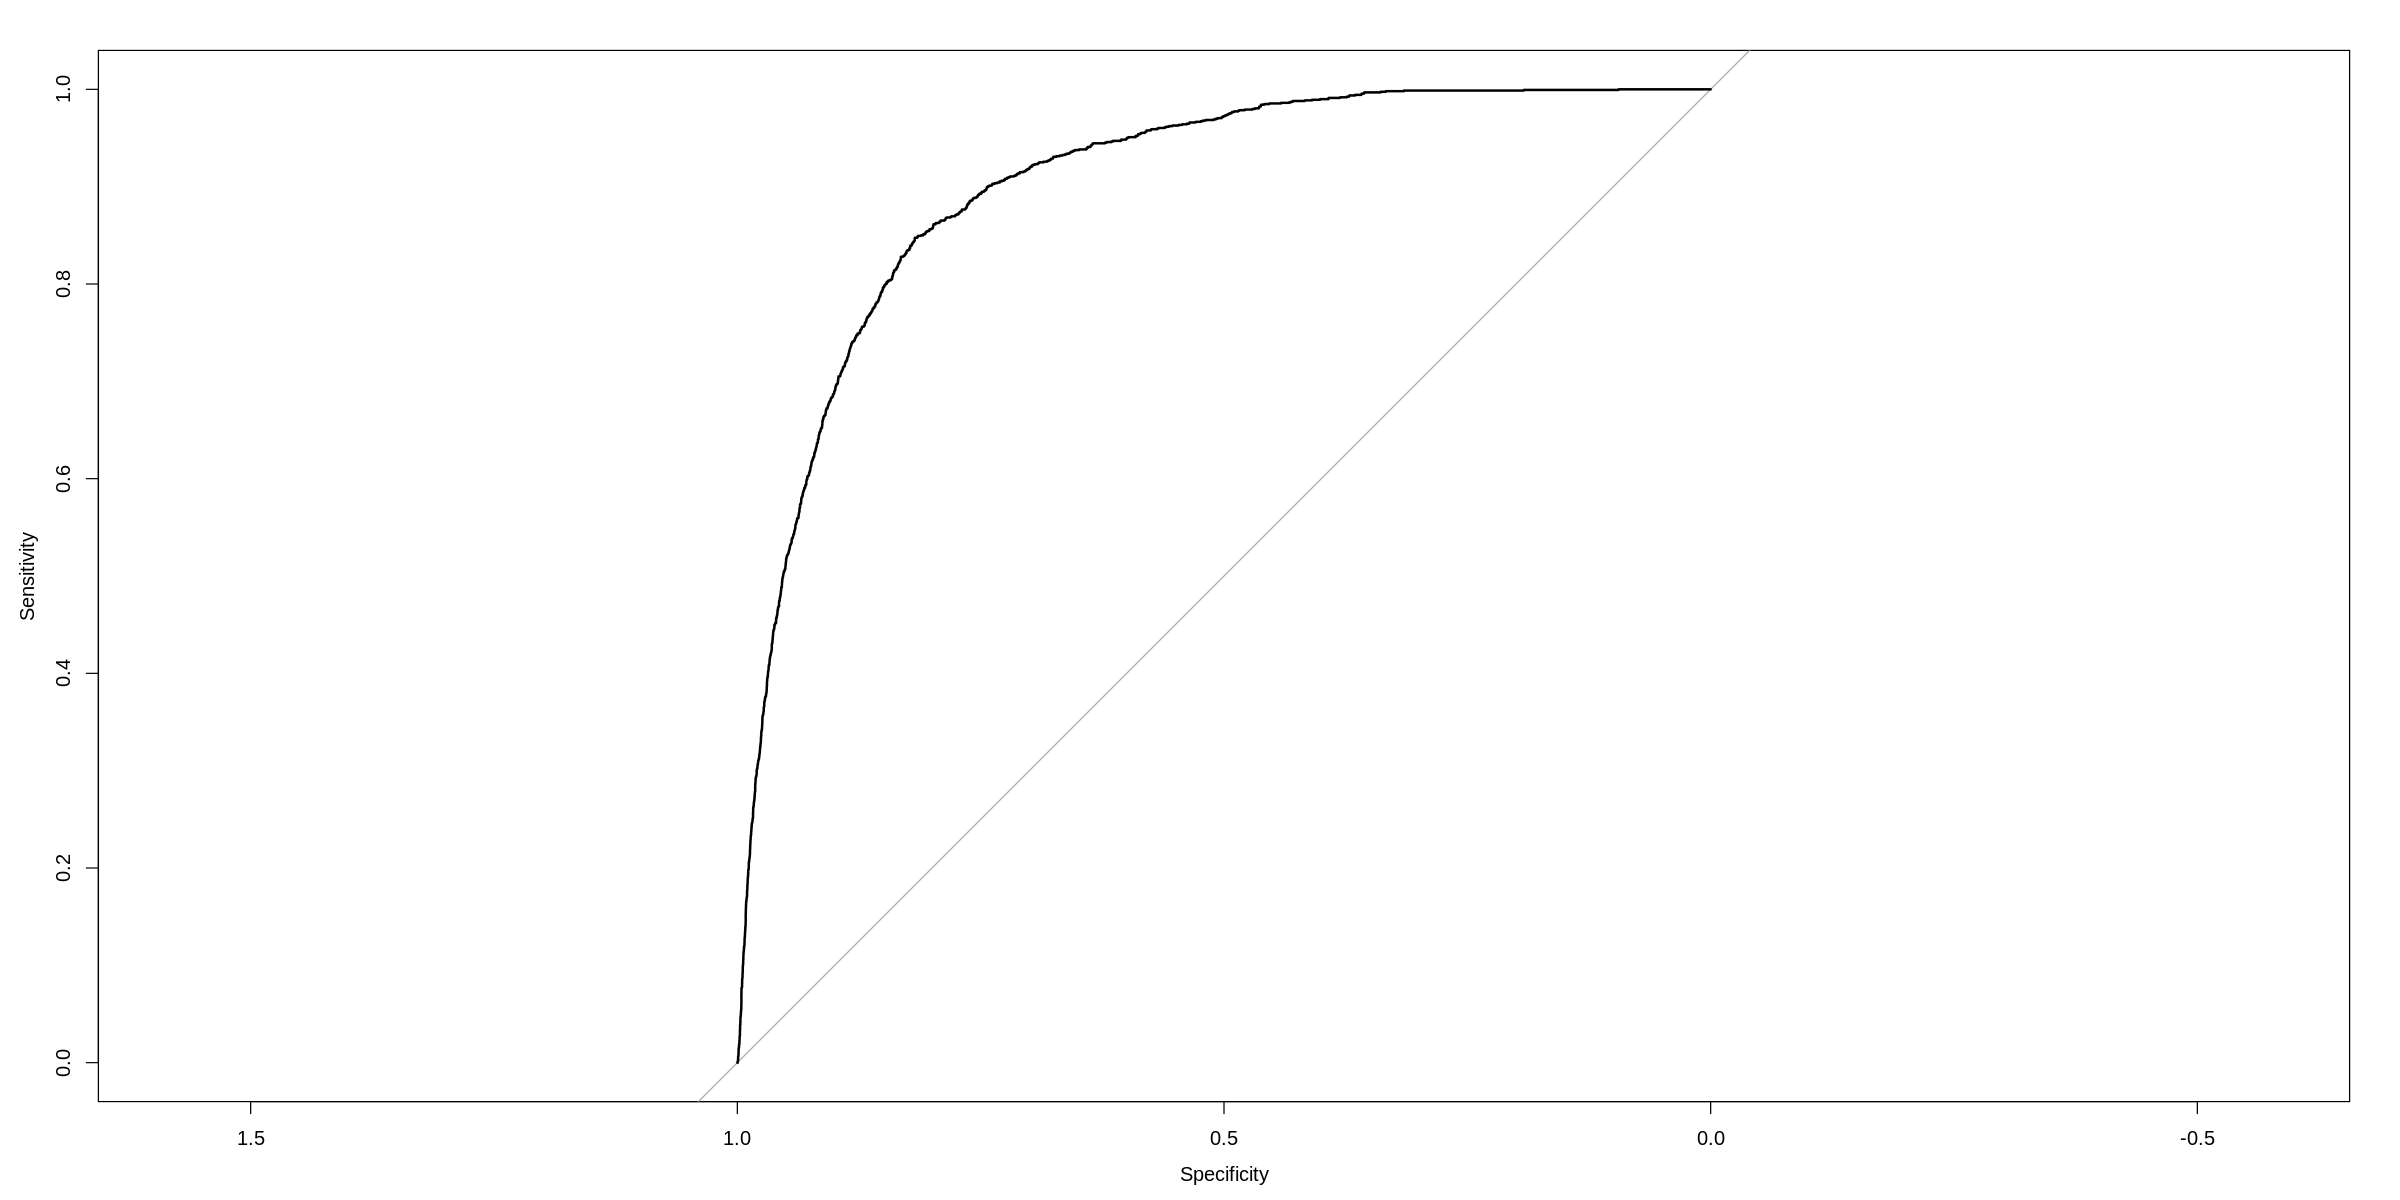

In [ ]:
plot(ROCStep)
auc(ROCStep)

using the Stepwise Regression model it appears the accuracy decreases insignficantly but the AUC increases only by a small margin

### BOOTSTRAP METHOD

In [ ]:
# Define training control  (Brownlee, 2020)
train.control <- trainControl(method = "boot", number = 100)
# Train the model
model <- train(Class ~., data = marketing, method = "glm",
               trControl = train.control)
# Summarize the results
print(model)

Generalized Linear Model 

45211 samples
   14 predictor
    2 classes: 'no', 'yes' 

No pre-processing
Resampling: Bootstrapped (100 reps) 
Summary of sample sizes: 45211, 45211, 45211, 45211, 45211, 45211, ... 
Resampling results:

  Accuracy   Kappa    
  0.9009433  0.3950779



There are various methods that can be utilized to estimate the accuracy of the unseen data in the given models. Such methods include Data split, cross validation, Leave one out cross validation and bootstrap. However, for the logistic reggression model, the use of Bootstrap method yields a accuracy rate of 90.09%.

###KNN CLASSIFICATION MODEL

Awanindra(2018)

In [ ]:
#Copy of marketing data for KNN
marketing_knn = marketing

In [ ]:
#Checking data values
head(marketing_knn)

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Day,Month,Duration,Campaign,Pdays,Poutcome,Class
,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,unknown,no
2,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,unknown,no
5,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,unknown,no
6,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,unknown,no


In [ ]:
#Checking attributes of dataset
summary(marketing_knn)

      Age                 Job           Marital          Education    
 Min.   :18.00   blue-collar:9732   divorced: 5207   primary  : 6851  
 1st Qu.:33.00   management :9458   married :27214   secondary:23202  
 Median :39.00   technician :7597   single  :12790   tertiary :13301  
 Mean   :40.94   admin.     :5171                    unknown  : 1857  
 3rd Qu.:48.00   services   :4154                                     
 Max.   :95.00   retired    :2264                                     
                 (Other)    :6835                                     
 Default        Balance       Housing      Loan            Day       
 no :44396   Min.   : -8019   no :20081   no :37967   Min.   : 1.00  
 yes:  815   1st Qu.:    72   yes:25130   yes: 7244   1st Qu.: 8.00  
             Median :   448                           Median :16.00  
             Mean   :  1362                           Mean   :15.81  
             3rd Qu.:  1428                           3rd Qu.:21.00  
            

In [ ]:
#See unique value on column "Job"
unique(marketing_knn[c("Job")])

,Job
,<fct>
1,management
2,technician
3,entrepreneur
4,blue-collar
5,unknown
9,retired
11,admin.
15,services
47,self-employed


**Recode all categorical values to numerical**

In [ ]:
marketing_knn$Month = dplyr::recode(marketing_knn$Month, 'jan'=1,'feb'=2,'mar'=3,'apr'=4,'may' =5,'jun'=6,
                                'jul'=7,'aug'=8, 'sep'=9, 'oct'=10, 'nov'=11, 'dec'=12)

In [ ]:
summary(marketing_knn$Job)

admin.   blue-collar  entrepreneur     housemaid    management 
         5171          9732          1487          1240          9458 
      retired self-employed      services       student    technician 
         2264          1579          4154           938          7597 
   unemployed       unknown 
         1303           288

In [ ]:
marketing_knn$Marital = dplyr::recode(marketing_knn$Marital, 'divorced'=1,'married'=2,'single'=3)

In [ ]:
marketing_knn$Education = dplyr::recode(marketing_knn$Education, 'primary'=1,'secondary'=2,'tertiary'=3,'unknown'=4)

In [ ]:
marketing_knn$Default = dplyr::recode(marketing_knn$Default, 'no'=1,'yes'=2)

In [ ]:
marketing_knn$Loan = dplyr::recode(marketing_knn$Loan, 'no'=1,'yes'=2)

In [ ]:
marketing_knn$Job = dplyr::recode(marketing_knn$Job, 'blue-collar'=1,'management'=2,'technician'=3,'admin.'=4,'services' =5,'retired'=6,
                                'entrepreneur'=7,'unknown'=8, 'self-employed'=9, 'unemployed'=10, 'housemaid'=11, 'student'=12)

In [ ]:
marketing_knn$Poutcome = dplyr::recode(marketing_knn$Poutcome, 'failure'=1,'other'=2,'success'=3,'unknown'=4)

In [ ]:
marketing_knn$Housing = dplyr::recode(marketing_knn$Housing, 'no'=1,'yes'=2)

Training and Test Splitting

In [ ]:
#Train Test Split
set.seed(22)
partition <- createDataPartition(marketing_knn$Class, p = 0.7, list = FALSE)
marketing_train_knn <- marketing_knn[partition, ]
marketing_test_knn <- marketing_knn[-partition, ]

Resampling to find best K

In [ ]:
#Setting control parameter, using cross validation method
ctrl <- trainControl(method = "cv", number = 10, classProbs = TRUE)

In [ ]:
#fit the cross validation on knn model to find best k
set.seed(22)
knn <- train(Class ~., data = marketing_train_knn,
             method = "knn",
             trControl = ctrl,
             preProcess = c("center", "scale"),
             tuneLength = 10)
knn

k-Nearest Neighbors 

31649 samples
   14 predictor
    2 classes: 'no', 'yes' 

Pre-processing: centered (14), scaled (14) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 28485, 28484, 28484, 28484, 28483, 28485, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.8924445  0.3561864
   7  0.8949092  0.3529090
   9  0.8954149  0.3397165
  11  0.8955729  0.3315113
  13  0.8954151  0.3199569
  15  0.8954466  0.3127843
  17  0.8950676  0.3039505
  19  0.8952887  0.3014560
  21  0.8943725  0.2885731
  23  0.8942144  0.2848376

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 11.

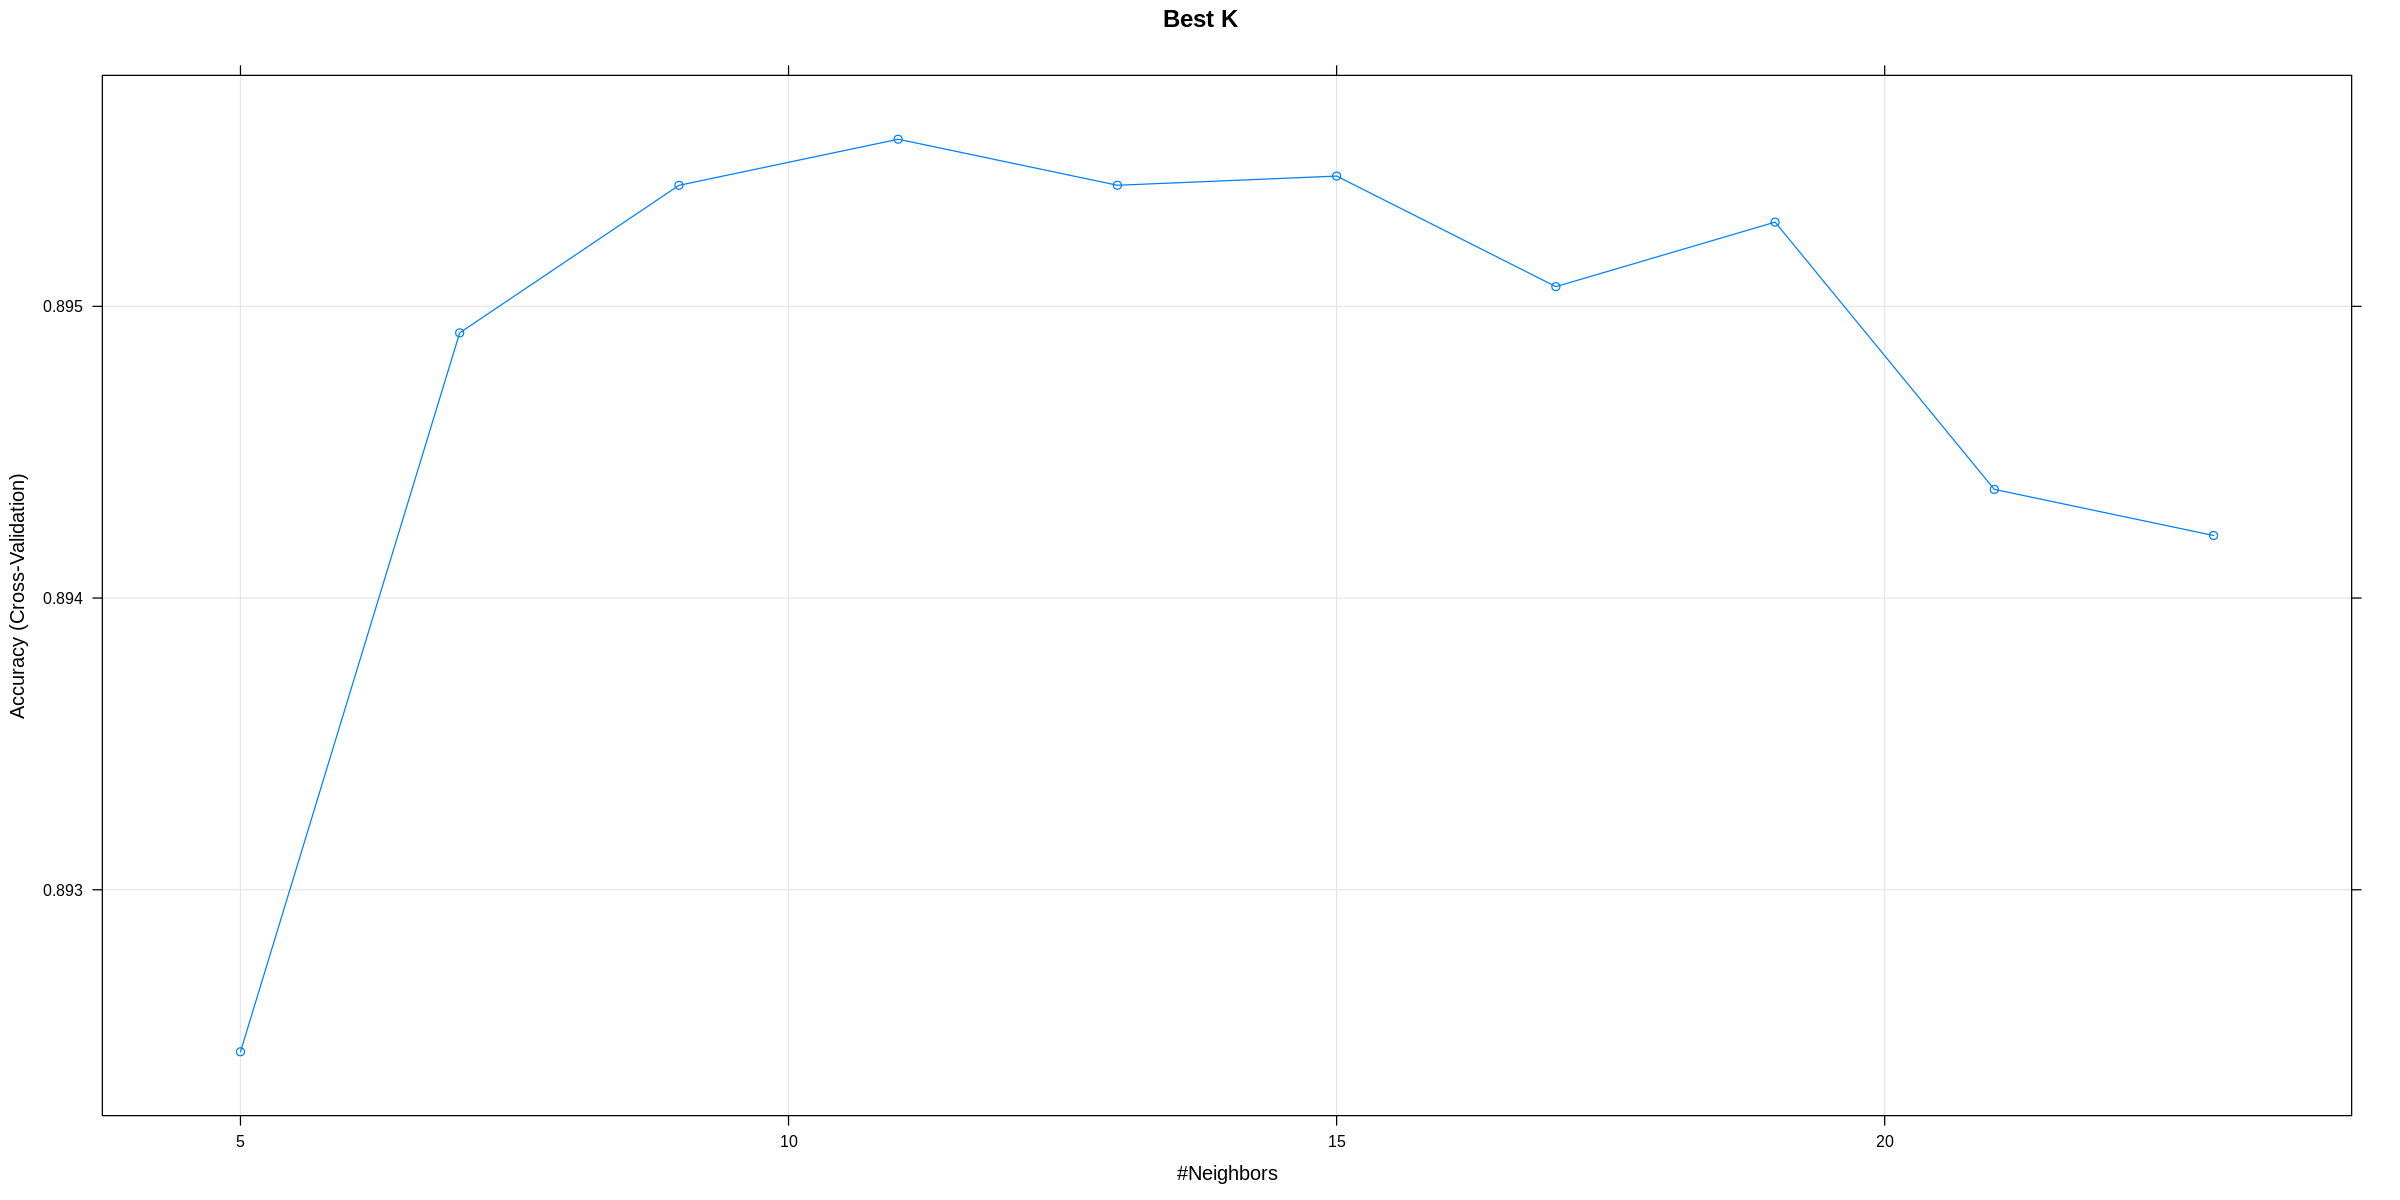

In [ ]:
plot(knn, main="Best K")

ROC Curve

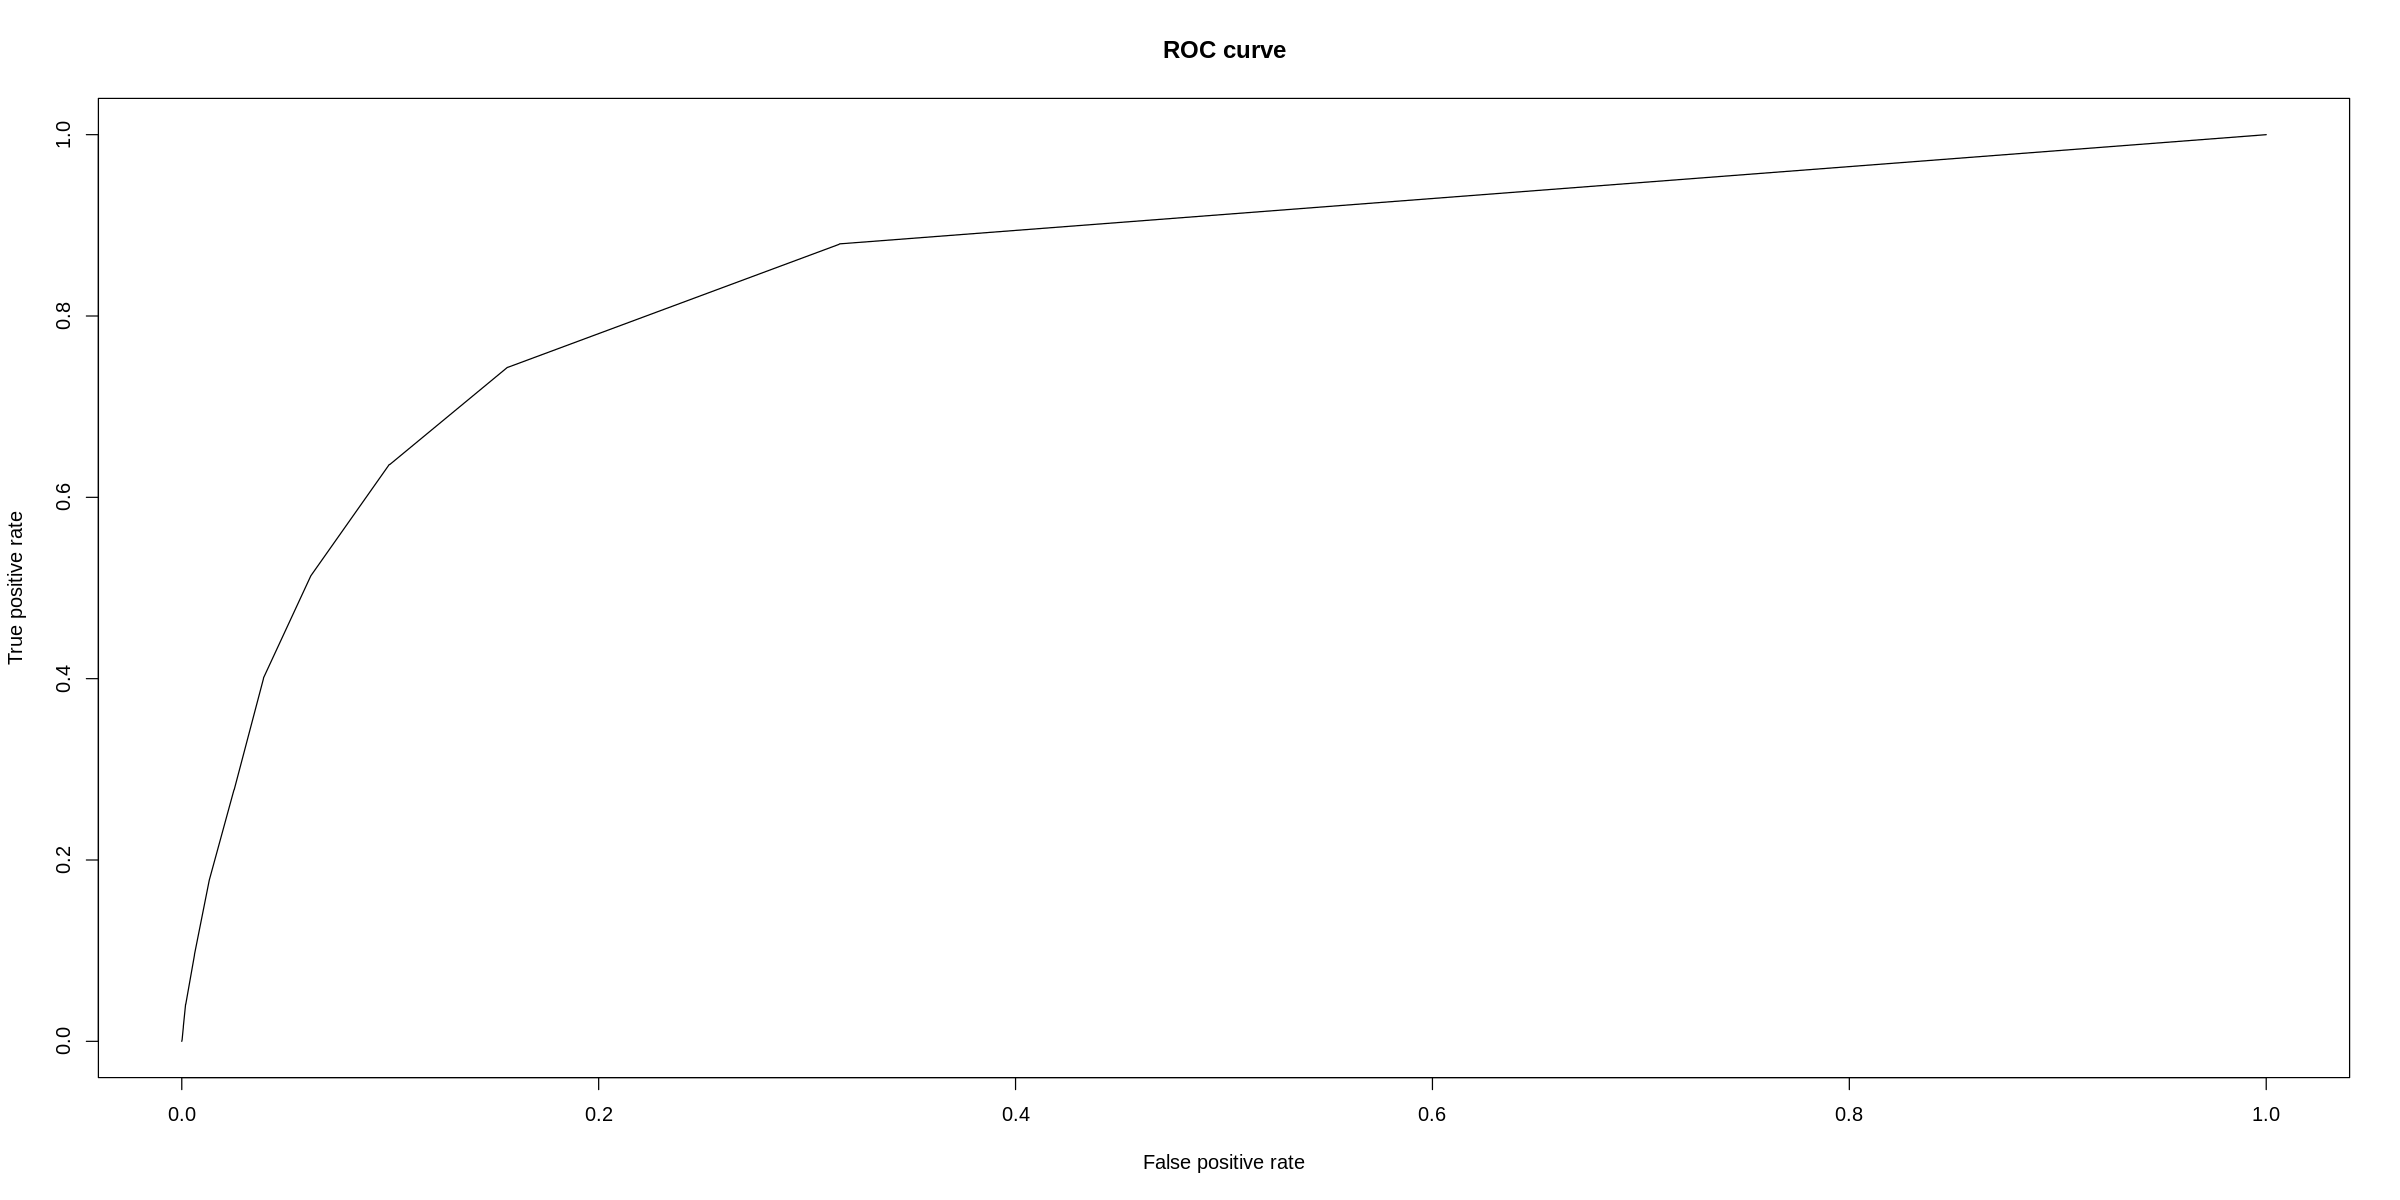

In [ ]:
marketing_test_knn_Predicted = predict(knn, marketing_test_knn, "prob")[,2]

#Plot ROC curve
plot(performance(prediction(marketing_test_knn_Predicted, marketing_test_knn$Class),
            "tpr", "fpr"), main="ROC curve")

In [ ]:
#See the results of predicted value
table(marketing_test_knn_Predicted)

marketing_test_knn_Predicted
                 0 0.0833333333333333 0.0909090909090909  0.166666666666667 
              8387                  6               2117                  2 
 0.181818181818182               0.25  0.272727272727273  0.333333333333333 
               846                  3                643                  3 
 0.363636363636364  0.416666666666667  0.454545454545455                0.5 
               449                  3                362                  1 
 0.545454545454545  0.636363636363636  0.666666666666667  0.727272727272727 
               300                215                  1                136 
              0.75  0.818181818181818  0.833333333333333  0.909090909090909 
                 1                 52                  1                 29 
                 1 
                 5 

In [ ]:
#To make 0 and 1 value
marketing_test_knn_Predicted = ifelse(marketing_test_knn_Predicted > 0.5, 1,0)

In [ ]:
#Change predicted class to categorical value
marketing_test_knn_Predicted = recode(marketing_test_knn_Predicted, '0'='no', '1'='yes')

In [ ]:
#See the results of predicted value
table(marketing_test_knn_Predicted)

marketing_test_knn_Predicted
   no   yes 
12822   740 

In [ ]:
#Check test class
table(marketing_test_knn$Class)


   no   yes 
11976  1586 

In [ ]:
#Check Performance
table_knn = table(marketing_test_knn$Class, marketing_test_knn_Predicted)
table_knn

     marketing_test_knn_Predicted
         no   yes
  no  11676   300
  yes  1146   440

In [ ]:
#Recall and Precision
precision_knn <- 100*table_knn[4]/(table_knn[4]+table_knn[1])
recall_knn <- 100*table_knn[4]/(table_knn[4]+table_knn[2])

cat('precision =', precision_knn,'%')
cat('recall =', recall_knn,'%')

precision = 3.631562 %recall = 27.74275 %

In [ ]:
#Confusion matrix
confusionMatrix(factor(marketing_test_knn_Predicted),
                factor(marketing_test_knn$Class), positive= 'yes')

Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  11676  1146
       yes   300   440
                                          
               Accuracy : 0.8934          
                 95% CI : (0.8881, 0.8985)
    No Information Rate : 0.8831          
    P-Value [Acc > NIR] : 8.051e-05       
                                          
                  Kappa : 0.3284          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.27743         
            Specificity : 0.97495         
         Pos Pred Value : 0.59459         
         Neg Pred Value : 0.91062         
             Prevalence : 0.11694         
         Detection Rate : 0.03244         
   Detection Prevalence : 0.05456         
      Balanced Accuracy : 0.62619         
                                          
       'Positive' Class : yes             
                  

KNN gives a quite high accuracy of 0.8934

###Naive *Bayes* Classification Model

In [ ]:
#set random seed  (Rodri, 2019)
set.seed(123)
#Shuffle the dataset
n=nrow(marketing)
shuffled <- marketing[sample(n),]
#Split data
train <- shuffled[1:round(0.7*n),]
test <- shuffled[(round(0.7*n)+1):n,]

In [ ]:
#Build the location prediction model
marketingmodel <- naive_bayes(Class ~., data = train)
marketingmodel


================================== Naive Bayes ================================== 
 
 Call: 
naive_bayes.formula(formula = Class ~ ., data = train)

--------------------------------------------------------------------------------- 
 
Laplace smoothing: 0

--------------------------------------------------------------------------------- 
 
 A priori probabilities: 

       no       yes 
0.8823622 0.1176378 

--------------------------------------------------------------------------------- 
 
 Tables: 

--------------------------------------------------------------------------------- 
 ::: Age (Gaussian) 
--------------------------------------------------------------------------------- 
      
Age          no      yes
  mean 40.81035 41.49369
  sd   10.17199 13.40958

--------------------------------------------------------------------------------- 
 ::: Job (Categorical) 
--------------------------------------------------------------------------------- 
               
Job             

In [ ]:
pred = predict(marketingmodel, newdata = test[-15])

In [ ]:
#To see performance
conf = table(test$Class, pred)
conf

     pred
         no   yes
  no  11165   832
  yes   778   788

In [ ]:
#Model Evaluation
confusionMatrix(conf, positive = 'yes')
precision <- 100*conf[4]/(conf[4]+conf[1])
recall <- 100*conf[4]/(conf[4]+conf[2])
cat('\n')
cat('precision =', precision,'%')
cat('recall =', recall,'%')

Confusion Matrix and Statistics

     pred
         no   yes
  no  11165   832
  yes   778   788
                                          
               Accuracy : 0.8813          
                 95% CI : (0.8757, 0.8867)
    No Information Rate : 0.8806          
    P-Value [Acc > NIR] : 0.4019          
                                          
                  Kappa : 0.4274          
                                          
 Mcnemar's Test P-Value : 0.1865          
                                          
            Sensitivity : 0.4864          
            Specificity : 0.9349          
         Pos Pred Value : 0.5032          
         Neg Pred Value : 0.9306          
             Prevalence : 0.1194          
         Detection Rate : 0.0581          
   Detection Prevalence : 0.1155          
      Balanced Accuracy : 0.7106          
                                          
       'Positive' Class : yes             
                                          


precision = 6.592487 %recall = 50.31928 %

Naive *Bayes* classification method provides a high accuracy of 88% along with a precision of 6.60%

### Laplace Smoothing

In [ ]:
#Laplance smoothing to improve naive bayes classification
marketingmodel_lp <- naive_bayes(Class ~., data = train, laplace = 1)
pred_lp = predict(marketingmodel_lp, newdata = test[-15])

In [ ]:
conf_lp = table(test$Class, pred_lp)
conf_lp

     pred_lp
         no   yes
  no  11164   833
  yes   778   788

In [ ]:
confusionMatrix(conf_lp, positive = 'yes')

Confusion Matrix and Statistics

     pred_lp
         no   yes
  no  11164   833
  yes   778   788
                                          
               Accuracy : 0.8812          
                 95% CI : (0.8757, 0.8866)
    No Information Rate : 0.8805          
    P-Value [Acc > NIR] : 0.4019          
                                          
                  Kappa : 0.4272          
                                          
 Mcnemar's Test P-Value : 0.1785          
                                          
            Sensitivity : 0.4861          
            Specificity : 0.9349          
         Pos Pred Value : 0.5032          
         Neg Pred Value : 0.9306          
             Prevalence : 0.1195          
         Detection Rate : 0.0581          
   Detection Prevalence : 0.1155          
      Balanced Accuracy : 0.7105          
                                          
       'Positive' Class : yes             
                                        

There is no significant improvement by conducting laplace smoothing

##Decision Tree Classification Model


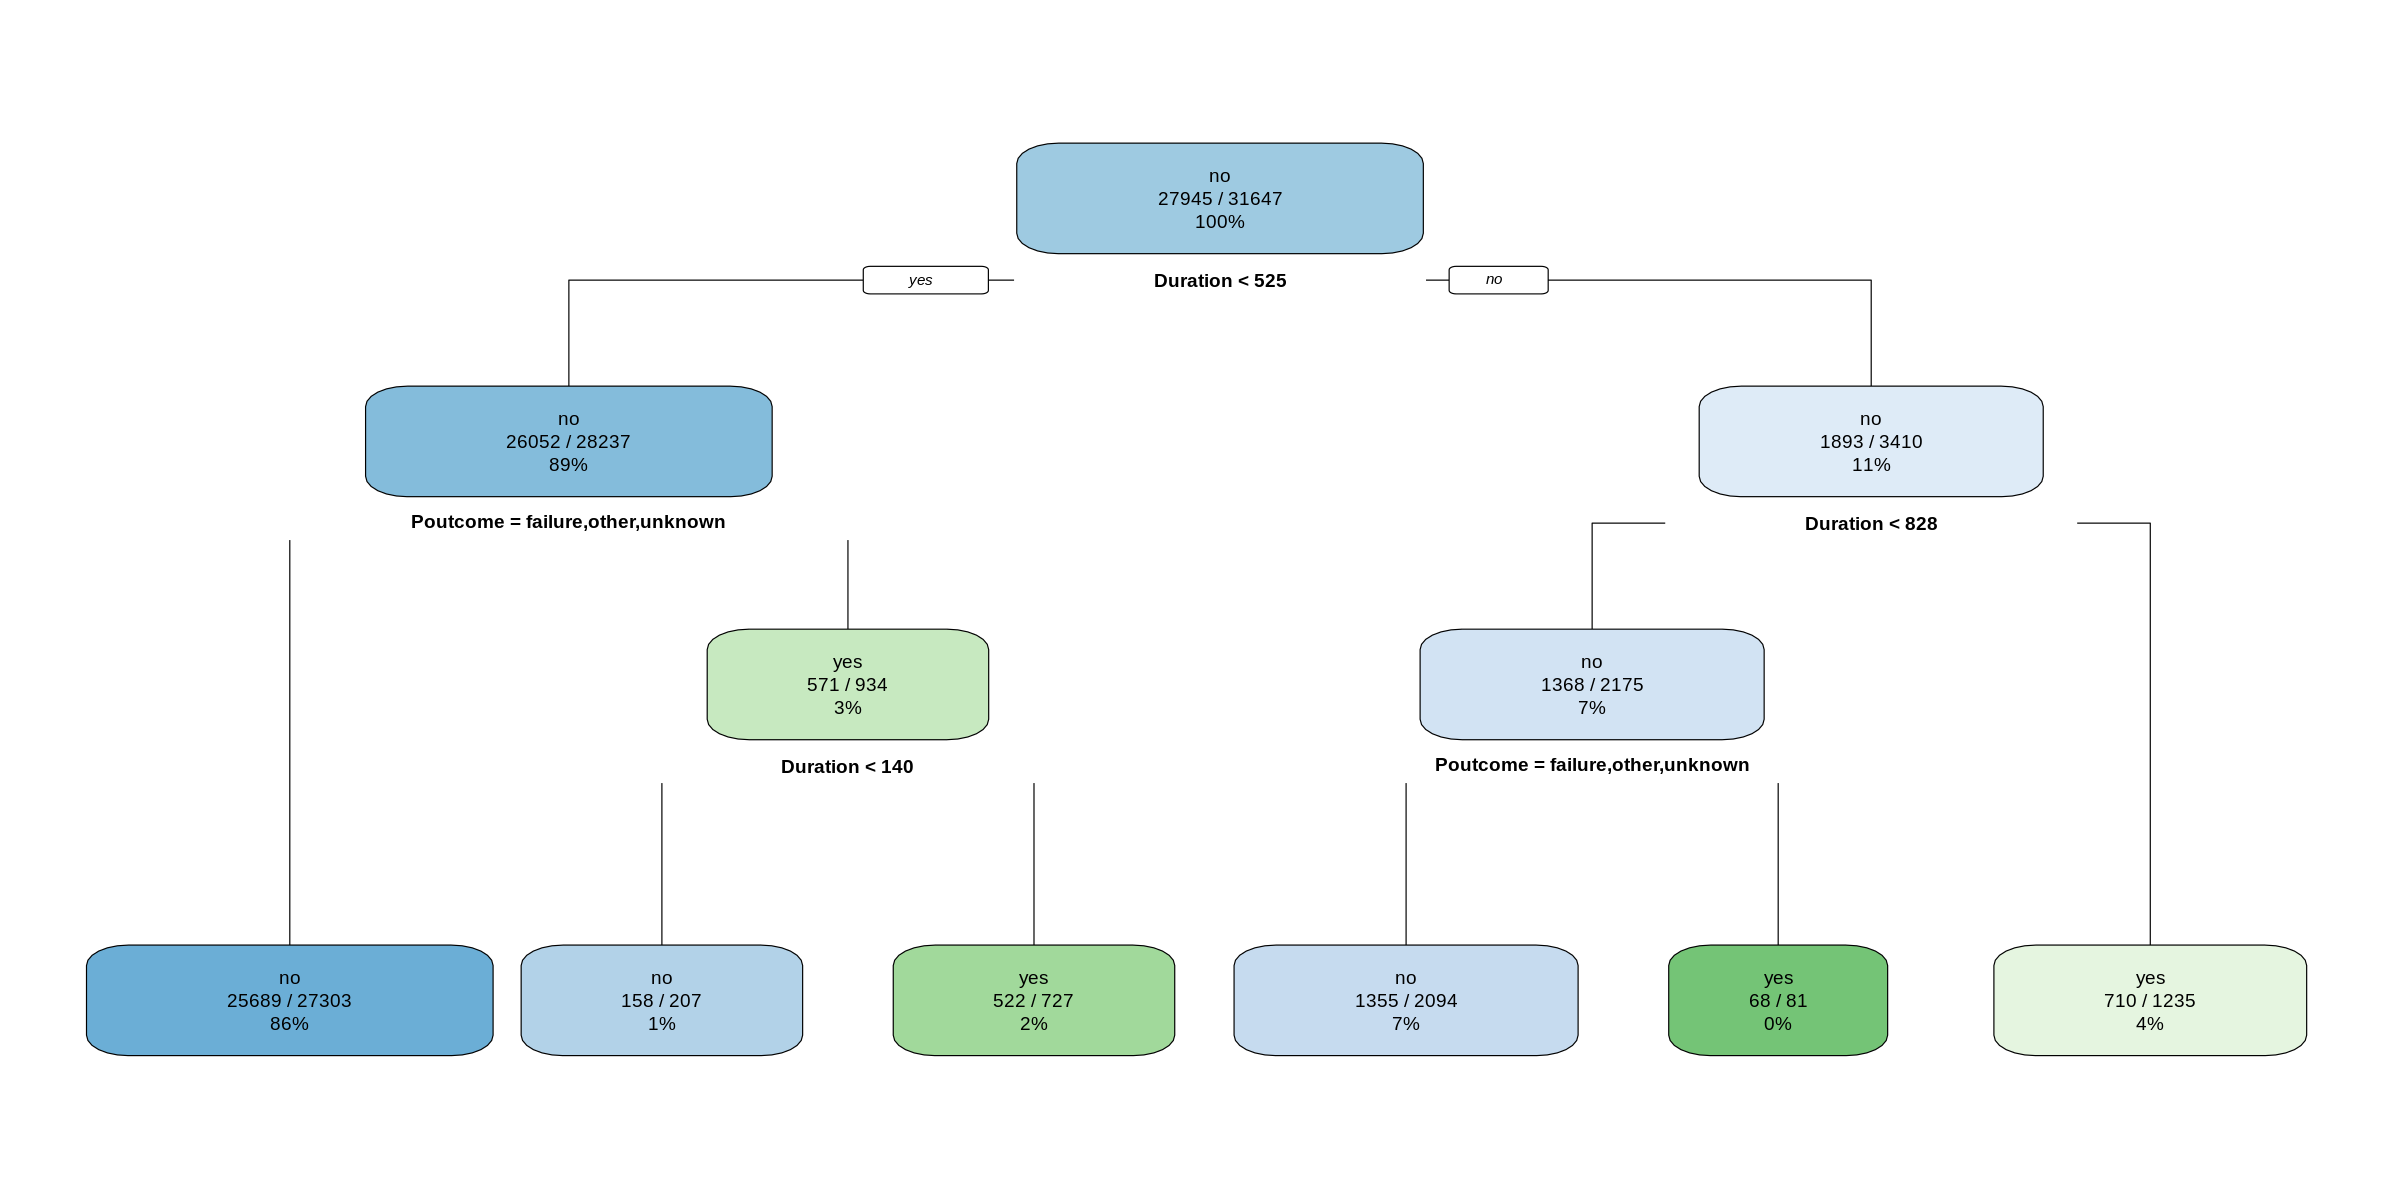

In [ ]:
#Import library and plot decision tree rules -Guru99(2021)
library(rpart)
library(rpart.plot)
fit <- rpart(Class~., data = training_set, method = 'class')
rpart.plot(fit, extra = 102)

In [ ]:
#prediction
predict_unseen =predict(fit, test_set, type = 'class')

In [ ]:
#Compare prediction and test value
table_dec = table(test_set$Class, predict_unseen)
table_dec

     predict_unseen
         no   yes
  no  11659   318
  yes  1002   585

In [ ]:
#Precision and Recall
precision_dec <- 100*table_dec[4]/(table_dec[4]+table_dec[1])
recall_dec <- 100*table_dec[4]/(table_dec[4]+table_dec[2])
cat('precision =', precision_dec,'%')
cat('recall =', recall_dec,'%')

precision = 4.77785 %recall = 36.862 %

In [ ]:
#Accuracy
accuracy_test <- sum(diag(table_dec)) / sum(table_dec)
accuracy_test

[1] 0.9026836

Decision tree has a very good result with accuracy of 0.9027 and recall rate of 86%.

Resampling and Tuning -Foley(2019)

In [ ]:
#Resampling using cross validation
marketing_tuning = train(Class ~ ., 
                    data = training_set, 
                    method = "rpart",  # for classification tree
                    tuneLength = 5,  # choose up to 5 combinations of tuning parameters (cp)
                    trControl = trainControl(
                      method = "cv",  # k-fold cross validation
                      number = 10,  # 10 folds
                      savePredictions = "final",       # save predictions for the optimal tuning parameter
                      classProbs = TRUE,  # return class probabilities in addition to predicted values
                      summaryFunction = twoClassSummary  # for binary response variable
                      )
                    )
marketing_tuning

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”


CART 

31647 samples
   14 predictor
    2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 28483, 28482, 28482, 28482, 28483, 28482, ... 
Resampling results across tuning parameters:

  cp           ROC        Sens       Spec      
  0.002160994  0.8296425  0.9688677  0.38762220
  0.003974685  0.7882177  0.9713722  0.36116486
  0.014856834  0.7494513  0.9750582  0.31713193
  0.029443544  0.6485469  0.9818930  0.20261820
  0.035386278  0.5718881  0.9892998  0.09864865

ROC was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.002160994.

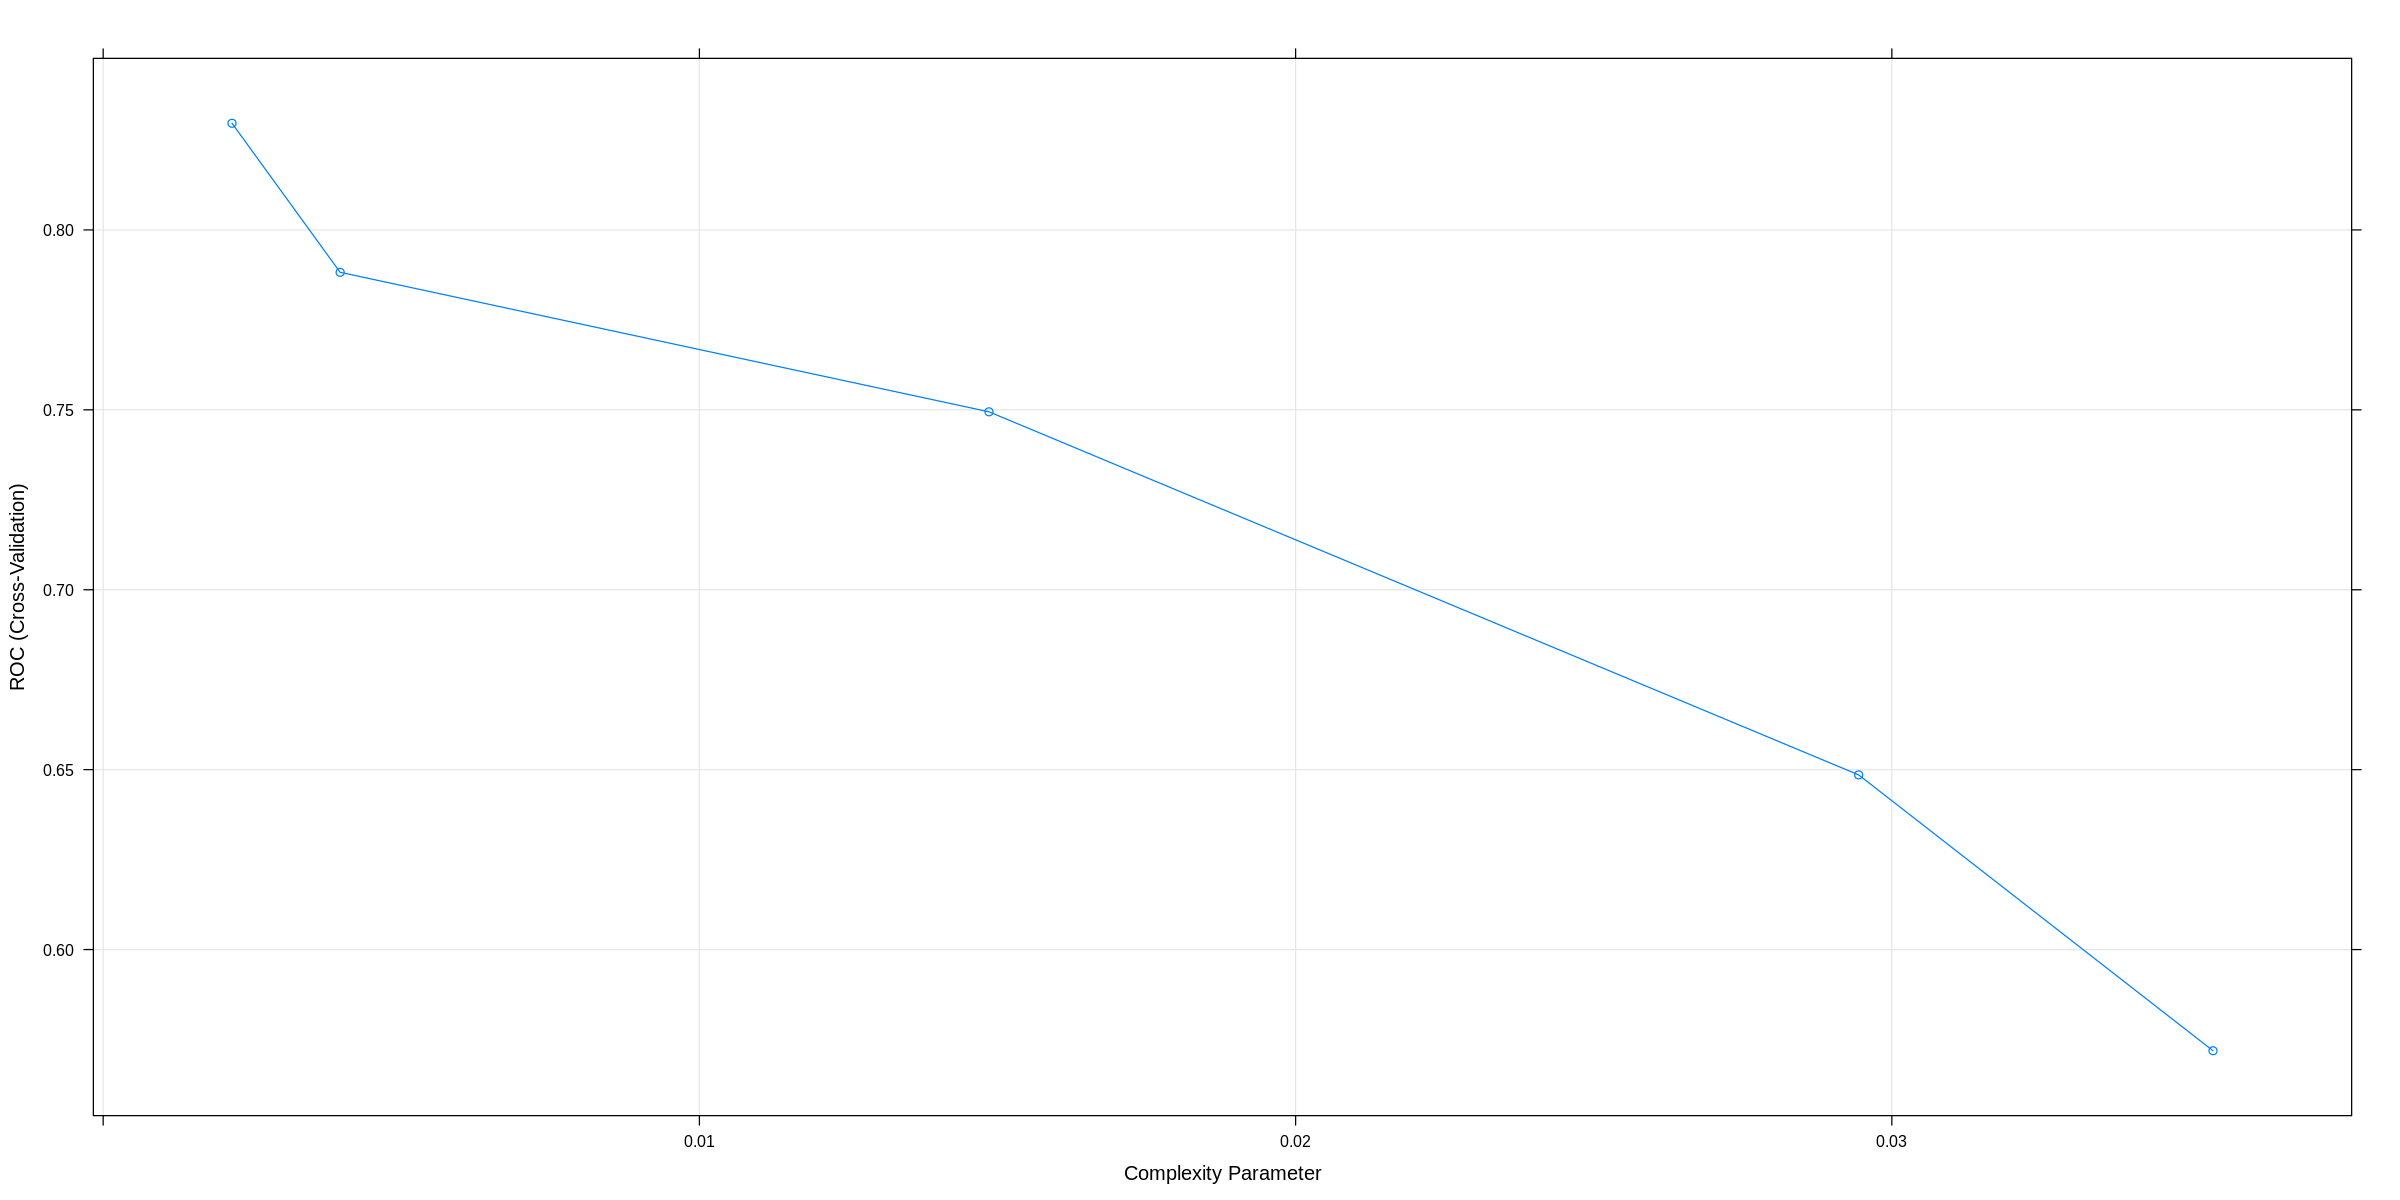

In [ ]:
#plot resampled
plot(marketing_tuning)

In [ ]:
marketing.class.pred <- predict(marketing_tuning, test_set, type = "raw")

In [ ]:
#confusion matrix
(marketing.class.conf <- confusionMatrix(data = marketing.class.pred, 
                                  reference = test_set$Class, positive="yes"))

Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  11603   920
       yes   374   667
                                          
               Accuracy : 0.9046          
                 95% CI : (0.8995, 0.9095)
    No Information Rate : 0.883           
    P-Value [Acc > NIR] : 4.599e-16       
                                          
                  Kappa : 0.4573          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.42029         
            Specificity : 0.96877         
         Pos Pred Value : 0.64073         
         Neg Pred Value : 0.92654         
             Prevalence : 0.11700         
         Detection Rate : 0.04917         
   Detection Prevalence : 0.07675         
      Balanced Accuracy : 0.69453         
                                          
       'Positive' Class : yes             
                  

So, we can see that from the result that after resampling, the model become even better with accuracy of 0.9046 using cp = 0.002160994.

#Balanced Data




In [ ]:
#Check on distribution of Class
table(training_set$Class)


   no   yes 
27945  3702 

In [ ]:
#We will use ROSE technique to do undersampling.
# balanced data set with under sampling
balanced_train <- ovun.sample(Class~., data=training_set,
                                N=7500,
                                seed=1, method='under')$data

table(balanced_train$Class)


  no  yes 
3798 3702 

In [ ]:
#Check balanced data
head(balanced_train)

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Day,Month,Duration,Campaign,Pdays,Poutcome,Class
,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,31,admin.,married,secondary,no,713,yes,no,20,nov,373,1,-1,unknown,no
2,42,services,single,tertiary,no,94,yes,no,13,may,45,4,-1,unknown,no
3,39,technician,married,secondary,no,192,yes,yes,29,may,217,5,-1,unknown,no
4,39,housemaid,married,tertiary,no,93,no,no,14,oct,595,2,-1,unknown,no
5,49,admin.,married,secondary,no,2116,no,no,8,aug,109,3,-1,unknown,no
6,48,admin.,divorced,secondary,no,0,yes,yes,23,jun,248,1,89,failure,no


In [ ]:
#check data dimention
dim(balanced_train)

[1] 7500   15

###GLM Classifier - Balanced Dataset

GLM Classification MODEL with all Variables



In [ ]:
#fit the model
glm.fit <- glm(Class ~ ., data= balanced_train, family="binomial",)

In [ ]:
glm.probs=predict(glm.fit, newdata=test_set[-15],type="response")

In [ ]:
#Threshold at 0.5
glm.pred1=as.factor(ifelse(glm.probs >0.5,"yes","no"))
confusionMatrix(glm.pred1, test_set$Class, positive = "yes")

Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  10146   320
       yes  1831  1267
                                          
               Accuracy : 0.8414          
                 95% CI : (0.8352, 0.8475)
    No Information Rate : 0.883           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.4568          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.79836         
            Specificity : 0.84712         
         Pos Pred Value : 0.40897         
         Neg Pred Value : 0.96942         
             Prevalence : 0.11700         
         Detection Rate : 0.09341         
   Detection Prevalence : 0.22840         
      Balanced Accuracy : 0.82274         
                                          
       'Positive' Class : yes             
                  

In [ ]:
#ROC AUC
ROC=roc(test_set$Class,glm.probs)

Setting levels: control = no, case = yes

Setting direction: controls < cases



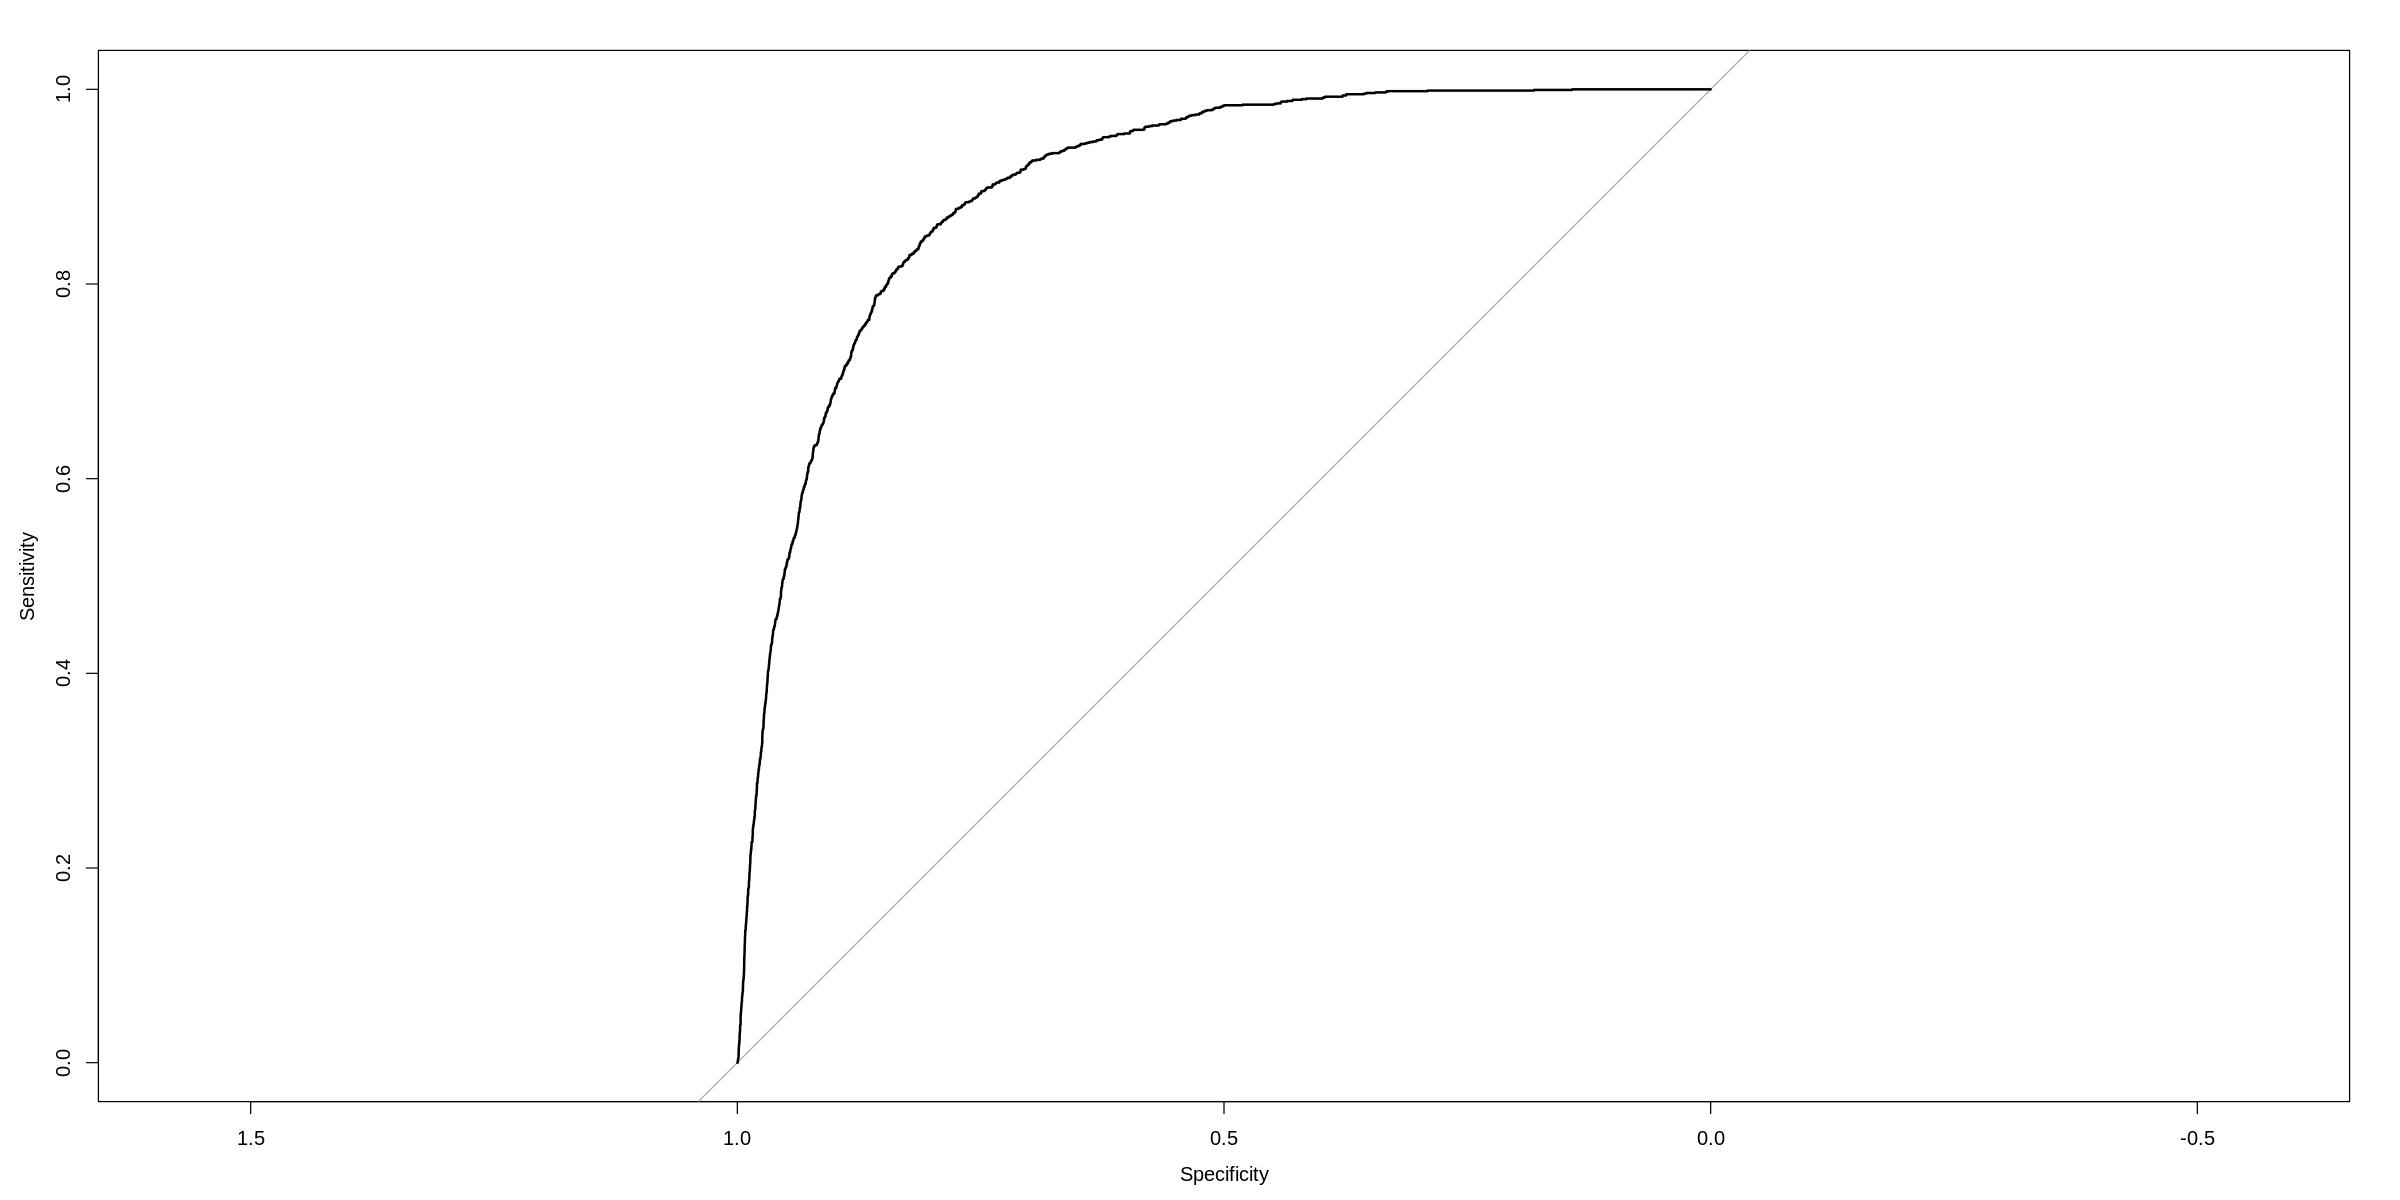

In [ ]:
plot(ROC)

In [ ]:
auc(ROC)

Area under the curve: 0.9025

Glm models produces an accuracy of 84.14% and a AUC value of 0.9025 for the balanced data.

###Decision Tree Classification Model - Balanced Dataset


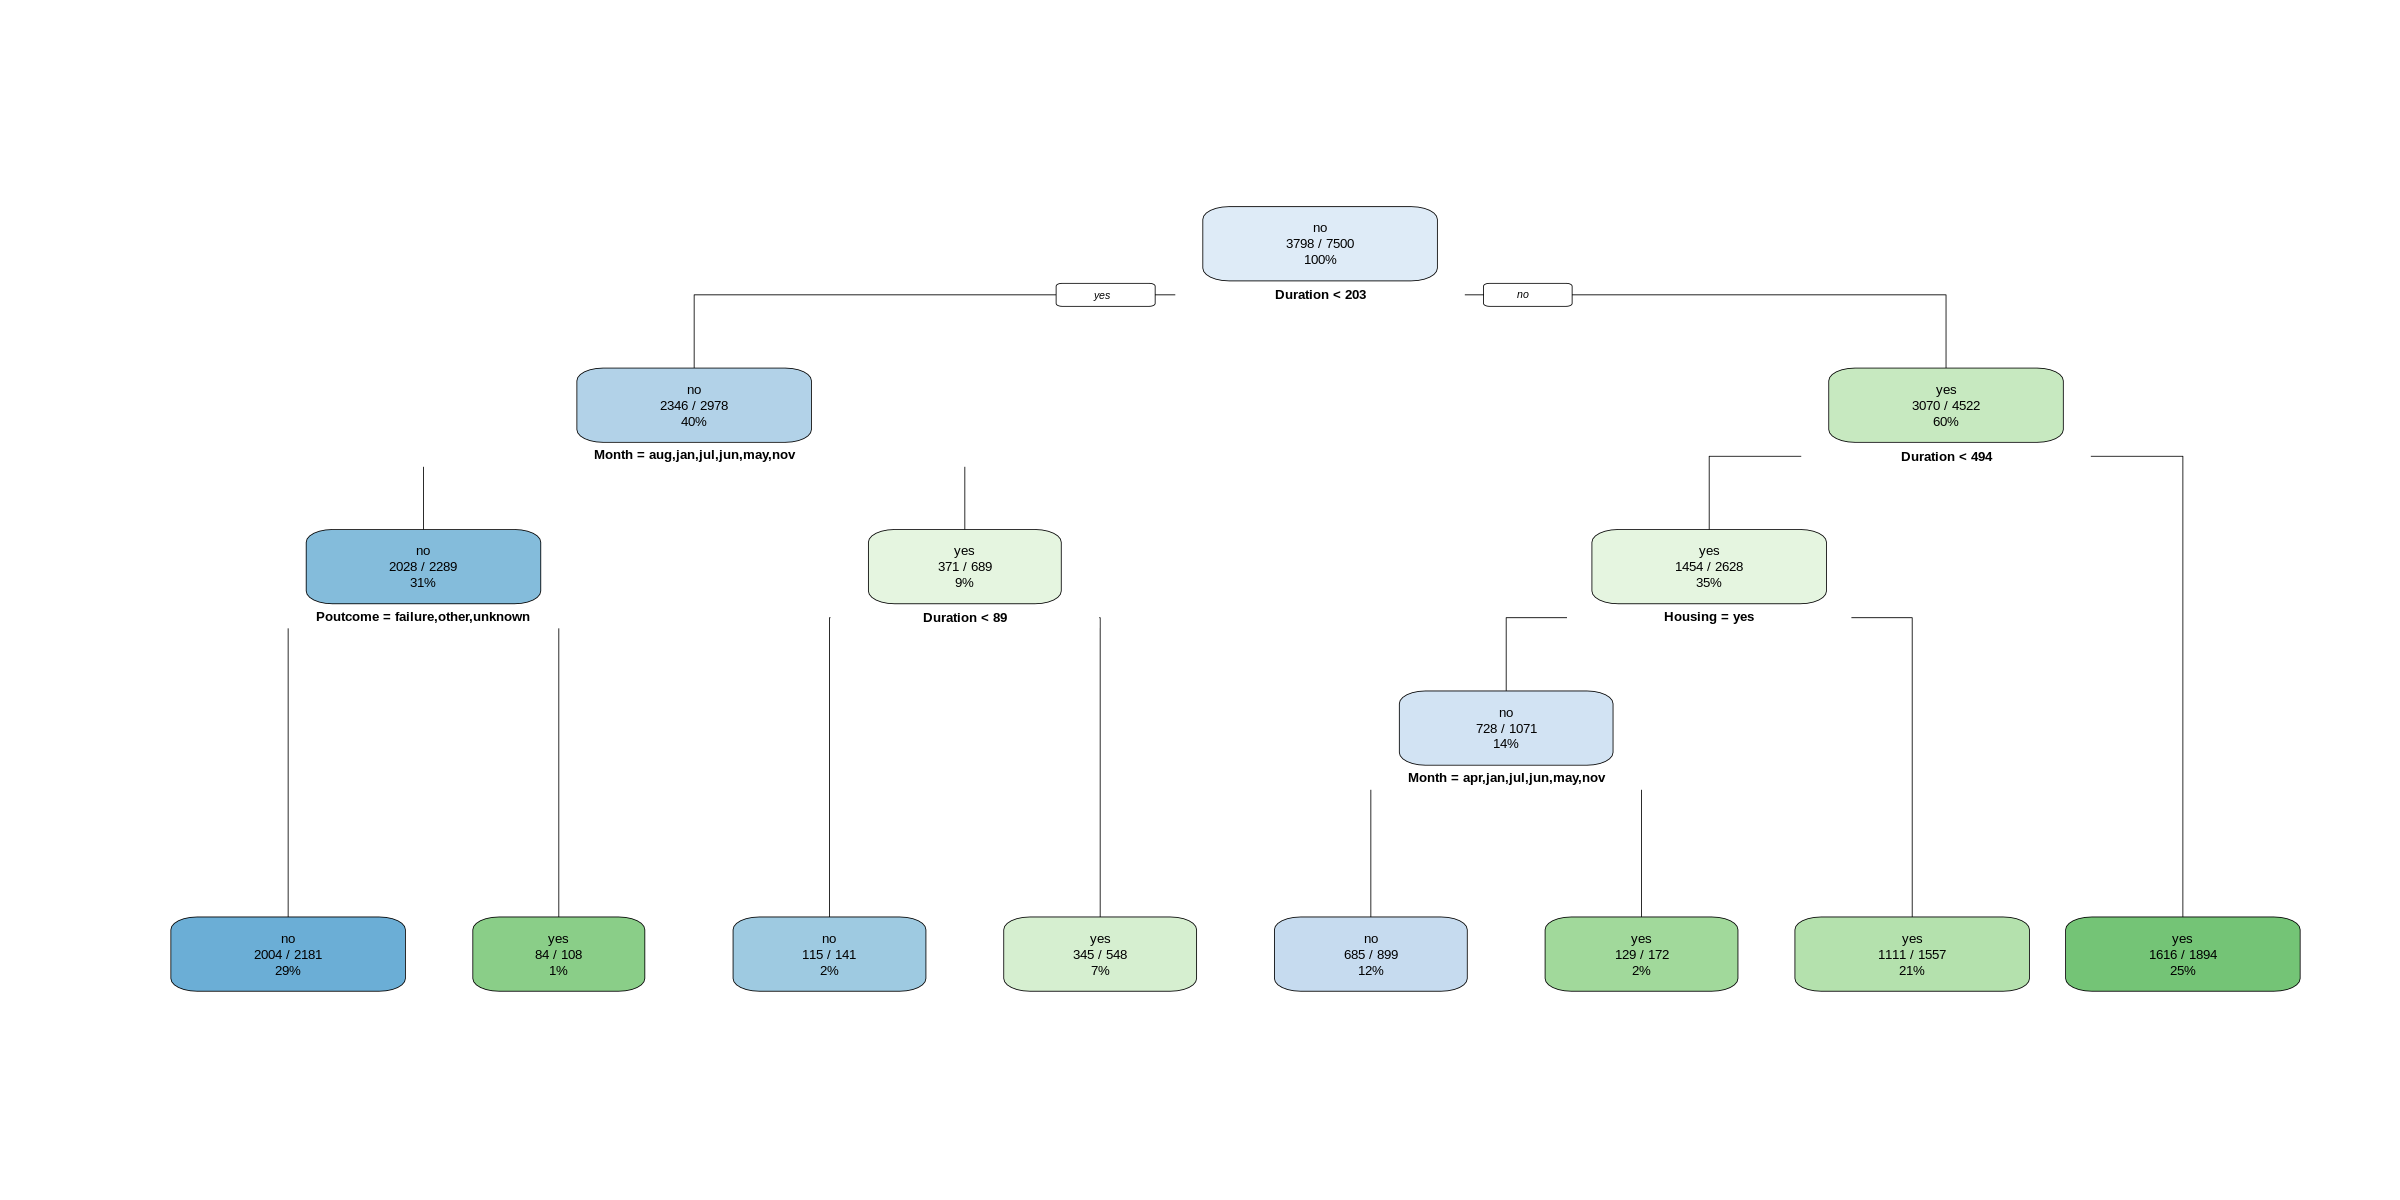

In [ ]:
#Import library and plot decision tree rules
fit <- rpart(Class~., data = balanced_train, method = 'class')
rpart.plot(fit, extra = 102)

In [ ]:
#prediction
predict_unseen <-predict(fit, test_set, type = 'class')

In [ ]:
#Compare prediction and test value
table_dec <- table(test_set$Class, predict_unseen)
table_dec

     predict_unseen
        no  yes
  no  8639 3338
  yes  218 1369

In [ ]:
#Accuracy
accuracy_test <- sum(diag(table_dec)) / sum(table_dec)
accuracy_test

[1] 0.7378354

Tuning

In [ ]:
#Resampling using cross validation
marketing_tuning = train(Class ~ ., 
                    data = balanced_train, 
                    method = "rpart",  # for classification tree
                    tuneLength = 5,  # choose up to 5 combinations of tuning parameters (cp)
                    trControl = trainControl(
                      method = "cv",  # k-fold cross validation
                      number = 10,  # 10 folds
                      savePredictions = "final",       # save predictions for the optimal tuning parameter
                      classProbs = TRUE,  # return class probabilities in addition to predicted values
                      summaryFunction = twoClassSummary  # for binary response variable
                      )
                    )
marketing_tuning

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”


CART 

7500 samples
  14 predictor
   2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 6750, 6750, 6750, 6750, 6750, 6750, ... 
Resampling results across tuning parameters:

  cp          ROC        Sens       Spec     
  0.01215559  0.8275328  0.7917116  0.8063255
  0.01998920  0.8207172  0.8030419  0.7795731
  0.03619665  0.7991933  0.7909395  0.7536330
  0.05199892  0.7460443  0.6779364  0.7936017
  0.43706105  0.6253512  0.7714630  0.4792395

ROC was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01215559.

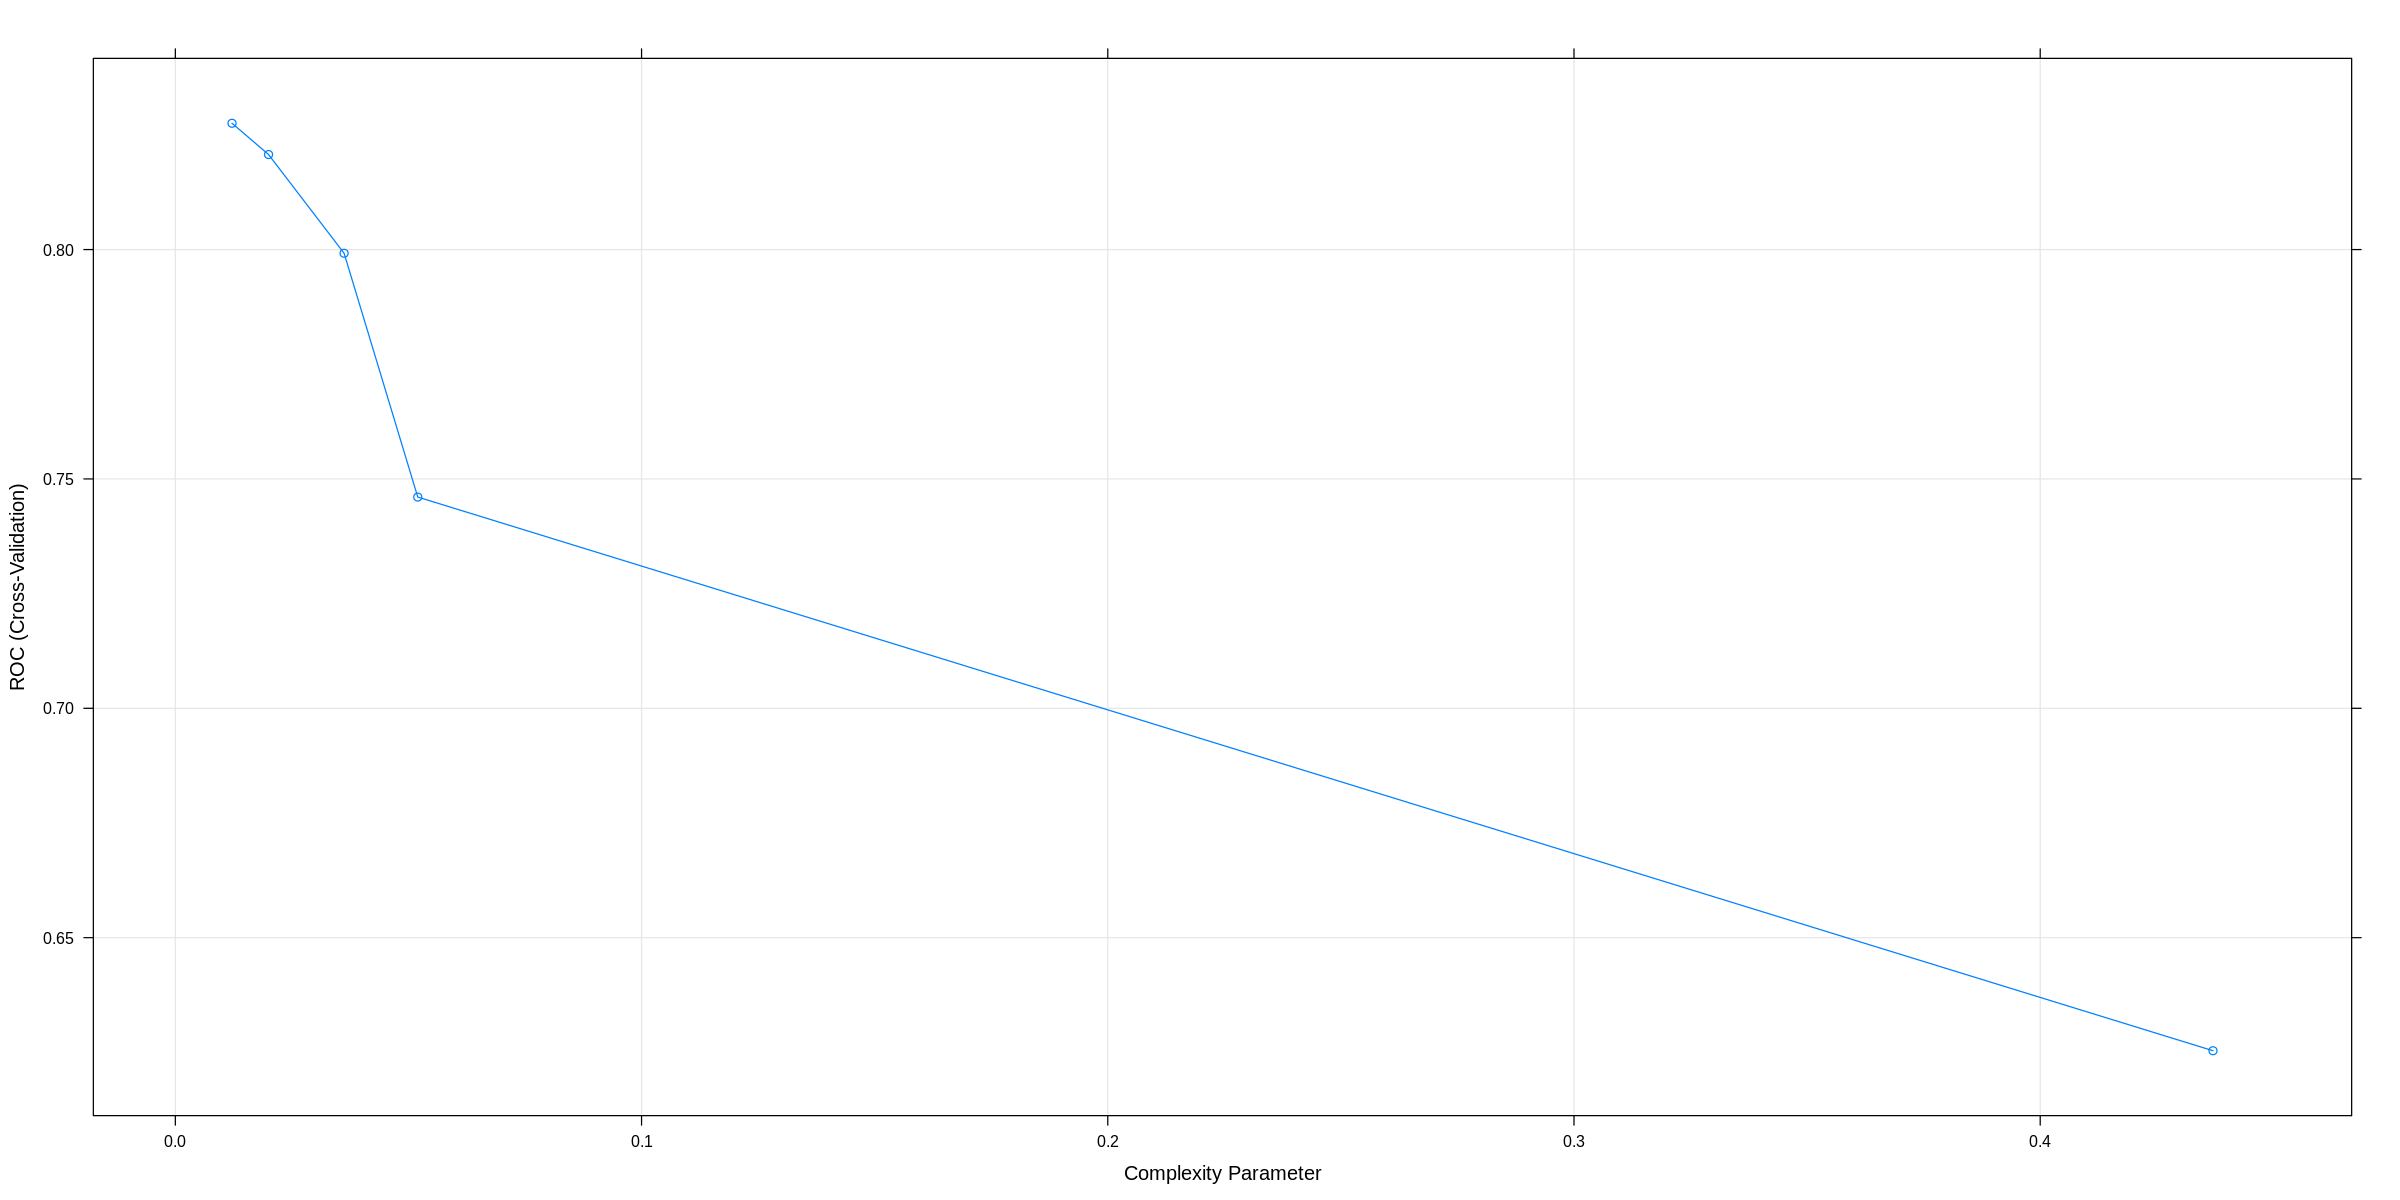

In [ ]:
#plot resampled
plot(marketing_tuning)

In [ ]:
marketing.class.pred <- predict(marketing_tuning, test_set, type = "raw")

In [ ]:
#confusion matrix
(marketing.class.conf <- confusionMatrix(data = marketing.class.pred, 
                                  reference = test_set$Class, positive="yes"))

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  9406  350
       yes 2571 1237
                                          
               Accuracy : 0.7847          
                 95% CI : (0.7776, 0.7915)
    No Information Rate : 0.883           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3515          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7795          
            Specificity : 0.7853          
         Pos Pred Value : 0.3248          
         Neg Pred Value : 0.9641          
             Prevalence : 0.1170          
         Detection Rate : 0.0912          
   Detection Prevalence : 0.2807          
      Balanced Accuracy : 0.7824          
                                          
       'Positive' Class : yes             
                        

The Decision tree model provides an accuracy of 78.47% for the balanced data

# Reference List

Awanindra. (2018). K Nearest Neighbor. Retrieved 18 April, 2021, from https://rpubs.com/awanindra01/knn

Brownlee, J. (2020, August 15). How to estimate model accuracy in r using the caret package. Retrieved April 25, 2021, from https://machinelearningmastery.com/how-to-estimate-model-accuracy-in-r-using-the-caret-package/

Foley, M. (2019). Decision Trees Bagging, Random Forest, and Gradient Boosting using R. Retrieved 18 April, 2021, from https://rpubs.com/mpfoley73/529130

Guru99. (2021). Decision Tree in R | Classification Tree & Code in R with Example. Retrieved 18 April, 2021, from https://www.guru99.com/r-decision-trees.html

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning with Applications in R (1st ed. 2013.).



Mareza,D.H.(2020).Bank Marketing Classification. Retrieved from 
https://rpubs.com/deomareza/bank_marketing_classification


Rodri, D. (2019). Naive bayes_bank campaign. Retrieved April 24, 2021, from: https://www.kaggle.com/danielrrv/naive-bayes-bank-campaign

Rdrr. (2019). Ovunsample: Over-sampling, under-sampling, combination of over- and. Retrieved 22 April, 2021, from https://rdrr.io/cran/ROSE/man/ovun.sample.html